# Plot notebook
Plot energy fluxes from cosipy together with meteorological parameters and foehn identification.

In [1]:
#import packages
import numpy as np
import pandas as pd
import xarray as xr
import math
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm
#import seaborn as sns
from datetime import datetime, timedelta
#import foehnix
import metpy.calc as mpcalc
from metpy.units import units

C:\Users\leopo\miniconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#JJMC dataset
jjmc = pd.read_csv(fr"C:\Users\leopo\Master\Thesis\data\data_shaped\jjmc_cosipy_snowcorr_combined.csv", delimiter=',', index_col=['TIMESTAMP'], na_values = 'NAN')

In [3]:
#Cosipy outpts
cosipy_output = r"C:\Users\leopo\Master\Thesis\Code\cosipy\data\output"
#36hmean
cosipy_36h_10_11 = xr.open_dataset(cosipy_output + r"\36hmean\McCall_2010_2011_36hmean.nc")
cosipy_36h_11_12 = xr.open_dataset(cosipy_output + r"\36hmean\McCall_2011_2012_36hmean.nc")
#108hmean
cosipy_108h_10_11 = xr.open_dataset(cosipy_output + r"\108hmean\McCall_2010_2011_108hmean.nc")
cosipy_108h_11_12 = xr.open_dataset(cosipy_output + r"\108hmean\McCall_2011_2012_108hmean.nc")
#36hmean
cosipy_120h_10_11 = xr.open_dataset(cosipy_output + r"\120hmean\McCall_2010_2011_120hmean.nc")
cosipy_120h_11_12 = xr.open_dataset(cosipy_output + r"\120hmean\McCall_2011_2012_120hmean.nc")
#era5 sf and tp
cosipy_era5_sf_tp_10_11 = xr.open_dataset(cosipy_output + r"\era5_precip\McCall_2010_2011_era5_sf_tp.nc")
cosipy_era5_sf_tp_11_12 = xr.open_dataset(cosipy_output + r"\era5_precip\McCall_2011_2012_era5_sf_tp.nc")
#era5 tp
cosipy_era5_tp_10_11 = xr.open_dataset(cosipy_output + r"\era5_precip\McCall_2010_2011_era5_tp.nc")
cosipy_era5_sf_11_12 = xr.open_dataset(cosipy_output + r"\era5_precip\McCall_2011_2012_era5_tp.nc")

In [4]:
starts = ["2008", "2009", "2010", "2010", "2011", "2013"]
ends = ["2009", "2009", "2012", "2011", "2012", "2014"]


cosipy_36hmean_list = []
for start, end in zip(starts, ends):
    cosipy_36hmean_list.append(xr.open_dataset(cosipy_output + fr"\36hmean\McCall_{start}_{end}_36hmean.nc"))
cosipy_36hmean_13_14_hyd = xr.open_dataset(cosipy_output + fr"\36hmean\McCall_2013_2014_36hmean_hyd.nc")
cosipy_36hmean_08_09_hyd = xr.open_dataset(cosipy_output + fr"\36hmean\McCall_2008_2009_36hmean_hyd.nc")
                               
cosipy_108hmean_list = []
for start, end in zip(starts, ends):
    cosipy_108hmean_list.append(xr.open_dataset(cosipy_output + fr"\108hmean\McCall_{start}_{end}_108hmean.nc"))
cosipy_108hmean_13_14_hyd = xr.open_dataset(cosipy_output + fr"\108hmean\McCall_2013_2014_108hmean_hyd.nc")
cosipy_108hmean_08_09_hyd = xr.open_dataset(cosipy_output + fr"\108hmean\McCall_2008_2009_108hmean_hyd.nc")
    
cosipy_120hmean_list = []
for start, end in zip(starts, ends):
    cosipy_120hmean_list.append(xr.open_dataset(cosipy_output + fr"\120hmean\McCall_{start}_{end}_120hmean.nc"))
cosipy_120hmean_13_14_hyd = xr.open_dataset(cosipy_output + fr"\120hmean\McCall_2013_2014_120hmean_hyd.nc")
cosipy_120hmean_08_09_hyd = xr.open_dataset(cosipy_output + fr"\36hmean\McCall_2008_2009_36hmean_hyd.nc")

cosipy_sf_tp_list = []
for start, end in zip(starts, ends):
    cosipy_sf_tp_list.append(xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_{start}_{end}_era5_sf_tp.nc"))
cosipy_sf_tp_13_14_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2013_2014_era5_sf_tp_hyd.nc")
cosipy_sf_tp_08_09_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2008_2009_era5_sf_tp_hyd.nc") 
    
cosipy_tp_list = []
for start, end in zip(starts, ends):
    cosipy_tp_list.append(xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_{start}_{end}_era5_tp.nc"))
cosipy_tp_13_14_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2013_2014_era5_tp_hyd.nc")
cosipy_tp_08_09_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2008_2009_era5_sf_tp_hyd.nc")
 
    
cosipy_08_09_list = [cosipy_36hmean_list[0], cosipy_108hmean_list[0], cosipy_120hmean_list[0], cosipy_sf_tp_list[0], cosipy_tp_list[0]]
cosipy_09_09_list = [cosipy_36hmean_list[1], cosipy_108hmean_list[1], cosipy_120hmean_list[1], cosipy_sf_tp_list[1], cosipy_tp_list[1]]
cosipy_10_12_list = [cosipy_36hmean_list[2], cosipy_108hmean_list[2], cosipy_120hmean_list[2], cosipy_sf_tp_list[2], cosipy_tp_list[2]]
cosipy_10_11_list = [cosipy_36hmean_list[3], cosipy_108hmean_list[3], cosipy_120hmean_list[3], cosipy_sf_tp_list[3], cosipy_tp_list[3]]
cosipy_11_12_list = [cosipy_36hmean_list[4], cosipy_108hmean_list[4], cosipy_120hmean_list[4], cosipy_sf_tp_list[4], cosipy_tp_list[4]]
cosipy_13_14_list = [cosipy_36hmean_list[5], cosipy_108hmean_list[5], cosipy_120hmean_list[5], cosipy_sf_tp_list[5], cosipy_tp_list[5]]
cosipy_08_09_hyd_list = [cosipy_36hmean_08_09_hyd, cosipy_108hmean_08_09_hyd, cosipy_120hmean_08_09_hyd, cosipy_sf_tp_08_09_hyd, cosipy_tp_08_09_hyd]
cosipy_13_14_hyd_list = [cosipy_36hmean_13_14_hyd, cosipy_108hmean_13_14_hyd, cosipy_120hmean_13_14_hyd, cosipy_sf_tp_13_14_hyd, cosipy_tp_13_14_hyd]
    

In [5]:
#cosipy xarrays to dataframes 
var_todrop = ["HGT", "MASK", "SLOPE", "ASPECT", "LAYER_HEIGHT", "LAYER_RHO", "LAYER_T", "LAYER_LWC",
             "LAYER_CC", "LAYER_POROSITY", "LAYER_ICE_FRACTION", "LAYER_IRREDUCIBLE_WATER", "LAYER_REFREEZE"]

def cosipy_to_dataframe(data):
    data_red = data.drop_vars(var_todrop) 
    pd_data = data_red.sel(lat = 69.3, lon = -143.8).to_dataframe()
    pd_data.index = pd.to_datetime(data_red.time)
    pd_data["G_out"] = pd_data["G"] * pd_data["ALBEDO"]
    return pd_data
    #data_return.append(pd_data)
    
#xarray to dataframe    
cosipy_08_09_pdlist = list(map(cosipy_to_dataframe, cosipy_08_09_list))
cosipy_09_09_pdlist = list(map(cosipy_to_dataframe, cosipy_09_09_list))
cosipy_10_12_pdlist = list(map(cosipy_to_dataframe, cosipy_10_12_list))
cosipy_10_11_pdlist = list(map(cosipy_to_dataframe, cosipy_10_11_list))
cosipy_11_12_pdlist = list(map(cosipy_to_dataframe, cosipy_11_12_list))
cosipy_13_14_pdlist = list(map(cosipy_to_dataframe, cosipy_13_14_list))
cosipy_08_09_hyd_pdlist = list(map(cosipy_to_dataframe, cosipy_08_09_hyd_list))
cosipy_13_14_hyd_pdlist = list(map(cosipy_to_dataframe, cosipy_13_14_hyd_list))

In [6]:
#read data
#JJMC dataset
#jjmc = pd.read_csv(fr"C:\Users\leopo\Master\Thesis\data\data_shaped\jjmc_cosipy_snowcorr.csv", delimiter=',', index_col=['TIMESTAMP'], na_values = 'NAN')

#foehnix output
#foehn_data = pd.read_excel(r"C:\Users\leopo\Master\Thesis\data\data_raw\foehn_probability_shallowfoehn.xlsx", index_col = "utc_time")

#cosipy outputs
cosipy_output = r"C:\Users\leopo\Master\Thesis\Code\cosipy\data\output"

#combined means
cosipy_comb24_08_09 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2008_2009_24hcombinedmean.nc")
cosipy_comb24_09_09 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2009_2009_24hcombinedmean.nc")
cosipy_comb24_10_11 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2010_2011_24hcombinedmean.nc")
cosipy_comb24_11_12 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2011_2012_24hcombinedmean.nc")
cosipy_comb24_10_12 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2010_2012_24hcombinedmean.nc")
cosipy_comb24_13_14 = xr.open_dataset(cosipy_output + r"\combined_mean\McCall_2013_2014_24hcombinedmean.nc")

#cosipy_08_09_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2008_2009_origfullfield_120h.nc")
#cosipy_09_09_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2009_2009_origfullfield_120h.nc")
#cosipy_10_12_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2010_2012_origfullfield_120h.nc")
#cosipy_13_14_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2013_2014_origfullfield_120h.nc")
#cosipy_bulk = xr.open_dataset(cosipy_output+r"\McCall_2008_2014_bulkconductivity.nc")
#cosipy_LWout = xr.open_dataset(cosipy_output+r"\McCall_2008_2014_LWoutforcing.nc")
#cosipy_LWout_bulk = xr.open_dataset(cosipy_output+r"\McCall_2008_2014_LWoutforcingbulkconductivity.nc")

#12, 120 and 168h means 2010-2012
#12
#cosipy_10_11_12h = xr.open_dataset(cosipy_output+r"\12hmean\McCall_2010_2011_origfullfield_12h.nc")
#cosipy_11_12_12h = xr.open_dataset(cosipy_output+r"\12hmean\McCall_2011_2012_origfullfield_12h.nc")

#cosipy_10_11_12h_LW = xr.open_dataset(cosipy_output+r"\12hmean\McCall_2010_2011_LWoutfullfield_12h.nc")
#cosipy_11_12_12h_LW = xr.open_dataset(cosipy_output+r"\12hmean\McCall_2011_2012_LWoutfullfield_12h.nc")
#120
#cosipy_10_11_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2010_2011_origfullfield_120h.nc")
#cosipy_11_12_120h = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2011_2012_origfullfield_120h.nc")
#cosipy_10_11_120h_albedo = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2010_2011_orig_albedoaging_120h.nc")

#cosipy_10_11_120h_LW = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2010_2011_LWoutfullfield_120h.nc")
#cosipy_11_12_120h_LW = xr.open_dataset(cosipy_output+r"\120hmean\McCall_2011_2012_LWoutfullfield_120h.nc")

#168
#cosipy_10_11_168h = xr.open_dataset(cosipy_output+r"\168hmean\McCall_2010_2011_origfullfield_168h.nc")
#cosipy_11_12_168h = xr.open_dataset(cosipy_output+r"\168hmean\McCall_2011_2012_origfullfield_168h.nc")

#cosipy_10_11_168h_LW = xr.open_dataset(cosipy_output+r"\168hmean\McCall_2010_2011_LWoutfullfield_168h.nc")
#cosipy_11_12_168h_LW = xr.open_dataset(cosipy_output+r"\168hmean\McCall_2011_2012_LWoutfullfield_168h.nc")

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\leopo\\Master\\Thesis\\Code\\cosipy\\data\\output\\combined_mean\\McCall_2008_2009_24hcombinedmean.nc'

In [818]:
input_folder = r"C:\Users\leopo\Master\Thesis\Code\cosipy\data\input\McCall"
file_120_LW = "\jjmc_2008_2014_120hrunmeansnow.nc"
file_120 = "\jjmc_2008_2014_120hrunmeansnow_noLW.nc"
file_combinedmean = "\jjmc_2008_2014_24hcombinedmean.nc"


input_120_LW = xr.open_dataset(input_folder + file_120_LW)
input_120 = xr.open_dataset(input_folder + file_120)
input_combinedmean = xr.open_dataset(input_folder + file_combinedmean)

input_120_LW = input_120_LW.sel(lat = 69.3, lon = -143.8).to_dataframe()
input_120 = input_120.sel(lat = 69.3, lon = -143.8).to_dataframe()
input_combinedmean = input_combinedmean.sel(lat = 69.3, lon = -143.8).to_dataframe()

In [269]:
jjmc

,Datetime,AT 2m,RH 2m,pressure (mb),pressure cos,3m Wind (m/s),3m Wind dir,3m Wind Max (m/s),rain (mm),total_precip_12mean,...,SR50_runmean168,SR50 cor,SR50_timeseries,CM3 up Cal,CM3 Down Cal,CG3 up cal,CG3 down cal,SW_net,daily_albedo,snow_density
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2008-08-17 01:00:00,2008-08-16 17:00:00,3.690,87.5,826.221794,825.879898,0.795,178.0,0.0,0.0,-0.0,...,0.0,1.821,1.821,195.431176,128.805198,307.426636,315.626756,66.625977,0.618424,154.322321
2008-08-17 02:00:00,2008-08-16 18:00:00,2.804,91.3,826.221794,826.112782,1.331,187.8,0.0,0.0,-0.0,...,0.0,1.823,1.823,143.049893,97.451797,309.452906,314.894530,45.598095,0.618424,155.819933
2008-08-17 03:00:00,2008-08-16 19:00:00,2.317,89.7,826.221794,826.241461,1.614,172.4,0.0,0.0,-0.0,...,0.0,1.831,1.831,97.979378,69.188515,315.165018,314.856006,28.790864,0.618424,155.933258
2008-08-17 04:00:00,2008-08-16 20:00:00,2.470,90.3,825.130352,825.109568,1.479,299.9,0.0,0.0,-0.0,...,0.0,1.834,1.834,76.800759,54.566977,289.053368,314.678743,22.233782,0.618424,155.439677
2008-08-17 05:00:00,2008-08-16 21:00:00,2.200,91.5,825.130352,825.180938,1.100,189.7,0.0,0.0,-0.0,...,0.0,1.839,1.839,40.774495,28.210524,307.699597,314.814407,12.563971,0.618424,149.469030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.850000,65.073259
2014-12-31 20:00:00,2014-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.850000,65.073259
2014-12-31 21:00:00,2014-12-31 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.850000,65.073259


In [6]:
jjmc.index = pd.to_datetime(jjmc.index)

#jjmc local time
#jjmc["local_time"] = jjmc.index  - pd.DateOffset(hours = 8)


In [271]:
jjmc.index

DatetimeIndex(['2008-08-17 01:00:00', '2008-08-17 02:00:00',
               '2008-08-17 03:00:00', '2008-08-17 04:00:00',
               '2008-08-17 05:00:00', '2008-08-17 06:00:00',
               '2008-08-17 07:00:00', '2008-08-17 08:00:00',
               '2008-08-17 09:00:00', '2008-08-17 10:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=55871, freq=None)

In [7]:
#jjmc calculations

#sfc temperature with Planck's law
surface_emission_coeff = 0.99
sigma = 5.67e-8
jjmc["T_sfc"] = np.power((jjmc["CG3 down cal"] / (surface_emission_coeff * sigma)), 0.25)

#snow density and SWE
snow_density = 109.0+6.0*(jjmc["AT 2m"])+26.0*np.sqrt(jjmc["3m Wind (m/s)"])
ice_density = 917 #kg/m^3
monthly_means = snow_density.groupby(snow_density.index.month).mean()

# Replace NaN values with respective monthly means
snow_density = snow_density.fillna(snow_density.index.to_series().dt.month.map(monthly_means))
jjmc["snow_density"] = snow_density

#SWE
jjmc["36mean_SWE"] = jjmc["36mean_snowfall"] * (snow_density/ice_density) * 1000
jjmc["108mean_SWE"] = jjmc["108mean_snowfall"] * (snow_density/ice_density) * 1000
jjmc["120mean_SWE"] = jjmc["120mean_snowfall"] * (snow_density/ice_density) * 1000


### Snow depth

calculate snow depth with the difference between the last maximum of SR50 sensor - to surface distance and the single observations

In [9]:
plt.figure(figsize=(15,3))
plt.plot(jjmc["snow_height"])

KeyError: 'snow_height'

<Figure size 1500x300 with 0 Axes>

In [8]:
jjmc["distance_to_ice"] = np.zeros(len(jjmc))
#periods
start = ["2008-08-17", "2009-08-12", "2010-04-01", "2013-03-18"]
end = ["2009-07-12", "2009-11-25", "2012-12-29", "2014-12-24"]

#fill data gaps
#jjmc["SR50_timeseries"]["2009-11-26":"2010-04-01 00:00"] = jjmc["SR50_timeseries"]["2009-11-24"][-1] * np.ones(len(jjmc["2009-11-26":"2010-04-01 00:00"]))
#jjmc["SR50_timeseries"]["2012-12-30":"2013-03-18 00:00"] = jjmc["SR50_timeseries"]["2012-12-28"][-1] * np.ones(len(jjmc["2012-12-30":"2013-03-18 00:00"]))

for start, end in zip(start, end):
    start = pd.to_datetime(start) + pd.DateOffset(hours = 1)
    end = pd.to_datetime(end) + pd.DateOffset(hours = 1)

    if start == pd.to_datetime("2010-04-01 01:00:00"):
        print("yes")
        jjmc["SR50_timeseries"][start] = jjmc["SR50 cor"]["2009-09":"2009-10"].max()
    elif start == pd.to_datetime("2013-03-18 01:00:00"):
        print("y")
        jjmc["SR50_timeseries"][start] = jjmc["SR50 cor"]["2012-09":"2012-10"].max()
    
    jjmc["distance_to_ice"][start:end] = jjmc["SR50_timeseries"][start:end].cummax()

#fill data gaps
#jjmc["distance_to_ice"]["2009-11-26":"2010-04-01 00:00"] = jjmc["distance_to_ice"]["2009-11-24"][-1] * np.ones(len(jjmc["2009-11-26":"2010-04-01 00:00"]))
#jjmc["distance_to_ice"]["2012-12-30":"2013-03-18 00:00"] = jjmc["distance_to_ice"]["2012-12-28"][-1] * np.ones(len(jjmc["2012-12-30":"2013-03-18 00:00"]))
#jjmc["distance_to_ice"]["2009-10":] = jjmc["distance_to_ice"]["2009-10":].fillna(method='ffill')

jjmc["snow_height"] = np.zeros(len(jjmc))
#for start, end in zip(start, end):
    #snow height
jjmc["snow_height"] = jjmc["distance_to_ice"] - jjmc["SR50_timeseries"]

#correct the last two periods because of data gaps

#corrections
jjmc["daily_albedo_corr"] = np.where(jjmc["snow_height"] > 0, jjmc["daily_albedo"], 0.2)
jjmc["snow_height"].loc[jjmc["daily_albedo_corr"] < 0.3] = 0
jjmc["snow_height"].loc[jjmc["snow_height"] > 1.5] = np.nan

C:\Users\leopo\AppData\Local\Temp\ipykernel_13028\136863640.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jjmc["distance_to_ice"][start:end] = jjmc["SR50_timeseries"][start:end].cummax()
C:\Users\leopo\AppData\Local\Temp\ipykernel_13028\136863640.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jjmc["SR50_timeseries"][start] = jjmc["SR50 cor"]["2009-09":"2009-10"].max()
C:\Users\leopo\AppData\Local\Temp\ipykernel_13028\136863640.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

yes
y


C:\Users\leopo\AppData\Local\Temp\ipykernel_13028\136863640.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jjmc["snow_height"].loc[jjmc["daily_albedo_corr"] < 0.3] = 0
C:\Users\leopo\AppData\Local\Temp\ipykernel_13028\136863640.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jjmc["snow_height"].loc[jjmc["snow_height"] > 1.5] = np.nan


In [32]:
jjmc[["snow_height", "distance_to_ice", "SR50_timeseries"]]["2014-05-01"]

C:\Users\leopo\AppData\Local\Temp\ipykernel_23624\4080013512.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  jjmc[["snow_height", "distance_to_ice", "SR50_timeseries"]]["2014-05-01"]


,snow_height,distance_to_ice,SR50_timeseries
TIMESTAMP,,,
2014-05-01 00:00:00,0.533,3.781,3.248
2014-05-01 01:00:00,0.524,3.781,3.257
2014-05-01 02:00:00,0.543,3.781,3.238
2014-05-01 03:00:00,0.534,3.781,3.247
2014-05-01 04:00:00,0.536,3.781,3.245
2014-05-01 05:00:00,0.543,3.781,3.238
2014-05-01 06:00:00,0.534,3.781,3.247
2014-05-01 07:00:00,0.549,3.781,3.232
2014-05-01 08:00:00,0.538,3.781,3.243


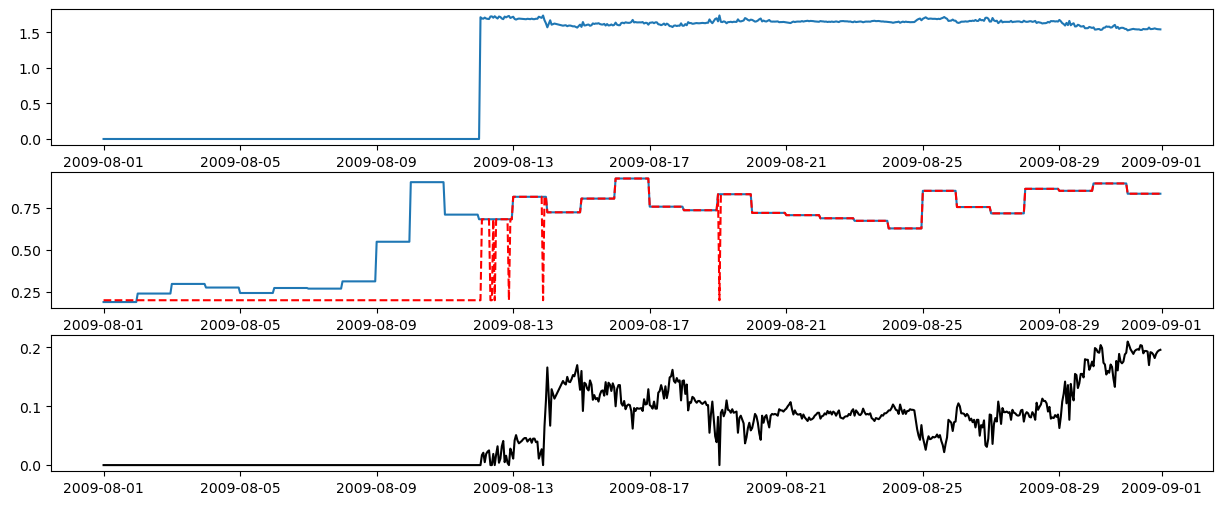

In [15]:
#Snow depth
start = "2009-08-01"
end = "2009-08-31"

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(3,1,1)
ax.plot(jjmc["SR50_timeseries"][start:end])
#ax.set_ylim(2,2.5)
#ax.plot(jjmc["SR50_runmean120"]["2010-08-14":"2010-12"], color = "red")

ax = fig.add_subplot(3,1,2)
ax.plot(jjmc["daily_albedo"][start:end])
ax.plot(jjmc["daily_albedo_corr"][start:end], color = "r", linestyle = "dashed")

ax = fig.add_subplot(3,1,3)
ax.plot(jjmc["snow_height"][start:end], color = "k")
#ax.plot(jjmc["snowheight_test"][start:end], color = "r")

plt.show()

In [612]:
cosipy_13_14

,lat,lon,T2,RH2,U2,PRES,G,RRR,SNOWFALL,N,...,intMB,EVAPORATION,SUBLIMATION,CONDENSATION,DEPOSITION,REFREEZE,subM,Z0,surfM,G_out
2013-03-18 00:00:00,69.3,-143.8,256.37,40.58,2.609,826.245223,55.998983,0.0,0.0,NaN,...,0.000000e+00,0.0,-7.368339e-07,0.0,0.000000,0.000000e+00,0.0,0.000243,0.000000e+00,47.567084
2013-03-18 01:00:00,69.3,-143.8,253.85,46.18,3.278,825.923291,41.791973,0.0,0.0,NaN,...,0.000000e+00,0.0,-1.803743e-06,0.0,0.000000,0.000000e+00,0.0,0.000245,0.000000e+00,35.475580
2013-03-18 02:00:00,69.3,-143.8,252.43,46.54,3.855,825.267248,27.818607,0.0,0.0,NaN,...,0.000000e+00,0.0,-2.474167e-06,0.0,0.000000,0.000000e+00,0.0,0.000248,0.000000e+00,23.598401
2013-03-18 03:00:00,69.3,-143.8,253.27,46.23,3.328,823.901787,13.099089,0.0,0.0,NaN,...,0.000000e+00,0.0,-8.891427e-07,0.0,0.000000,0.000000e+00,0.0,0.000250,0.000000e+00,11.104506
2013-03-18 04:00:00,69.3,-143.8,251.01,51.34,3.484,824.615337,1.279761,0.0,0.0,NaN,...,0.000000e+00,0.0,-1.070668e-06,0.0,0.000000,0.000000e+00,0.0,0.000253,0.000000e+00,1.084173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-23 20:00:00,69.3,-143.8,261.99,53.36,4.400,813.584694,0.000000,0.0,0.0,NaN,...,1.189876e-10,0.0,0.000000e+00,0.0,0.000006,1.189876e-10,0.0,0.000487,1.189876e-10,0.000000
2014-12-23 21:00:00,69.3,-143.8,261.50,58.09,4.804,812.628165,0.000000,0.0,0.0,NaN,...,1.987148e-08,0.0,0.000000e+00,0.0,0.000006,1.987148e-08,0.0,0.000490,1.987148e-08,0.000000
2014-12-23 22:00:00,69.3,-143.8,262.72,59.12,3.536,812.277077,0.003768,0.0,0.0,NaN,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000007,0.000000e+00,0.0,0.000492,0.000000e+00,0.003013
2014-12-23 23:00:00,69.3,-143.8,263.64,58.85,2.685,812.014589,0.000000,0.0,0.0,NaN,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000004,0.000000e+00,0.0,0.000495,0.000000e+00,0.000000


In [24]:
#cosipy xarrays to pandas dataframe
var_todrop = ["HGT", "MASK", "SLOPE", "ASPECT", "LAYER_HEIGHT", "LAYER_RHO", "LAYER_T", "LAYER_LWC",
             "LAYER_CC", "LAYER_POROSITY", "LAYER_ICE_FRACTION", "LAYER_IRREDUCIBLE_WATER", "LAYER_REFREEZE"]
data_return = []
#äfor data in [cosipy_08_09_120h, cosipy_09_09_120h, cosipy_10_12_120h, cosipy_13_14_120h]:
for data in cosipy_list:
#for data in [cosipy_10_11_12h, cosipy_11_12_12h, cosipy_10_11_120h, cosipy_10_11_120h_albedo, cosipy_11_12_120h, cosipy_10_11_168h, cosipy_11_12_168h]:
#for data in [cosipy_10_11_12h_LW, cosipy_11_12_12h_LW, cosipy_10_11_120h_LW, cosipy_11_12_120h_LW, cosipy_10_11_168h_LW, cosipy_11_12_168h_LW]:
    
    data_red = data.drop_vars(var_todrop) 
    pd_data = data_red.sel(lat = 69.3, lon = -143.8).to_dataframe()
    pd_data.index = pd.to_datetime(data_red.time)
    pd_data["G_out"] = pd_data["G"] * pd_data["ALBEDO"]
    data_return.append(pd_data)
  
cosipy_36h_10_11, cosipy_36h_11_12, cosipy_108h_10_11, cosipy_108h_11_12, cosipy_120h_10_11, cosipy_120h_11_12, cosipy_era5_sf_tp_10_11, cosipy_era5_sf_tp_11_12, cosipy_era5_tp_10_11, cosipy_era5_tp_11_12 = data_return
#cosipy_comb24_08_09, cosipy_comb24_09_09, cosipy_comb24_10_11, cosipy_comb24_11_12, cosipy_comb24_10_12, cosipy_comb24_13_14 = data_return
#cosipy_10_11_12h_LW, cosipy_11_12_12h_LW, cosipy_10_11_120h_LW, cosipy_11_12_120h_LW, cosipy_10_11_168h_LW, cosipy_11_12_168h_LW = data_return
#cosipy_10_11_12h, cosipy_11_12_12h, cosipy_10_11_120h, cosipy_10_11_120h_albedo, cosipy_11_12_120h, cosipy_10_11_168h, cosipy_11_12_168h = data_return
#cosipy_08_09_120h, cosipy_09_09_120h, cosipy_10_12_120h, cosipy_13_14_120h = data_return

In [799]:
var_todrop = ["HGT", "MASK", "SLOPE", "ASPECT", "LAYER_HEIGHT", "LAYER_RHO", "LAYER_T", "LAYER_LWC",
             "LAYER_CC", "LAYER_POROSITY", "LAYER_ICE_FRACTION", "LAYER_IRREDUCIBLE_WATER", "LAYER_REFREEZE"]
data_red = cosipy_10_11_120h_albedo.drop_vars(var_todrop)
cosipy_10_11_120h_albedo = data_red.sel(lat = 69.3, lon = -143.8).to_dataframe()
cosipy_10_11_120h_albedo.index = pd.to_datetime(data_red.time)
cosipy_10_11_120h_albedo["G_out"] = cosipy_10_11_120h_albedo["G"] * cosipy_10_11_120h_albedo["ALBEDO"]


### year 2011, 2012
I take the hydrological years of 01.09.2010-31.08.2011 and 01.09.2011-31.08.2012 as test periods as they provide entirely complete data and I can compare the annual cycle of the Snow cover of Cosipy with the AWS data

In [514]:
#jjmc data only for hydrological years 2010-2011 and 2011-2012
jjmc11 = jjmc["2010-09-01 01:00:00":"2011-08-31 23:00:00"].copy()
jjmc12 = jjmc["2011-09-01 01:00:00":"2012-08-31 23:00:00"].copy()

In [135]:
cosipy_08_09_pdlist[0].columns

Index(['lat', 'lon', 'T2', 'RH2', 'U2', 'PRES', 'G', 'RRR', 'SNOWFALL', 'N',
       'LWin', 'RAIN', 'LWout', 'H', 'LE', 'Cs_tout', 'Cs_qout', 'B', 'QRR',
       'surfMB', 'MB', 'Q', 'SNOWHEIGHT', 'TOTALHEIGHT', 'TS', 'ALBEDO',
       'LAYERS', 'ME', 'intMB', 'EVAPORATION', 'SUBLIMATION', 'CONDENSATION',
       'DEPOSITION', 'REFREEZE', 'subM', 'Z0', 'surfM', 'G_out'],
      dtype='object')

In [99]:
#start = "2011-09-01"
#end = "2012-08-31"
#label and tick font
plt.rcParams['axes.labelsize'] = 12 # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 12  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 13   # fontsize of the subplot titles
def snowheight_plot(cosipy_list, year1, year2):

    cosipy36, cosipy108, cosipy120, cosipyera5_sf_tp, cosipy_tp = cosipy_list
    
    #start = pd.to_datetime(cosipy36.index[0])
    #start = pd.to_datetime("2008-10-01 00:00:00")
    #end = pd.to_datetime(cosipy36.index[-1])
    #end = pd.to_datetime("2009-04-30 23:00:00")
    #index winter
    winter = ((cosipy36.index.month >= 10) | (cosipy36.index.month <=4))
    #jjmc_plot = jjmc[year1:year2]
    jjmc_plot = jjmc[((jjmc.index.month >=10) & (jjmc.index.year == year1)) | 
                          ((jjmc.index.month <= 4)&(jjmc.index.year == year2))]
    
    fig = plt.figure(figsize = (15,6))
    #snow height
    ax = fig.add_subplot(2,1,1)
    ax.plot(jjmc_plot["snow_height"], color = "k", label = "JJMC obs.")
    ax.plot(cosipy36[winter]["SNOWHEIGHT"], color = "green", label = "Cos36")
    ax.plot(cosipy108[winter]["SNOWHEIGHT"], color = "b", label = "Cos108")
    #ax.plot(cosipy120[start:end]["SNOWHEIGHT"], color = "orange", label = "cosipy 120h mean")
    ax.plot(cosipyera5_sf_tp[winter]["SNOWHEIGHT"], color = "orange", label = "CosERA5")
    #ax.plot(cosipy_tp[start:end]["SNOWHEIGHT"], color = "green", linestyle = "dashed",  label = "cosipy era5 tp")
    #ax.axhline(0, color = "r", linestyle = "dashed")
    ax.set_title(f"Snow height JJMC"); ax.legend(loc = "upper left", ncol = 2) #{(str(start))[0:10]} - {(str(end))[0:10]}, 
    ax.set_xticklabels([])
    ax.grid(); ax.set_ylabel("[m]")
    ax.set_ylim(0,1.2)

    #albedo
    ax = fig.add_subplot(4,1,3)
    ax.plot(jjmc_plot["daily_albedo"], color = "k", label = "JJMC")
    ax.plot(cosipy36[winter]["ALBEDO"], color = "green", label = "Cos36")
    ax.plot(cosipy108[winter]["ALBEDO"], color = "b", label = "Cos108")
    #ax.plot(cosipy120[start:end]["SNOWHEIGHT"], color = "orange", label = "cosipy 120h mean")
    ax.plot(cosipyera5_sf_tp[winter]["ALBEDO"], color = "orange", label = "CosERA5")
    #ax.plot(cosipy_tp[start:end]["SNOWHEIGHT"], color = "green", linestyle = "dashed",  label = "cosipy era5 tp")
    #ax.axhline(0, color = "r", linestyle = "dashed")
    ax.set_title("ALbedo JJMC"); #ax.legend(loc = "lower center", ncol = 4, bbox_to_anchor =(0.5,-0.6))
    ax.grid(); 
    ax.set_ylim(0,1); ax.set_yticks([0,0.5,1.0])

    plt.subplots_adjust(hspace=0.4); plt.tight_layout()
    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\jjmc_precipitation\snowheights_means_era5\jjmc_snowheight_albedo_{(str(start))[0:4]}-{(str(end))[0:4]}winter.png",
    bbox_inches = "tight")
    plt.close()
    #plt.show()

In [100]:
year1list = [2008, 2010, 2011, 2013]
year2list = [2009, 2011, 2012, 2014]
for cosipy_list, year1, year2 in zip([cosipy_08_09_hyd_pdlist, cosipy_10_11_pdlist, cosipy_11_12_pdlist, cosipy_13_14_hyd_pdlist], year1list, year2list):
    snowheight_plot(cosipy_list, year1, year2)


In [ ]:
jjmc["2008

In [140]:
snowheight_plot(cosipy_08_09_pdlist)

In [859]:
def rain_snow_plot(cosipy, cosipy_comb, start, end):
    #snowfall difference between the cosipy setups?
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    jjmc_plot = jjmc[start:end]
    cosipy = cosipy[start:end]
    cosipy_comb = cosipy_comb[start:end]

    fig = plt.figure(figsize = (15,12))
    ax = fig.add_subplot(3,1,1)
    ax.plot(jjmc_plot["snow_height"], color = "b", label = "JJMC obs.")
    ax.plot(cosipy["SNOWHEIGHT"], color = "k", label = "cosipy 120h runmean")
    ax.plot(cosipy_comb["SNOWHEIGHT"], color = "k", linestyle = "dashed", label = "cosipy 120h - 24h combined runmean")
    ax.set_title(f"{(str(start))[0:10]} - {(str(end))[0:10]}, Snow & Rain, JJMC"); ax.legend(loc = "upper left")
    ax.grid()
    
    ax = fig.add_subplot(3,1,2)
    #ax.plot(jjmc12[start:end]["12mean_snowfall"], color = "k", label = "Snowfall 12h runmean")
    ax.plot(jjmc_plot["120mean_snowfall"], color = "k", label = "120h runmean")
    ax.plot(jjmc_plot["snowfall_combined24"], color = "r", label = "120h-24h combined runmean")
    #ax.plot(jjmc12[start:end]["168mean_snowfall"], color = "r", label = "Snowfall 168h runmean") 
    ax.grid(); ax.set_ylabel("snowfall [m]"); ax.legend(loc = "upper left")

    
    #ax.scatter(cosipy_11_12_12h[start:end].index, cosipy_11_12_12h[start:end]["SNOWFALL"], color = "k", s = 4)
    #ax.plot(cosipy_11_12_12h_LW[start:end]["SNOWFALL"], color = "k", linestyle = "dashed", label = "cosipy 12h runmean")
    #ax.plot(cosipy[start:end]["SNOWFALL"], color = "k", label = "cosipy 120h runmean")
    #ax.plot(cosipy_comb[start:end]["SNOWFALL"], color = "r", linestyle = "dashed", label = "cosipy 120h-24h combined runmean")
    #ax.scatter(cosipy.index, cosipy_10_11_120h[start:end]["SNOWFALL"], color = "r", s = 10, label = "cosipy orig")

    #ax.scatter(cosipy_11_12_120h[start:end].index, cosipy_11_12_168h[start:end]["SNOWFALL"], color = "r", s = 4)
    #ax.plot(cosipy_11_12_168h_LW[start:end]["SNOWFALL"], color = "r", linestyle = "dashed", label = "cosipy 168h runmean")
    #ax.set_title("cosipy - snowfall 120h runmean")
    #ax.grid(); ax.set_ylabel("snowfall [m]")
    #ax.legend(loc = "upper left")

    ax = fig.add_subplot(3,1,3)
    #ax.scatter(cosipy_11_12_12h[start:end].index, cosipy_11_12_12h[start:end]["RRR"], color = "k", s = 4)
    #ax.plot(cosipy_11_12_12h_LW[start:end]["RRR"], color = "k", linestyle = "dashed", label = "cosipy 12h runmean")
    ax.plot(cosipy["RAIN"], color = "k", label = "cosipy 120h runmean")
    ax.plot(cosipy_comb["RAIN"], color = "r", linestyle = "dashed", label = "cosipy 120h-24h combined runmean")
    ax.plot(jjmc_plot["rain (mm)"], color = "b", label = "JJMC obs.")
            
    #ax.scatter(cosipy_10_11_120h[start:end].index, cosipy_10_11_120h[start:end]["RRR"], color = "r", s = 10, label = "cosipy orig")

    #ax.scatter(cosipy_11_12_168h[start:end].index, cosipy_11_12_168h[start:end]["RRR"], color = "r", s = 4)
    #ax.plot(cosipy_11_12_168h_LW[start:end]["RRR"], color = "r", linestyle = "dashed", label = "cosipy 168h runmean")
    #ax.set_title("cosipy - Rain 120h runmean")
    ax.grid(); ax.set_ylabel("Rain [mm]")
    ax.legend(loc = "upper left")

    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\jjmc_precipitation\rain_snowfall\jjmc_rain_snowfall_{(str(start))[0:10]}_{(str(end))[0:10]}.png")
    plt.close()

In [860]:
# Define the start date for the year 2009
start_date1 = pd.to_datetime("2010-09-01 01:00:00")
start_date2 = start_date1 + timedelta(days=10)

# Create a list of datetime objects with 10-day intervals
date_list1 = [start_date1 + timedelta(days=10 * i) for i in range(37)]   #33, 13, 105, 65
date_list2 = [start_date2 + timedelta(days=10 * i) for i in range(37)]

for start, end in zip(date_list1, date_list2):
    rain_snow_plot(cosipy_10_11_120h_albedo, cosipy_comb24_10_11, start, end)

In [250]:
input_120_LW_2011 = input_120_LW["2010-11-01":"2010-11-30"]

In [830]:
jjmc.columns

Index(['Datetime', 'AT 2m', 'RH 2m', 'pressure (mb)', 'pressure cos',
       '3m Wind (m/s)', '3m Wind dir', '3m Wind Max (m/s)',
       'total_precip_12mean', 'total_precip_24mean', 'total_precip_36mean',
       'total_precip_72mean', 'total_precip_108mean', 'total_precip_120mean',
       'total_precip_168mean', '12mean_snowfall', '24mean_snowfall',
       '36mean_snowfall', '72mean_snowfall', '108mean_snowfall',
       '120mean_snowfall', '168mean_snowfall', 'SR50_runmean12',
       'SR50_runmean24', 'SR50_runmean36', 'SR50_runmean72', 'SR50_runmean108',
       'SR50_runmean120', 'SR50_runmean168', 'SR50 cor', 'SR50_timeseries',
       'CM3 up Cal', 'CM3 Down Cal', 'CG3 up cal', 'CG3 down cal', 'SW_net',
       'daily_albedo', 'T_sfc', 'snow_density', '12mean_SWE', '120mean_SWE',
       '168mean_SWE', 'distance_to_ice', 'snow_height', 'daily_albedo_corr'],
      dtype='object')

KeyError: 'rain (mm)'

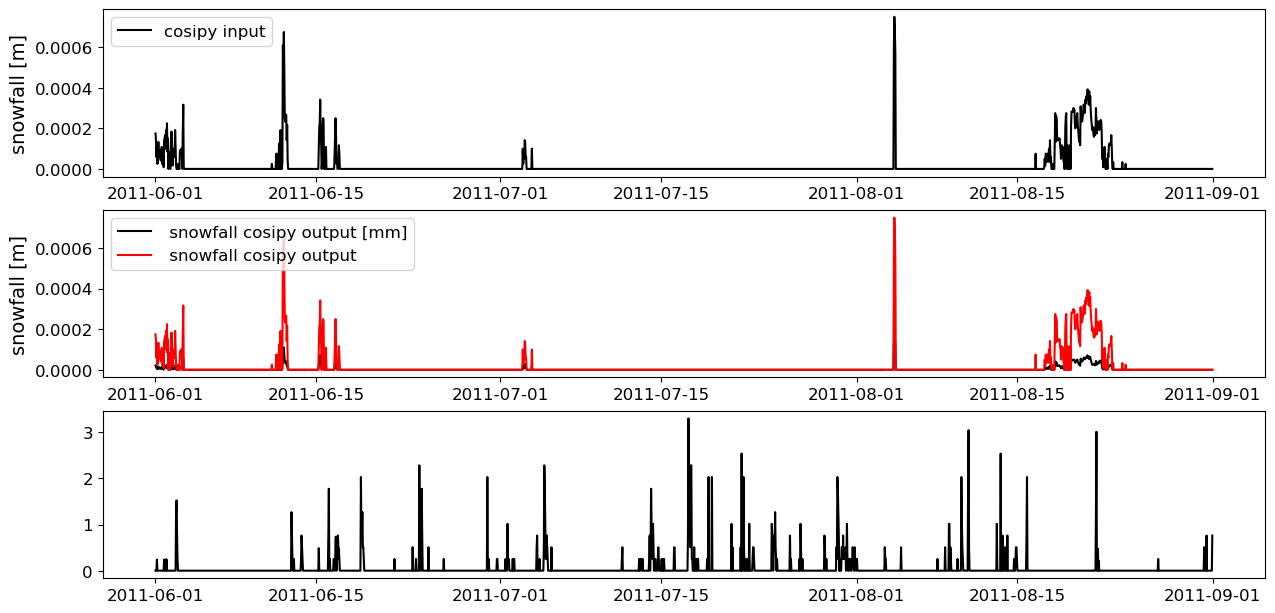

In [829]:
start = "2011-06"
end = "2011-08"

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(4,1,1)
ax.plot(input_120_LW["SNOWFALL"][start:end], color = "k", label = "cosipy input")
ax.set_ylabel("snowfall [m]")
ax.legend(loc = "upper left")

ax = fig.add_subplot(4,1,2)
ax.plot(cosipy_10_11_120h_LW["SNOWFALL"][start:end], color = "k", label = " snowfall cosipy output [mm]")
ax.plot(cosipy_10_11_120h_albedo["SNOWFALL"][start:end], color = "r", label = " snowfall cosipy output")
ax.set_ylabel("snowfall [m]")
ax.legend(loc = "upper left")

ax = fig.add_subplot(4,1,3)
ax.plot(cosipy_10_11_120h_LW["RAIN"][start:end], color = "k", label = " rain cosipy output")
ax.plot(jjmc["rain (mm)"][start:end], color = "r", label = "rain jjmc obs.")
ax.set_ylabel("rain [mm]")
ax.legend(loc = "upper left")

ax = fig.add_subplot(4,1,4)
ax.plot(input_120_LW_2011["RRR"][start:end], color = "r", label = "cosipy input")
ax.plot(cosipy_10_11_120h_LW["SNOWFALL"][start:end] * 1000, color = "k", linestyle = "dashed", label = " snowfall cosipy output")
#ax.plot(cosipy_10_11_120h_LW["RRR"]["2010-11-01":"2010-11-30"], color = "k", linestyle = "dashed", label = "cosipy output")
ax.set_ylabel("total precip [mm]")
ax.legend(loc = "upper left")

### Snowfall cosipy input vs output

Cosipy somehow modifies the Snowfall. Compared to the input data, the snowfall of the output data is nearly factor 10 smaller. Transition to rain can't be the solution as for example in the period above, there is no rain with one little exception, but the snowfall still gets modified. Has it Possibly to do with densfiication???

In [107]:
jjmc11["snow_height"] = jjmc11["snow_height"] - jjmc11["snow_height"][:"2010-12"].min()
jjmc12["snow_height"] = jjmc12["snow_height"] - jjmc12["snow_height"][:"2011-12"].min()

jjmc11["snow_height_SR50"] = jjmc11["snow_height_SR50"] - jjmc11["snow_height_SR50"][:"2010-12"].min()
jjmc12["snow_height_SR50"] = jjmc12["snow_height_SR50"] - jjmc12["snow_height_SR50"][:"2011-12"].min()

In [109]:
jjmc11.columns

Index(['AT 2m', 'RH 2m', 'pressure (mb)', 'pressure cos', '3m Wind (m/s)',
       '3m Wind dir', '3m Wind Max (m/s)', 'total_precip_12mean',
       'total_precip_24mean', 'total_precip_36mean', 'total_precip_72mean',
       'total_precip_108mean', 'total_precip_120mean', 'total_precip_168mean',
       '12mean_snowfall', '24mean_snowfall', '36mean_snowfall',
       '72mean_snowfall', '108mean_snowfall', '120mean_snowfall',
       '168mean_snowfall', 'SR50_runmean12', 'SR50_runmean24',
       'SR50_runmean36', 'SR50_runmean72', 'SR50_runmean108',
       'SR50_runmean120', 'SR50_runmean168', 'SR50 cor', 'SR50_timeseries',
       'CM3 up Cal', 'CM3 Down Cal', 'CG3 up cal', 'CG3 down cal', 'SW_net',
       'daily_albedo', 'snow_height'],
      dtype='object')

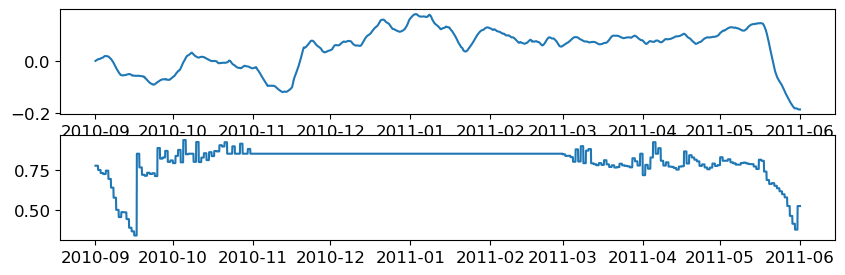

In [121]:
fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(2,1,1)
ax.plot((jjmc11["SR50_runmean108"][:"2011-05"] - jjmc11["SR50_runmean108"][0]) * (-1))# - jjmc11["snow_height"][:"2010-12"].min())
ax = fig.add_subplot(2,1,2)
ax.plot(jjmc11["daily_albedo"][:"2011-05"])

### EB plot
only for EB:
- one subplot radiation
- one subplot turbulent fluxes + melt energy
- one subplot T2m and surface T <br>

for the foehn cases below and for 2008-2009

### Föhn plot:
- Energy fluxes, turbulent and radiation fluxes separated?
- temperature at 2m and surface
- one wind speed and direction panel, Föhn events (prob > 0.5) highlighted in it


In [6]:
foehn_data.columns

Index(['Year', 'Day', 'Time', '3m_T_ahab', '1m_T_ahab', 'pressure_ahab',
       'theta_ahab_jjmc', 'T_firn', 'pressure_firn', 'theta_firn_jjmc',
       '2m_T_jjmc', '2m_RH_jjmc', '3m_Windspeed_jjmc', '3m_Winddir_jjmc',
       '1m_Windspeed_jjmc', '1m_Winddir_jjmc', 'pressure_jjmc', 'Tdiff_ahab',
       'Tdiff_firn', 'theta_diff_ahab', 'theta_diff_firn', 'foehn_ahab',
       'foehn_firn', 'foehn_ahab_flag', 'foehn_firn_flag', '1m_T_jjmc',
       '1m_RH_jjmc', '3m_T_jjmc', '3m_RH_jjmc', '3m_gust_jjmc', '1m_gust_jjmc',
       'q_s_jjmc', 'windspeed_ahab', 'winddir_ahab', 'RH_ahab', 'Datetime',
       't_upstream800', 'windspeed_upstream800', 'winddir_upstream800',
       't_crest800', 'windspeed_crest800', 'winddir_crest800', 't_upstream775',
       'windspeed_upstream775', 'winddir_upstream775', 't_crest775',
       'windspeed_crest775', 'winddir_crest775', 't_upstream750',
       'windspeed_upstream750', 'winddir_upstream750', 't_crest750',
       'windspeed_crest750', 'winddir_crest750

In [49]:
start_dates = ["2008-12-07 00:00:00", "2008-12-14 00:00:00", "2009-01-14 00:00:00", "2009-02-11 00:00:00", 
               "2009-04-26 00:00:00", "2011-12-02 00:00:00", "2012-01-01 00:00:00", "2012-09-15 00:00:00", 
              "2013-04-07 00:00:00", "2013-11-07 00:00:00", "2014-05-24 00:00:00", "2014-11-17 00:00:00"]
end_dates = ["2008-12-12 00:00:00", "2008-12-17 00:00:00", "2009-01-19 08:00:00", "2009-02-15 00:00:00", 
             "2009-04-29 00:00:00", "2011-12-11 00:00:00", "2012-01-13 00:00:00", "2012-09-25 00:00:00", 
            "2013-04-09 00:00:00", "2013-11-13 00:00:00", "2014-05-30 00:00:00", "2014-11-25 00:00:00"]

In [507]:
#plot function
def compare_plot_EB(start, end, cosipy_data1, jjmc, folder):

    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    #copy the single datasets
    data_plot1 = cosipy_data1[start:end].copy()
    jjmc_plot = jjmc[start:end].copy()
    
    
    #label and tick font
    plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
    plt.rcParams['xtick.labelsize'] = 12  # fontsize of the x ticks
    plt.rcParams['ytick.labelsize'] = 12  # fontsize of the y ticks
    plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
    plt.rcParams['axes.titlesize'] = 16   # fontsize of the subplot titles

    
    fig = plt.figure(figsize = (25,15))
    fig.tight_layout(pad = 2.0)
    
    ax1 = fig.add_subplot(3,1,1)
    #energy terms
    #longwave
    ax1.plot(data_plot1.index, data_plot1["LWin"], color = "k", label = "LW in", linewidth = 2)
    ax1.plot(data_plot1.index, data_plot1["LWout"], color = "k", linestyle = "dashed", label = "LWout cosipy", linewidth = 2)
    ax1.plot(data_plot1.index, -1 * jjmc_plot["CG3 down cal"], color = "blue", linestyle = "dashed", label = "LWout JJMC", linewidth = 2)
    #ax1.plot(data_plot1.index, data_LWforced["LWout"], color = "k", linestyle = "dotted", label = "LWout bulk", linewidth = 2)
    #shortwave
    ax1.plot(data_plot1.index, data_plot1["G"], color = "orange", label = "SW in", linewidth = 2)
    ax1.plot(data_plot1.index, -1*data_plot1["G_out"], color = "orange", linestyle = "dashed", label = "SW out", linewidth = 2)
    ax1.set_title("radiation")
    ax1.set_ylabel(r"$\frac{W}{m^2}$"); 
    ax1.legend(); ax1.grid()
    
    
    ax2 = fig.add_subplot(3,1,2)
    #turbulent fluxes
    ax2.plot(data_plot1.index, data_plot1["H"], color = "red", label = "Q_H", linewidth = 2)
    #ax2.plot(data_plot1.index, data_LWforced["H"], color = "red", linestyle = "dashed", label = "Q_H bulk", linewidth = 2)
    ax2.plot(data_plot1.index, data_plot1["LE"], color = "green", label = "Q_E", linewidth = 2)
    #ax2.plot(data_plot1.index, data_LWforced["LE"], color = "green", linestyle = "dashed", label = "Q_E bulk", linewidth = 2)
    ax2.plot(data_plot1.index, data_plot1["B"], color = "cyan", label = "B", linewidth = 2)
    #ax2.plot(data_plot1.index, data_LWforced["B"], color = "cyan", linestyle = "dashed", label = "B bulk", linewidth = 2)
    ax2.plot(data_plot1.index, data_plot1["QRR"], color = "blue",  label = "QRR", linewidth = 2)
    #ax2.plot(data_plot1.index, data_LWforced["QRR"], color = "blue", linestyle = "dashed", label = "QRR bulk", linewidth = 2)
    #melt energy
    ax2.plot(data_plot1.index, data_plot1["ME"], color = "orange", label = "E_melt", linewidth = 2)
    ax2.set_title("turbulent fluxes")
    ax2.set_ylabel(r"$\frac{W}{m^2}$"); 
    ax2.legend(); ax2.grid()
    

    ax3 = fig.add_subplot(3,1,3)
    #T2m and surface T 
    ax3.plot(data_plot1.index, data_plot1["T2"]-273.15, color = "k", label = "JJMC 2m", linewidth = 2)
    #ax2.plot(data_plot1.index, data_plot1["TS_obs"], color = "blue", label = "TS observed", linewidth = 2)
    ax3.plot(data_plot1.index, data_plot1["TS"]-273.15, color = "red", label = "TS cosipy", linewidth = 2)
    ax3.plot(data_plot1.index, jjmc_plot["T_sfc"]-273.15, color = "red", label = "TS JJMC", linestyle = "dashed", linewidth = 2)
    #ax3.plot(data_plot1.index, data_LWforced["TS"]-273.15, color = "blue", label = "TS bulk", linewidth = 2)
    ax3.legend(); ax3.set_ylabel("T [°C]"); 
    ax3.set_title("2m and surface temperature"); ax3.grid()
    
    #ax4 = fig.add_subplot(4,1,4)
    #ax4.plot(data_plot1.index, data_plot1["SNOWHEIGHT"], color = "blue", label = "snowheight cosipy", linewidth = 2)
    #ax4.plot(data_plot1.index, data_plot1["SNOWFALL"], color = "blue", label = "snowfall cosipy", linewidth = 2, linestyle = "dashed")
    #jjmc_snow = jjmc_plot.loc["
    #ax4.plot(jjmc_plot.index, jjmc_plot["snow_height"] , color = "k", label = "snowheight JJMC", linewidth = 2)
    #ax4.legend()
    
    plt.subplots_adjust(hspace=0.4)
    #save plots
    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\jjmc_EB\\{folder}\EB_{(str(start))[0:10]}_{(str(end))[0:10]}.png",
               bbox_inches="tight")
    plt.close()
    #plt.show()

ValueError: x and y must have same first dimension, but have shapes (167,) and (241,)

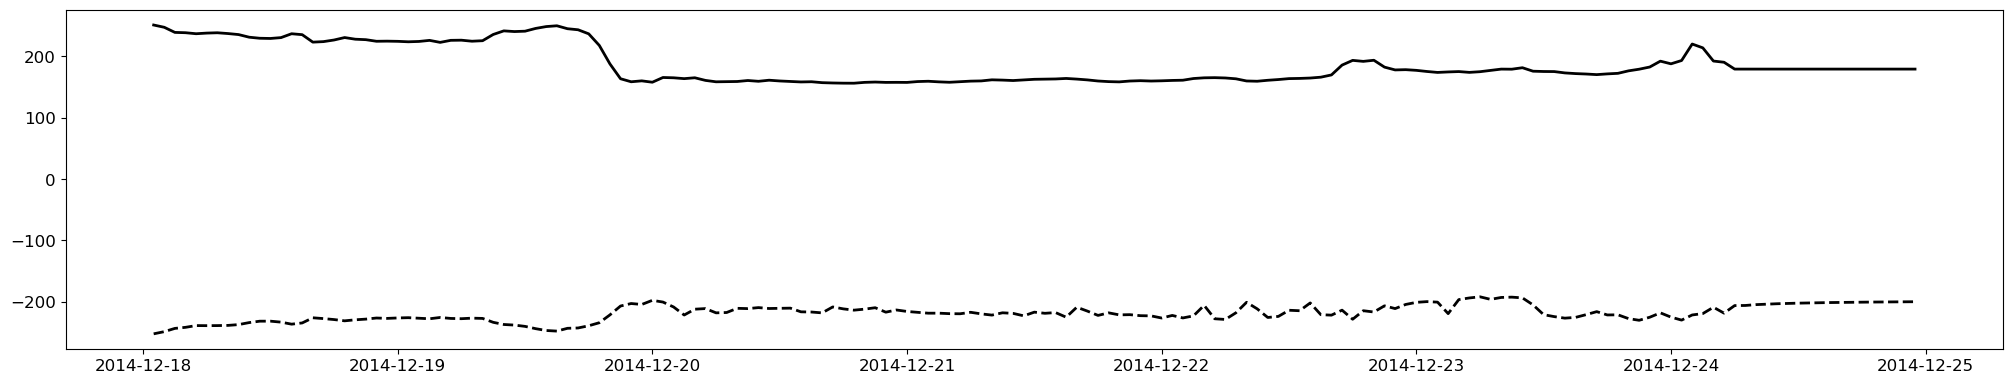

In [641]:
#year 2009
# Define the start date for the year 2009
start_date1 = pd.to_datetime("2013-03-18 01:00:00")
start_date2 = start_date1 + timedelta(days=10)

# Create a list of datetime objects with 10-day intervals
date_list1 = [start_date1 + timedelta(days=10 * i) for i in range(65)]   #33, 13, 105, 65
date_list2 = [start_date2 + timedelta(days=10 * i) for i in range(65)]

for start, end in zip(date_list1, date_list2):
    compare_plot_EB(start, end, cosipy_13_14_120h, jjmc, r"runmeansnow_original\runmean_snow_13_14")

### Snow plot
- observed snow height SR50
- cosipy snow height
- Albedo cosipy + Albedo observations

In [494]:
jjmc["snow_height"]["2009-08-12"]

TIMESTAMP
2009-08-12 00:00:00    0.000
2009-08-12 01:00:00    0.000
2009-08-12 02:00:00    0.017
2009-08-12 03:00:00    0.021
2009-08-12 04:00:00    0.005
2009-08-12 05:00:00    0.019
2009-08-12 06:00:00    0.023
2009-08-12 07:00:00    0.025
2009-08-12 08:00:00    0.000
2009-08-12 09:00:00    0.000
2009-08-12 10:00:00    0.019
2009-08-12 11:00:00    0.000
2009-08-12 12:00:00    0.018
2009-08-12 13:00:00    0.032
2009-08-12 14:00:00    0.004
2009-08-12 15:00:00    0.011
2009-08-12 16:00:00    0.032
2009-08-12 17:00:00    0.041
2009-08-12 18:00:00    0.005
2009-08-12 19:00:00    0.016
2009-08-12 20:00:00    0.004
2009-08-12 21:00:00    0.000
2009-08-12 22:00:00    0.028
2009-08-12 23:00:00    0.020
Name: snow_height, dtype: float64

In [518]:
#plot function for the snow cover attributes
def snow_plot(start, end, cosipy1, cosipy_in, jjmc, folder):

    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    #copy the single datasets
    cosipy_plot = cosipy1[start:end].copy()
    cosipy_in_plot = cosipy_in[start:end].copy()
    jjmc_plot = jjmc[start:end].copy()
    
    
    #label and tick font
    plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
    plt.rcParams['xtick.labelsize'] = 12  # fontsize of the x ticks
    plt.rcParams['ytick.labelsize'] = 12  # fontsize of the y ticks
    plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
    plt.rcParams['axes.titlesize'] = 16   # fontsize of the subplot titles

    fig = plt.figure(figsize = (25,15))
    fig.tight_layout(pad = 2.0)
    #ax = fig.add_subplot(3,1,1)
    #ax.plot(jjmc11[start:end]["snow_height"])
    #ax.axhline(0, color = "r")
    #snow depth
    ax = fig.add_subplot(3,1,1)
    ax.plot(jjmc_plot.index, jjmc_plot["snow_height"], color = "k", label = "SR50 JJMC")
    ax.plot(cosipy_plot.index, cosipy_plot["SNOWHEIGHT"], color = "b",linestyle = "dashed", label = "cosipy, 120h runmean")
    ax.axhline(0, color = "r", linestyle = "dashed")
    ax.set_title("Snow height JJMC"); ax.legend(loc = "upper left")
    ax.grid(), ax.set_ylabel("snow height [m]"), ax.set_ylim(-0.15, 0.5)

    #snowfall
    ax = fig.add_subplot(3,1,2)
    ax.plot(jjmc_plot.index, jjmc_plot["120mean_snowfall"], color = "k", label = "JJMC 120h runmean")
    ax.plot(cosipy_plot.index, cosipy_plot["SNOWFALL"], color = "b", linestyle = "dashed", label = "cosipy 120h runmean")
    ax.plot(cosipy_in_plot.index, cosipy_in_plot["SNOWFALL"], color = "r", linestyle = "dashed", label = "cosipy input")
    ax.grid(); ax.set_ylabel("snowfall [m]")
    ax.legend(loc = "upper left"); ax.set_ylim(0, 0.003)
    
    #albedo
    ax = fig.add_subplot(3,1,3)
    ax.plot(jjmc_plot.index, jjmc_plot["daily_albedo"], color = "k", label = "JJMC obs.")
    ax.plot(cosipy_plot.index, cosipy_plot["ALBEDO"], color = "b", linestyle = "dashed", label = "cosipy")
    ax.legend(loc = "upper left"); ax.grid()
    ax.set_ylabel("Albedo"); ax.set_ylim(0, 1)

    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\jjmc_snowcover\\{folder}\snowcover_{(str(start))[0:10]}_{(str(end))[0:10]}.png")
    plt.close()

In [644]:
cosipy_09_09_120h.head(1)

,lat,lon,T2,RH2,U2,PRES,G,RRR,SNOWFALL,N,...,intMB,EVAPORATION,SUBLIMATION,CONDENSATION,DEPOSITION,REFREEZE,subM,Z0,surfM,G_out
2009-08-12 01:00:00,69.3,-143.8,271.126,79.6,1.197,827.460894,201.536045,0.0,0.0,NaN,...,0.0,0.0,-0.000007,0.0,0.0,0.0,0.0,0.000243,0.0,103.993136


In [824]:
#year 2009
# Define the start date for the year 2009
start_date1 = pd.to_datetime("2013-03-18 01:00:00")
start_date2 = start_date1 + timedelta(days=10)

# Create a list of datetime objects with 10-day intervals
date_list1 = [start_date1 + timedelta(days=10 * i) for i in range(65)]   #33, 13, 105, 65
date_list2 = [start_date2 + timedelta(days=10 * i) for i in range(65)]

for start, end in zip(date_list1, date_list2):
    snow_plot(start, end, cosipy_comb24_13_14, input_combinedmean, jjmc, r"combined_mean24\2013_2014")

In [817]:
cosipy_comb24_10_11.head()

,lat,lon,T2,RH2,U2,PRES,G,RRR,SNOWFALL,N,...,intMB,EVAPORATION,SUBLIMATION,CONDENSATION,DEPOSITION,REFREEZE,subM,Z0,surfM,G_out
2010-09-01 01:00:00,69.3,-143.8,274.578,78.4,0.810,822.155212,144.331161,0.056343,0.000367,NaN,...,-1.787691e-05,-8.741805e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000018,0.00024,3.678698e-05,120.312557
2010-09-01 02:00:00,69.3,-143.8,274.784,78.9,0.732,822.100633,135.060805,0.044844,0.000292,NaN,...,2.408920e-05,0.000000e+00,-1.301209e-09,0.0,0.000000e+00,4.062415e-05,0.000017,0.00024,0.000000e+00,112.599657
2010-09-01 03:00:00,69.3,-143.8,274.041,85.3,0.948,822.297892,79.061822,0.040596,0.000267,NaN,...,3.057489e-05,0.000000e+00,0.000000e+00,0.0,2.737654e-07,3.057489e-05,0.000000,0.00024,0.000000e+00,65.923750
2010-09-01 04:00:00,69.3,-143.8,273.609,89.1,1.301,821.319468,35.626809,0.041105,0.000267,NaN,...,4.770041e-10,0.000000e+00,0.000000e+00,0.0,1.641727e-07,4.770041e-10,0.000000,0.00024,4.770041e-10,29.711635
2010-09-01 05:00:00,69.3,-143.8,273.356,88.7,1.531,821.387029,9.526610,0.031046,0.000200,NaN,...,1.200776e-17,0.000000e+00,0.000000e+00,0.0,7.980787e-07,1.200776e-17,0.000000,0.00024,0.000000e+00,7.945907


230.70159181877324

293.38606938339143

# FOEHN DATA 

foehn probability for JJMC with wind filter for ERA5 crest and McCall of [90, 270] is in column "prob_jjmc_filter1"

In [9]:
foehn_data = pd.read_excel(r"C:\Users\leopo\Master\Thesis\Code\Rfoehnix\final_version\foehn_probability_era5_era5.xlsx", index_col = "utc_time")

In [336]:
#combine foehn probabilities: use JJMC model with ERA5 [90,270] filter and prob AHAB if thats > 0 but additionally if first model = 0, 
#use model for JJMC only based on ERA5 pre-conditions to fill AHAB data gaps
foehn_data["foehn_prob_combined"] = foehn_data["prob_jjmc_filter1"].copy()
foehn_data["foehn_prob_combined"] = np.where(((foehn_data["prob_jjmc_filter1"].isnull())| (foehn_data["prob_jjmc_filter1"] == 0)) & (foehn_data["prob_jjmc_era5only"] >= 0.5), 
                                             foehn_data["prob_jjmc_era5only"], foehn_data["prob_jjmc_filter1"])

KeyError: 'prob_jjmc_era5only'

In [10]:
#len(foehn_data.loc[foehn_data["prob_jjmc_filter1"] >= 0.5]) / len(foehn_data.loc[(foehn_data["prob_jjmc_filter1"] <= 1) & (foehn_data["prob_jjmc_filter1"] >= 0)])
len(foehn_data.loc[foehn_data["prob_jjmc_filter1"] >= 0.5]) / len(foehn_data.loc[foehn_data["prob_jjmc_filter1"].notnull()])

0.05165559870401434

In [352]:
len(foehn_data.loc[foehn_data["prob_jjmc_filter1"] >= 0.4828])

2284

In [339]:
len(foehn_data.loc[foehn_data["prob_jjmc_filter1"].notnull()])

43519

In [277]:
len(foehn_data.loc[foehn_data["foehn_prob_combined"] >= 0.5]) / len(foehn_data.loc[foehn_data["foehn_prob_combined"].notnull()])

0.0548944073742863

In [278]:
print("foehn prob combined: ", len(foehn_data.loc[foehn_data["foehn_prob_combined"] >= 0.5]))
print("foehn prob jjmc/ahab only: ", len(foehn_data.loc[foehn_data["prob_jjmc_filter1"] >= 0.5]))

foehn prob combined:  2394
foehn prob jjmc/ahab only:  2198


### contribution of foehn to strong winds
Analysis how much of the strong winds measured at JJMC (>5 m/s) are Foehn.

In [12]:
perc = []
for speed in np.arange(0,18):
    perc_strongwind = len(foehn_data.loc[(foehn_data["3m_Windspeed_jjmc"] >= speed) & (foehn_data["prob_jjmc_filter1"] >= 0.5)]) / len(foehn_data.loc[(foehn_data["3m_Windspeed_jjmc"] >= speed)])
    perc.append(perc_strongwind * 100)
    print(speed, perc_strongwind)

0 0.04539396631800008
1 0.05319199280677677
2 0.07096835927532534
3 0.10424345054288275
4 0.16880103934669635
5 0.30375275938189844
6 0.4419306184012066
7 0.5135396518375241
8 0.5891181988742964
9 0.6654545454545454
10 0.7935483870967742
11 0.8831168831168831
12 0.9183673469387755
13 0.9117647058823529
14 0.95
15 0.9230769230769231
16 1.0
17 1.0


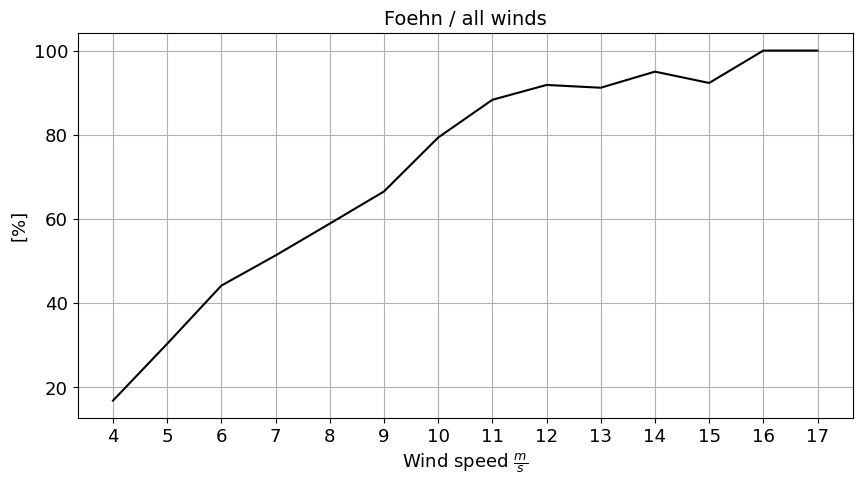

In [354]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(4,18), perc, color = "k", label = "Foehn percentage")
ax.set_ylabel("[%]"), ax.set_title("Foehn / all winds")
ax.set_xlabel(r"Wind speed $\frac{m}{s}$")
ax.set_xticks(np.arange(4, 18))
ax.grid()

In [26]:
foehn_data["wind_rounded"] = foehn_data["3m_Windspeed_jjmc"].copy().round()
perc = []
for speed in np.arange(0,18):
    perc_wind = len(foehn_data.loc[(foehn_data["wind_rounded"] == speed) & (foehn_data["prob_jjmc_filter1"] >= 0.5)]) / len(foehn_data.loc[(foehn_data["wind_rounded"] == speed) & (foehn_data["prob_jjmc_filter1"].notnull())])# >= 0)])
    perc.append(perc_wind * 100)
    print(speed, perc_wind)
    
foehn_data["wind_rounded_foehnsector"] = foehn_data["3m_Windspeed_jjmc"].loc[(foehn_data["3m_Winddir_jjmc"] >= 110) & (foehn_data["3m_Winddir_jjmc"] <= 250)].copy().round()
perc2 = []
for speed in np.arange(0,18):
    perc_wind = len(foehn_data.loc[(foehn_data["wind_rounded_foehnsector"] == speed) & (foehn_data["prob_jjmc_filter1"] >= 0.5)]) / len(foehn_data.loc[(foehn_data["wind_rounded_foehnsector"] == speed) & (foehn_data["prob_jjmc_filter1"].notnull())])# >= 0)])
    perc2.append(perc_wind * 100)
    print(speed, perc_wind)
    
foehn_data["wind_rounded"] = foehn_data["3m_Windspeed_jjmc"].copy().round()
perc3 = []
for speed in np.arange(0,18):
    perc_wind = len(foehn_data.loc[(foehn_data["wind_rounded"] == speed) & (foehn_data["prob_jjmc_filter1"] >= 0.5)]) / len(foehn_data.loc[(foehn_data["wind_rounded"] == speed)])# >= 0)])
    perc3.append(perc_wind * 100)
    print(speed, perc_wind)
    
foehn_data["wind_rounded_foehnsector"] = foehn_data["3m_Windspeed_jjmc"].loc[(foehn_data["3m_Winddir_jjmc"] >= 110) & (foehn_data["3m_Winddir_jjmc"] <= 250)].copy().round()
perc4 = []
for speed in np.arange(0,18):
    perc_wind = len(foehn_data.loc[(foehn_data["wind_rounded_foehnsector"] == speed) & (foehn_data["prob_jjmc_filter1"] >= 0.5)]) / len(foehn_data.loc[(foehn_data["wind_rounded_foehnsector"] == speed)])# >= 0)])
    perc4.append(perc_wind * 100)
    print(speed, perc_wind)

N_speed = []
for speed in np.arange(0, 18):
    n = len(foehn_data.loc[(foehn_data["wind_rounded"] == speed)])
    N_speed.append(n)

0 0.0
1 0.0006627637247321329
2 0.0069274653626731865
3 0.021119210977701544
4 0.05076286895765008
5 0.13766937669376694
6 0.33519553072625696
7 0.49909584086799275
8 0.6081081081081081
9 0.6283783783783784
10 0.7368421052631579
11 0.717391304347826
12 0.85
13 0.9473684210526315
14 1.0
15 1.0
16 1.0
17 1.0
0 0.0
1 0.0008355382258738338
2 0.007634444818681935
3 0.022904313451924195
4 0.054551026662580444
5 0.15333534560821008
6 0.41297935103244837
7 0.6587112171837709
8 0.8294930875576036
9 0.7948717948717948
10 0.9032258064516129
11 0.9428571428571428
12 0.85
13 0.9473684210526315
14 1.0
15 1.0
16 1.0
17 1.0
0 0.0
1 0.0005868544600938967
2 0.006111260896917408
3 0.01878695403395003
4 0.04461711993984208
5 0.11883040935672515
6 0.28169014084507044
7 0.404099560761347
8 0.5042016806722689
9 0.5138121546961326
10 0.6511627906976745
11 0.66
12 0.85
13 0.9473684210526315
14 0.8571428571428571
15 0.8
16 1.0
17 1.0
0 0.0
1 0.0007451564828614009
2 0.006758099781355596
3 0.020463280357328348
4 

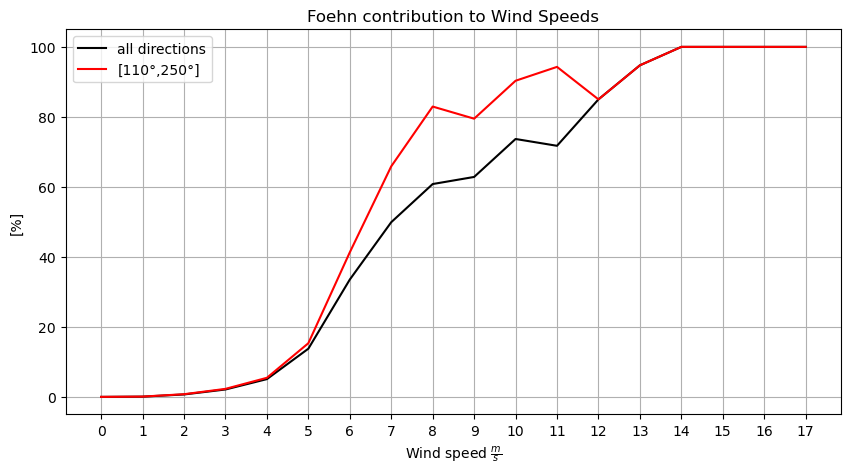

In [61]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(0,18), perc, color = "k", label = "all directions")
#ax.plot(np.arange(0,18), perc3, color = "k", linestyle = "dashed", label = "all directions, all data")
ax.plot(np.arange(0,18), perc2, color = "r", label = "[110°,250°]")
#ax.plot(np.arange(0,18), perc4, color = "r", linestyle = "dashed", label = "[110°,250°], all data")
ax.set_ylabel("[%]", fontsize = 10)#, ax.set_title(r"$N_{foehn} / N_{allwinds}$", fontsize = 12)
ax.set_title(r"Foehn contribution to Wind Speeds", fontsize = 12)
ax.set_xlabel(r"Wind speed $\frac{m}{s}$", fontsize = 10)
ax.set_xticks(np.arange(0, 18), labels = np.arange(0,18), fontsize = 10)

#ax2 = ax.twinx()
#ax2.set_yscale("log")
#ax2.bar(np.arange(0, 18), N_speed, color = "k", alpha = 0.2)

# Manuelle Anpassung der yticks auf der sekundären y-Achse, um mit den unteren fünf ticks von ax übereinzustimmen
#ax2.set_yticks([10**0, 10**1, 10**2, 10**3, 10**4])  # Logarithmische Ticks: 1, 10, 100, 1000, 10000

# Anpassung der Positionen der Ticks durch Skalierung
#scale_factor = 5 / 4  # Da wir 0-80 auf ax mit 10^0 bis 10^4 auf ax2 abgleichen wollen
#ax2.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] * scale_factor)

ax.legend(loc = "upper left", fontsize = 10)
ax.grid()

#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\overview\foehncontribution_speeds.pdf", bbox_inches="tight")
#plt.close()

In [359]:
foehn_winds = foehn_data["3m_Windspeed_jjmc"].loc[foehn_data["prob_jjmc_filter1"] >= 0.5]
other_winds = foehn_data["3m_Windspeed_jjmc"].loc[foehn_data["prob_jjmc_filter1"] < 0.5]
other_winds_foehnsec = foehn_data["3m_Windspeed_jjmc"].loc[(foehn_data["prob_jjmc_filter1"] < 0.5) & (foehn_data["3m_Winddir_jjmc"]>=110)&(foehn_data["3m_Winddir_jjmc"]<=250)]


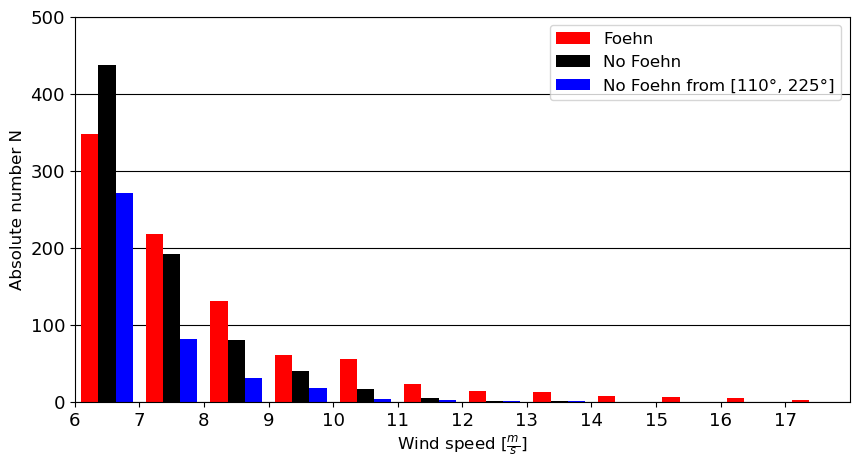

In [361]:
plotlist = [foehn_winds, other_winds, other_winds_foehnsec]
colors = ["r", "k", "b"]
labels = ["Foehn", "No Foehn", "No Foehn from [110°, 225°]"]
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
hist_data = plt.hist(plotlist, color = colors, bins = np.arange(6,19), label = labels, zorder = 2)
plt.xlim(6,18); plt.ylim(0,500); plt.xticks(np.arange(6,18))
plt.ylabel("Absolute number N", fontsize = 12); plt.xlabel(r"Wind speed [$\frac{m}{s}$]", fontsize = 12)
plt.legend(loc = "upper right")
ax.grid(axis = 'y', color = "k", zorder = 1)
#for i in range(len(hist_data[0])):
#    plt.text(hist_data[1][i] + 0.5, hist_data[0][i] + 10, str(int(hist_data[0][i])), ha='center', va='bottom')
#for i,j in enumerate(hist_data[0][0]):
#    plt.text(hist_data[1][i]+0.05, hist_data[0][0][i] + 5, str(hist_data[0][0][i])[0:3], fontsize = 8, color = "r")  
    
#for i,j in enumerate(hist_data[0][1]):
#    plt.text(hist_data[1][i] + 0.4, hist_data[0][1][i] + 5, str(hist_data[0][1][i])[0:3], fontsize = 8, color = "k")
    
#for i,j in enumerate(hist_data[0][2]):
#    plt.text(hist_data[1][i] + 0.65, hist_data[0][2][i] + 5, str(hist_data[0][2][i])[0:3], fontsize = 8, color = "b")

#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\overview\absnumber_speeds.png")
plt.show()

In [128]:
ind = foehn_data["3m_Windspeed_jjmc"].loc[foehn_data["prob_jjmc_filter1"] >= 0.5].nlargest(30).index
foehn_data.loc[ind][["3m_Windspeed_jjmc", "3m_Winddir_jjmc", "prob_jjmc_filter1"]]

,3m_Windspeed_jjmc,3m_Winddir_jjmc,prob_jjmc_filter1
utc_time,,,
2009-01-15 22:00:00,17.32,124.3,1.0
2009-01-17 23:00:00,17.05,139.7,1.0
2009-01-17 12:00:00,16.94,140.2,1.0
2009-01-15 21:00:00,16.85,127.3,1.0
2009-01-16 00:00:00,16.77,120.9,1.0
2009-01-17 18:00:00,16.29,121.2,1.0
2009-01-18 00:00:00,15.92,132.3,1.0
2009-01-15 20:00:00,15.91,133.6,1.0
2009-01-15 23:00:00,15.60,126.6,1.0


### Influence of Foehn on snow cover

plot function for 
- snowheight (SR50, Cosipy output)
- Snowfall? 
- Temperature
- Wind speed and direction + marker for foehn

Calculate daily snow height change and compare that to Foehn occurance.

### Cosipy data
to use: 108h running mean from all the years and from the model with ERA5 sf and tp

1 merged dataframe for every cosipy setup (108h runmean, ERA5_sf_tp)
- merge cosipy datasets after time

### additionally: Firn data --> Sonic Ranger


In [11]:
#load firn data
folder = r"C:\Users\leopo\Master\Thesis\data\data_raw"
firn = pd.read_excel(folder + r"\FIRN_2005-2014_cleaned_191013.xlsx", sheet_name = "FIRN_2005-2014_Hourly", index_col = "Datetime", header = 3, na_values = [-3999, -5999, -6999 , -7999])
firn_wind = pd.read_excel(folder + r"\FIRN_Wind_2010-2014_cleaned_191013.xlsx", sheet_name = "FIRN-Wind_hourly", index_col = "Datetime", header = 3, na_values = [-3999, -5999, -6999 , -7999])

In [12]:
for data in [firn, firn_wind]:
    data["utc_time"] = data.index  + pd.DateOffset(hours = 8)
    

In [13]:
#foehn prob to jjmc
jjmc["prob_jjmc_filter1"] = foehn_data["prob_jjmc_filter1"].copy()

### load data for winter situations
only data from the (complete) hydrological years as they are the most complete

In [14]:
starts = ["2008", "2009", "2010", "2010", "2011", "2013"]
ends = ["2009", "2009", "2012", "2011", "2012", "2014"]
cosipy_output = r"C:\Users\leopo\Master\Thesis\Code\cosipy\data\output"
                               
cosipy_108hmean_list = []
for start, end in zip(starts, ends):
    cosipy_108hmean_list.append(xr.open_dataset(cosipy_output + fr"\108hmean\McCall_{start}_{end}_108hmean.nc"))
cosipy_108hmean_13_14_hyd = xr.open_dataset(cosipy_output + fr"\108hmean\McCall_2013_2014_108hmean_hyd.nc")
cosipy_108hmean_08_09_hyd = xr.open_dataset(cosipy_output + fr"\108hmean\McCall_2008_2009_108hmean_hyd.nc")
    

cosipy_sf_tp_list = []
for start, end in zip(starts, ends):
    cosipy_sf_tp_list.append(xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_{start}_{end}_era5_sf_tp.nc"))
cosipy_sf_tp_13_14_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2013_2014_era5_sf_tp_hyd.nc")
cosipy_sf_tp_08_09_hyd = xr.open_dataset(cosipy_output + fr"\era5_precip\McCall_2008_2009_era5_sf_tp_hyd.nc") 

cosipy_08_09_hyd_list = [cosipy_108hmean_08_09_hyd, cosipy_sf_tp_08_09_hyd]
cosipy_13_14_hyd_list = [cosipy_108hmean_13_14_hyd, cosipy_sf_tp_13_14_hyd]

In [15]:
#cosipy xarrays to dataframes 
var_todrop = ["HGT", "MASK", "SLOPE", "ASPECT", "LAYER_HEIGHT", "LAYER_RHO", "LAYER_T", "LAYER_LWC",
             "LAYER_CC", "LAYER_POROSITY", "LAYER_ICE_FRACTION", "LAYER_IRREDUCIBLE_WATER", "LAYER_REFREEZE"]

def cosipy_to_dataframe(data):
    data_red = data.drop_vars(var_todrop) 
    pd_data = data_red.sel(lat = 69.3, lon = -143.8).to_dataframe()
    pd_data.index = pd.to_datetime(data_red.time)
    pd_data["G_out"] = pd_data["G"] * pd_data["ALBEDO"]
    return pd_data
    #data_return.append(pd_data)
    
#xarray to dataframe    
cosipy_108hmean_pdlist = list(map(cosipy_to_dataframe, cosipy_108hmean_list))
cosipy_sf_tp_pdlist = list(map(cosipy_to_dataframe, cosipy_sf_tp_list))

cosipy_08_09_hyd_pdlist = list(map(cosipy_to_dataframe, cosipy_08_09_hyd_list))
cosipy_13_14_hyd_pdlist = list(map(cosipy_to_dataframe, cosipy_13_14_hyd_list))

In [16]:
#concatenate dataframes: 2008_2009_hyd, 2010_2011, 2011-2012, 2013-2014_hyd
#hydrological years only
#108h running mean
cosipy_108hyd = pd.concat([cosipy_08_09_hyd_pdlist[0], cosipy_108hmean_pdlist[3], cosipy_108hmean_pdlist[4], cosipy_13_14_hyd_pdlist[0]])
#ERA5_sf_tp
cosipy_sf_tp_hyd = pd.concat([cosipy_08_09_hyd_pdlist[1], cosipy_sf_tp_pdlist[3], cosipy_sf_tp_pdlist[4], cosipy_13_14_hyd_pdlist[1]])

#all data
cosipy_108 = pd.concat([cosipy_108hmean_pdlist[0], cosipy_108hmean_pdlist[1], cosipy_108hmean_pdlist[2], cosipy_108hmean_pdlist[5]])
cosipy_sf_tp = pd.concat([cosipy_sf_tp_pdlist[0], cosipy_sf_tp_pdlist[1], cosipy_sf_tp_pdlist[2], cosipy_sf_tp_pdlist[5]])

In [17]:
#replace overall data by hydrological year data in all data datasets
starts = ["2008-09-01 01:00:00", "2010-09-01 01:00:00", "2011-09-01 01:00:00", "2013-09-01 01:00:00"]
ends = ["2009-07-12 23:00:00", "2011-08-31 23:00:00", "2012-08-31 23:00:00", "2014-08-31 23:00:00"]

for start, end in zip(starts, ends):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    cosipy_108[start:end] = cosipy_108hyd[start:end].copy()
    cosipy_sf_tp[start:end] = cosipy_sf_tp_hyd[start:end].copy()

In [18]:
for data in [cosipy_108, cosipy_sf_tp]:
    data["Datetime"] = data.index - pd.DateOffset(hours = 8)

In [19]:
jjmc.set_index("Datetime", inplace = True)
foehn_data.set_index("Datetime", inplace = True)
cosipy_108.set_index("Datetime", inplace = True)
cosipy_sf_tp.set_index("Datetime", inplace = True)

In [20]:
jjmc.index = pd.to_datetime(jjmc.index)

In [29]:
#plot function
def plot_snow_foehn(start, end, cosipy_data, cosipy_data2, jjmc_data, foehn_data, legend_loc = "right", ending = "pdf", folder = None):

    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    #copy the single datasets
    data_plot = cosipy_data[start:end].copy()
    data_plot2 = cosipy_data2[start:end].copy()
    jjmc_plot = jjmc[start:end].copy()
    foehn_plot = foehn_data[start:end].copy()
   
    #label and tick font
    plt.rcParams['axes.labelsize'] = 13  # fontsize of the x and y labels
    plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
    plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
    plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
    plt.rcParams['axes.titlesize'] = 14   # fontsize of the subplot titles

    
    fig = plt.figure(figsize = (15,8))
    fig.tight_layout(pad = 2.0)
    
    #snowheight
    ax = fig.add_subplot(3,1,1)
    ax.plot(jjmc_plot.index, jjmc_plot["snow_height"], color = "k", label = "SR50 JJMC", linewidth = 2, zorder = 2)
    ax.plot(data_plot.index, data_plot["SNOWHEIGHT"], color = "b",linestyle = "dashed", linewidth = 2, label = "Cos108", zorder = 2)
    ax.plot(data_plot.index, data_plot2["SNOWHEIGHT"], color = "g",linestyle = "dashed", linewidth = 2, label = "CosERA5", zorder = 2)
    #ax.axhline(0, color = "r", linestyle = "dashed")
    ax.set_title("Snow Height");
    ax.legend(loc = f"upper {legend_loc}", ncol = 3)
    ax.grid(zorder = 0), ax.set_ylabel("Snow Height [m]"), ax.set_ylim(0.0, 0.6)
    #axvspan_args = {'alpha': 0.2, 'color': 'red'}
    #ax.axvspan(x1, x2, **axvspan_args); ax.axvspan(x3, x4, **axvspan_args)
    ax.set_xticklabels([]);  

    ax2 = fig.add_subplot(3,1,2)
    #T2m and surface T 
    ax2.plot(data_plot.index, data_plot["T2"]-273.15, color = "k", label = "JJMC 2m", linewidth = 2, zorder = 2)
    #ax2.plot(data_plot.index, data_plot["TS_obs"], color = "blue", label = "TS observed", linewidth = 2)
    ax2.plot(data_plot.index, data_plot["TS"]-273.15, color = "red", label = "TS cosipy", linewidth = 2, zorder = 2)
    ax2.plot(data_plot.index, jjmc_plot["T_sfc"]-273.15, color = "red", label = "TS JJMC", linestyle = "dashed", linewidth = 2, zorder = 2)
    ax2.legend(ncol = 3, loc = f"upper {legend_loc}"); ax2.set_ylabel("T [°C]"); ax2.set_xticklabels([])
    ax2.set_title("Temperature and Relative Humidity"); 
    #ax2.axvspan(x1, x2, **axvspan_args); ax2.axvspan(x3, x4, **axvspan_args)
    #ax2.grid(zorder = 0)
    
       # Berechnung der Position und Größe der neuen y-Achse für das untere Drittel
    left, bottom, width, height = ax2.get_position().bounds
    bottom_third = bottom + height * 0.25
    ax2_right_position = [left, bottom, width, height / 3]

    # Erstelle eine neue Achse für RH, die nur das untere Drittel des Plots ausfüllt
    ax2_right = fig.add_axes(ax2_right_position, sharex=ax2)
    ax2_right.plot(jjmc_plot.index, jjmc_plot["RH 2m"], color="green", label="RH 2m", linewidth=2)

    # Y-Label auf die rechte Seite setzen und Umrandung entfernen
    ax2_right.yaxis.set_label_position('right') 
    ax2_right.yaxis.tick_right()
    ax2_right.set_ylabel("RH [%]", color="green")
    ax2_right.tick_params(axis='y', labelcolor="green")

    # Entfernen der Umrandung (Spines) der neuen Achse
    ax2_right.spines['top'].set_visible(False)
    ax2_right.spines['bottom'].set_visible(False)
    ax2_right.spines['left'].set_visible(False)
    ax2_right.spines['right'].set_color('green')

    # Transparent machen, damit ax2 im Hintergrund sichtbar bleibt
    ax2_right.patch.set_alpha(0)

    # Setze die Achsenlimiten und Ticks nur für die rechte Achse
    ax2_right.set_ylim(0, 100)
    ax2_right.set_yticks([0, 50, 100])

    # Entferne die x-Achsenbeschriftung, da sie mit ax2 geteilt wird
    #ax2_right.set_xticks([])
    # Zeige die Legende der zweiten y-Achse (optional)
    #ax2_right.legend(loc="upper right")
    
    # Färbung des Bereichs zwischen dem unteren Ende von ax2 und der Linie auf ax2_right
    ax2_right.fill_between(jjmc_plot.index, 0, jjmc_plot["RH 2m"], color="green", alpha=0.15)
    ax2_right.set_xticklabels([])
    ax2.grid()

    ax3 = fig.add_subplot(3,1,3)
    #3m Windspeed and direction (foehn dataset
    colors = ["lime" if value >= 0.5 else "black" for value in foehn_plot["prob_jjmc_filter1"]]
    size = [35 if value >= 0.5 else 8 for value in foehn_plot["prob_jjmc_filter1"]]
    #markers = ["*" if value >= 0.5 else "." for value in foehn_plot["prob_jjmc_filter1"]]
    #markers = ["P" if value >= 0.5 else "." for value in foehn_plot["prob_jjmc_filter1"]    
    ax4 = ax3.twinx()
    
    #ERA5
    ax3.plot(foehn_plot.index, foehn_plot["windspeed_crest800"], color = "r", label = "ERA5crest800", zorder = 2)
    ax4.scatter(foehn_plot.index, foehn_plot["winddir_crest800"], color = 'r', s = 8, label = "dd ERA5 crest - 800 hPa", zorder = 2)
    #AHAB
    ax3.plot(foehn_plot.index, foehn_plot["windspeed_ahab"], color = "blue", label = "AHAB", zorder = 1)
    #ax4.scatter(foehn_plot.index, foehn_plot["winddir_ahab"], color = 'blue', s = 10, label = "dd AHAB")
    ax4.scatter(foehn_plot.index, foehn_plot["winddir_mccall800"], color = 'blue', s = 8, label = "dd ERA5 mccall - 800 hPa", zorder = 2)
    #JJMC
    ax3.plot(foehn_plot.index, foehn_plot["3m_Windspeed_jjmc"], color = "k", label = "JJMC", linewidth = 3, zorder = 2)
    ax4.scatter(foehn_plot.index, foehn_plot["3m_Winddir_jjmc"], color = colors, s = size, label = "dd JJMC", zorder = 2)
    
    # Set the transformation for the right y-axis (map 0-360 to 10-20)
    #ax4.set_ylim(0, 20); 
    right_y_limit = 360
    left_y_limit = 20
    trans = lambda x: ((x+10) * (left_y_limit / right_y_limit))
    ax3.set_ylim(0, 20); ax3.set_yticks([0, 5, 10, 15, 20]);
    ax4.set_ylim(trans(0), trans(right_y_limit))

    ax3.grid()
    
    #ax3.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center', ncol = 3); 
    ax3.set_title("Wind Speed and Direction")
   # ax3.set_title("wind speed and direction at JJMC, AHAB, ERA5 crest 800hPa")
    ax3.set_ylabel("Wind Speed [m/s]"); ax4.set_ylabel("Wind Direction [°]")
    #ax3.set_xlabel(foehn_plot.index, fontsize = 15);
    ax4.set_yticks([0, 90, 180, 270, 360]); ax4.grid(False)
    #ax4.legend(bbox_to_anchor =(0.7,-0.4), loc='lower center', ncol = 3)
    ax3.tick_params(axis='both', which='major')
    ax4.tick_params(axis='both', which='major')
    ax4.grid(zorder = 0)
    #ax3.axvspan(x1, x2, **axvspan_args); ax3.axvspan(x3, x4, **axvspan_args)
    #legend = ax3.legend(ncol = 3, loc = "upper left")
    # Hole alle Linien und Punkte für die Legende von beiden Achsen
    lines, labels = ax3.get_legend_handles_labels()
    #lines2, labels2 = ax4.get_legend_handles_labels()

    # Erstelle eine kombinierte Legende auf einer der Achsen
    combined_legend = ax4.legend(lines, labels, loc=f'upper {legend_loc}', ncol=3)
    combined_legend.set_zorder(7)  # Setze zorder der kombinierten Legende
    #legend.set_zorder(7)
    
    # Automatic shading for areas with two consecutive values above threshold
    def shade_above_threshold(ax, df, threshold=0.5):
        is_above_threshold = df["prob_jjmc_filter1"] >= threshold
        start_index = None
        for i in range(1, len(is_above_threshold)):
            if is_above_threshold.iloc[i-1] and is_above_threshold.iloc[i]:
                if start_index is None:
                    start_index = df.index[i-1]
                end_index = df.index[i]
            elif start_index is not None:
                ax.axvspan(start_index, end_index, alpha=0.2, color='red')
                start_index = None

        # Ensure last range is also shaded if the loop ends while inside a valid range
        if start_index is not None:
            ax.axvspan(start_index, end_index, alpha=0.2, color='red')

    # Apply shading to all subplots
    for subplot in [ax, ax2, ax3]:
        shade_above_threshold(subplot, foehn_plot)
    
    plt.subplots_adjust(hspace=0.2)
    #save plots
    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\foehn\case_studies\snowloss_events\\{(str(start))[0:10]}_{(str(end))[0:10]}_AKTD.{ending}", 
               bbox_inches="tight")
    plt.close()
    #plt.show()

In [33]:
start = "2014-11-19 00:00:00"
end = "2014-11-24 00:00:00"

plot_snow_foehn(start, end, cosipy_108, cosipy_sf_tp, jjmc, foehn_data, legend_loc = "right", ending = "pdf")

	snowheight_diff	foehn_daily	wind_max	wind_mean	daily_heightchange_sum <br>
2008-10-05	-0.044	0.980979	6.743	3.149875	-0.051 <br>
2009-01-25	-0.068	0.994776	7.200	2.387292	-0.066 <br>
2009-10-09	-0.053	0.999196	8.060	6.099417	-0.053 <br>
2010-10-08	-0.054	0.000000	4.324	1.726208	-0.054 <br>
2010-10-19	-0.069	0.000000	7.540	1.674875	-0.062 <br>
2010-11-04	-0.114	0.998164	12.370	5.268500	-0.109 <br>
2011-11-02	-0.077	0.294745	10.640	6.502083	-0.089 <br>
2011-12-06	-0.043	0.000000	7.620	3.091625	-0.051 <br>
2011-12-27	-0.074	0.000000	9.860	5.093167	-0.068 <br>
2012-01-03	-0.059	0.934093	5.596	2.384417	-0.059 <br>
2012-01-07	-0.069	0.985276	5.798	2.539500	-0.063 <br>
2012-01-14	-0.047	0.000000	8.280	4.363083	-0.082 <br>
2012-10-10	-0.055	0.000000	4.817	3.000583	-0.056 <br>
2012-11-13	-0.118	0.000000	9.780	6.067375	-0.111 <br>
2013-04-24	-0.109	0.000000	11.300	8.222042	-0.110 <br>
2013-11-10	-0.275	1.000000	14.410	6.495417	-0.275 <br>
2014-11-22	-0.068	0.998965	6.613	3.153292	-0.078 <br>

In [61]:
cosipy_sf_tp["2013-11-09":"2013-11-10"]["SUBLIMATION"].sum() * 1000

-0.4010358907504308

In [218]:
jjmc["snow_height"]["2008-10-04 22:00:00":"2008-10-05"].diff(periods = -1)

Datetime
2008-10-04 22:00:00    0.015
2008-10-04 23:00:00    0.005
2008-10-05 00:00:00    0.002
2008-10-05 01:00:00   -0.004
2008-10-05 02:00:00    0.001
2008-10-05 03:00:00   -0.005
2008-10-05 04:00:00    0.001
2008-10-05 05:00:00    0.004
2008-10-05 06:00:00    0.005
2008-10-05 07:00:00   -0.004
2008-10-05 08:00:00    0.007
2008-10-05 09:00:00   -0.004
2008-10-05 10:00:00   -0.005
2008-10-05 11:00:00    0.005
2008-10-05 12:00:00    0.000
2008-10-05 13:00:00    0.006
2008-10-05 14:00:00    0.001
2008-10-05 15:00:00    0.005
2008-10-05 16:00:00    0.005
2008-10-05 17:00:00    0.006
2008-10-05 18:00:00    0.001
2008-10-05 19:00:00    0.008
2008-10-05 20:00:00   -0.010
2008-10-05 21:00:00    0.000
2008-10-05 22:00:00   -0.021
2008-10-05 23:00:00      NaN
Name: snow_height, dtype: float64

In [209]:
jjmc["snow_height"]["2008-10-05"][0] - jjmc["snow_height"]["2008-10-05"][-1]

0.0040000000000000036

In [213]:
jjmc["snowheight_diff_hourly"]["2008-10-05 01:00:00":"2008-10-06 00:00:00"].sum()

-0.010999999999999899

In [61]:
#foehn
#no foehn
starts = ["2009-01-23", "2009-10-07", "2012-01-01", "2014-11-19"]
ends = ["2009-01-26", "2009-10-10", "2012-01-07", "2014-11-23"]

for start, end in zip(starts, ends):
    plot_snow_foehn(start, end, cosipy_108, cosipy_sf_tp, jjmc, foehn_data)

In [40]:
#no foehn
starts = ["2010-11-02", "2011-01-08", "2011-12-25", "2012-11-11", "2013-04-22"]
ends = ["2010-11-06", "2011-01-12", "2011-12-30", "2012-11-16", "2013-04-26"]

for start, end in zip(starts, ends):
    plot_snow_foehn(start, end, cosipy_108, cosipy_sf_tp, jjmc, foehn_data)

In [75]:
firn.set_index("Datetime", inplace = True)

### plot firn wind and SR50 data

In [394]:
#label and tick font
plt.rcParams['axes.labelsize'] = 13  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 14  # fontsize of the subplot titles

#11-2013
#x1, x2, x3, x4 = [pd.to_datetime("2013-11-08 18:00:00"), pd.to_datetime("2013-11-10 07:00:00"),
#                  pd.to_datetime("2013-11-11 07:00:00"), pd.to_datetime("2013-11-11 15:00:00")]

start = "2013-11-07 16:00:00"
end = "2013-11-12 16:00:00"
start = pd.to_datetime(start)
end = pd.to_datetime(end)

SR50_data = (firn[start:end]["SR50 (cor)"] - firn[start:end]["SR50 (cor)"][0]) * (-1)
foehn_plot = foehn_data[start:end].copy()

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(3,1,1)
ax.plot(firn[start:end].index, SR50_data, color = "k", linewidth = 2)
ax.set_ylabel(r"[m]")
ax.set_title("SR50 Snow Height Change $\Delta H_{snow}$ ")
#axvspan_args = {'alpha': 0.2, 'color': 'red'}
#ax.axvspan(x1, x2, **axvspan_args); ax.axvspan(x3, x4, **axvspan_args)
ax.set_xticklabels([])
ax.grid()


ax2 = fig.add_subplot(3,1,2)
ax2.plot(firn_wind[start:end].index, firn_wind[start:end]["WindSpeed (m/s)"], color = "k", linewidth = 2)
#ax2.plot(firn[start:end].index, firn[start:end]["WindSpeed (m/s)"], color = "k", linewidth = 2)
ax2.set_title("Wind Speed and Direction")
ax2.set_ylabel(r"[$\frac{m}{s}$]")
ax2.set_ylim(0,10); ax2.set_yticks([0, 2.5, 5, 7.5, 10])
#ax.axvspan(x1, x2, **axvspan_args); ax.axvspan(x3, x4, **axvspan_args)
ax2.grid()
ax2.set_xticklabels([])
ax2right = ax2.twinx()
ax2right.scatter(firn_wind[start:end].index, firn_wind[start:end]["WindDir"], color = "k", s=8)
right_y_limit = 360
left_y_limit = 10
trans = lambda x: ((x) * (left_y_limit / right_y_limit))
ax2right.set_ylim(trans(0), trans(right_y_limit)); ax2right.set_yticks([0, 90, 180, 270, 360]);
ax2right.set_ylabel("Direction [°]")
ax2right.set_xticklabels([])

ax3 = fig.add_subplot(3,1,3)
ax3.plot(firn[start:end].index, firn[start:end]["AT (C )"], color = "k", linewidth = 2)
ax3.set_title("Air Temperature"); ax3.set_ylabel(r"[°C]")
#ax3.axvspan(x1, x2, **axvspan_args); ax3.axvspan(x3, x4, **axvspan_args)
ax3.grid()
plt.subplots_adjust(hspace=0.4)


# Automatic shading for areas with two consecutive values above threshold
def shade_above_threshold(ax, df, threshold=0.5):
    is_above_threshold = df["prob_jjmc_filter1"] >= threshold
    start_index = None
    for i in range(1, len(is_above_threshold)):
        if is_above_threshold.iloc[i-1] and is_above_threshold.iloc[i]:
            if start_index is None:
                start_index = df.index[i-1]
            end_index = df.index[i]
        elif start_index is not None:
            ax.axvspan(start_index, end_index, alpha=0.2, color='red')
            start_index = None

    # Ensure last range is also shaded if the loop ends while inside a valid range
    if start_index is not None:
        ax.axvspan(start_index, end_index, alpha=0.2, color='red')

# Apply shading to all subplots
for subplot in [ax, ax2, ax3]:
    shade_above_threshold(subplot, foehn_plot)

#plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\foehn\case_studies\FIRN_{(str(start))[0:10]}_{(str(end))[0:10]}_AKTD.png", bbox_inches="tight")
#plt.close()
plt.show()

In [683]:
jjmc["2013-11-11"]["snow_height"]

C:\Users\leopo\AppData\Local\Temp\ipykernel_15408\2137715362.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  jjmc["2013-11-11"]["snow_height"]


TIMESTAMP
2013-11-11 00:00:00    0.041
2013-11-11 01:00:00    0.040
2013-11-11 02:00:00    0.040
2013-11-11 03:00:00    0.037
2013-11-11 04:00:00    0.033
2013-11-11 05:00:00    0.032
2013-11-11 06:00:00    0.035
2013-11-11 07:00:00    0.027
2013-11-11 08:00:00    0.036
2013-11-11 09:00:00    0.033
2013-11-11 10:00:00    0.034
2013-11-11 11:00:00    0.029
2013-11-11 12:00:00    0.026
2013-11-11 13:00:00    0.037
2013-11-11 14:00:00    0.050
2013-11-11 15:00:00    0.051
2013-11-11 16:00:00    0.044
2013-11-11 17:00:00    0.044
2013-11-11 18:00:00    0.053
2013-11-11 19:00:00    0.009
2013-11-11 20:00:00    0.007
2013-11-11 21:00:00    0.015
2013-11-11 22:00:00    0.000
2013-11-11 23:00:00    0.018
Name: snow_height, dtype: float64

### Where does the snow go?
Look at Sublimation modelled by Cosipy during the single events. Use ERA5 model (maybe also look at snowfall data here) and the model with 108hmean as this is probably the best representation of the Snow surface.
models: cosipy_108, cosipy_sf_tp

### SUBLIMATION 
use calculations from Palm paper, Blowing snow sublimation and transport over Antarctica

In [163]:
#constants
T_0 = 273.16
e_s0 = 6.11 #hPa
R_w = 461.5 #J/kg
L_sub = 2.834e6
L_v = 2.5e6
N_min = 5e4  #minimum number density per m^3
N_max = 1e6  #maximum number density
v_fall = 0.1 #fall speed of snow particle
kin_visc = 1.512 * 1e-5 # m^2/s kinematic viscosity of air
rho_ice = 917 #kg/m^3
rho_air = 1.1 #kg/m^3
K = 0.024 # W m^-1 K^-1 thermal conductivity of air
M = 18.015 #g/mol molecular weight of water
 

#functions
def particle_radius(z):
    #particle radius micrometer
    r_z = (40 - z/20) * 1e-6
    #r_z = 20
    return r_z

def blowsnow_mixratio(r_z, N_z):
    q_b_z = (4*np.pi*rho_ice*r_z**3 * N_z) / (3*rho_air)
    return q_b_z

def vapor_mixratio(RH, T, p):
    e = RH * 2.504 * 10**9 * np.exp(-5417/T)
    qv_z = 0.622 * (e/(p-e))
    return qv_z


def ice_satmixratio(T, p):
    es = e_s0 * np.exp((L_sub/R_w) * (1/T_0 - 1/T))
    q_is = 0.622 * es/(p-es)
    return q_is

    
def sublimation_z(z, N_z, RH, T, p):
    r_z = particle_radius(z)# * 1e-6
    q_b_z = blowsnow_mixratio(r_z, N_z)
    Re =  2*r_z*v_fall/kin_visc #Reynolds number
    Nu = 1.79 + 0.606*(Re**0.5) #Nusselt number
    qv_z = vapor_mixratio(RH, T, p)
    qis_z = ice_satmixratio(T, p)
    Fk_z = (L_sub/(R_w*T) - 1)*(L_sub/(K*T))  
    D = 21.2 * 1e-6 * (1+0.007*(T-273.15)) # [m^2/s]diffusion coefficient of water vapour, Monteith, John L. and Unsworth, Mike H.
    #Fd_z = (R_w*T)/(D*RH * 2.504 * 10**9 * np.exp(-5417/T)*100)
    e_i = 611 * np.exp(L_sub/R_w * (1/273.16 - 1/T))
    Fd_z = (R_w*T)/(D*e_i)
    #sublimation at height z
    Sb_z = (q_b_z * Nu * (qv_z/qis_z - 1)) / (2*rho_ice*r_z**2 * (Fk_z + Fd_z))
    #return r_z, q_b_z, Re, Nu, qv_z, qis_z, Fk_z, D, Fd_z, Sb_z
    return Sb_z, q_b_z#, q_b_z

In [120]:
2*particle_radius(50)*v_fall/kin_visc

0.49603174603174593

### improvements:
- temperature: dry adiabatic stratification in foehn situation-->calculate temperature profile from JJMC
- rel. humidity: low in Foehn case...assume constant RH value from JJMC?
- pressure: use JJMC pressure, barometric height formula upwards

In [168]:
blowsnow_mixratio(39*1e-6, 1e6)

0.00020713766720602985

In [164]:
start = pd.to_datetime("2013-11-09 16:00:00")
end = pd.to_datetime("2013-11-10 15:00:00")
#z_a = np.arange(0,330, 30)
#z = np.tile(z_a, (25,1))
sublimation_list = []
Fk_list = []
Fd_list = []
for zi in [100]:#[100,200,300,400,500, 600, 700]:
#for zi in [10,20,30,40,50]:
    z = np.tile(np.arange(0,zi,10), (len(foehn_data[start:end]),1))
    dz = 10
    #T = foehn_data[start:end]["3m_T_ahab"].values + 273.15
    #T_z = foehn_data[start:end]["2m_T_jjmc"].values - z * 0.0098
    T_z = (np.tile(foehn_data[start:end]["2m_T_jjmc"].values, (len(z[0]),1)).T - z * 0.0098) + 273.15
    RH = np.tile(foehn_data[start:end]["2m_RH_jjmc"].values, (len(z[0]),1)).T / 100
    #p = foehn_data[start:end]["pressure_ahab"].values
    p_z = np.tile(foehn_data[start:end]["pressure_jjmc"].values, (len(z[0]),1)).T / np.power((1 - (0.0065 * z) / (T_z)), 5.255)
    N_range = np.linspace(N_max, N_min, len(np.arange(0,zi,10)))

    Sb_z, q_b_z = sublimation_z(z, N_range, RH, T_z, p_z)
    sublimation_list.append(Sb_z)
    Fk_list.append(Fk_z)
    Fd_list.append(Fd_z)
    
total_dailysublimation_list = [] 
total_hourlysublimation_list = []
for Sb_z in sublimation_list:
    col_integrated = np.sum(Sb_z, axis = 1) * rho_air * dz #kg/m^2*s
    #col_integrated = np.sum(Sb_z[:,1:], axis = 1) * rho_air #kg/m^2*s

    col_integrated_SWE = col_integrated * 3600 * 1e3 * 1/rho_ice #mm SWE
    print(len(col_integrated_SWE))
    total_hourlysublimation_list.append(col_integrated_SWE)
    total_dailysublimation_list.append(np.sum(col_integrated_SWE))

    

24


In [169]:
total_dailysublimation_list

[-12.575826037697198]

In [162]:
Sb_z

array([[-2.06266951e-06, -1.80514951e-06, -1.55747204e-06,
        -1.31945381e-06, -1.09091310e-06, -8.71669804e-07,
        -6.61545405e-07, -4.60362981e-07, -2.67947209e-07,
        -8.41243726e-08],
       [-2.39839181e-06, -2.10000546e-06, -1.81277935e-06,
        -1.53651570e-06, -1.27101822e-06, -1.01609221e-06,
        -7.71544477e-07, -5.37183402e-07, -3.12818918e-07,
        -9.82625183e-08],
       [-2.47493273e-06, -2.16730038e-06, -1.87110878e-06,
        -1.58615815e-06, -1.31225019e-06, -1.04918809e-06,
        -7.96776552e-07, -5.54821765e-07, -3.23131440e-07,
        -1.01514803e-07],
       [-2.85314938e-06, -2.49956092e-06, -2.15887716e-06,
        -1.83088230e-06, -1.51536204e-06, -1.21210353e-06,
        -9.20895378e-07, -6.41527701e-07, -3.73792093e-07,
        -1.17481650e-07],
       [-3.04125274e-06, -2.66484367e-06, -2.30205784e-06,
        -1.95267202e-06, -1.61646439e-06, -1.29321460e-06,
        -9.82703747e-07, -6.84714393e-07, -3.99030570e-07,
        -1.

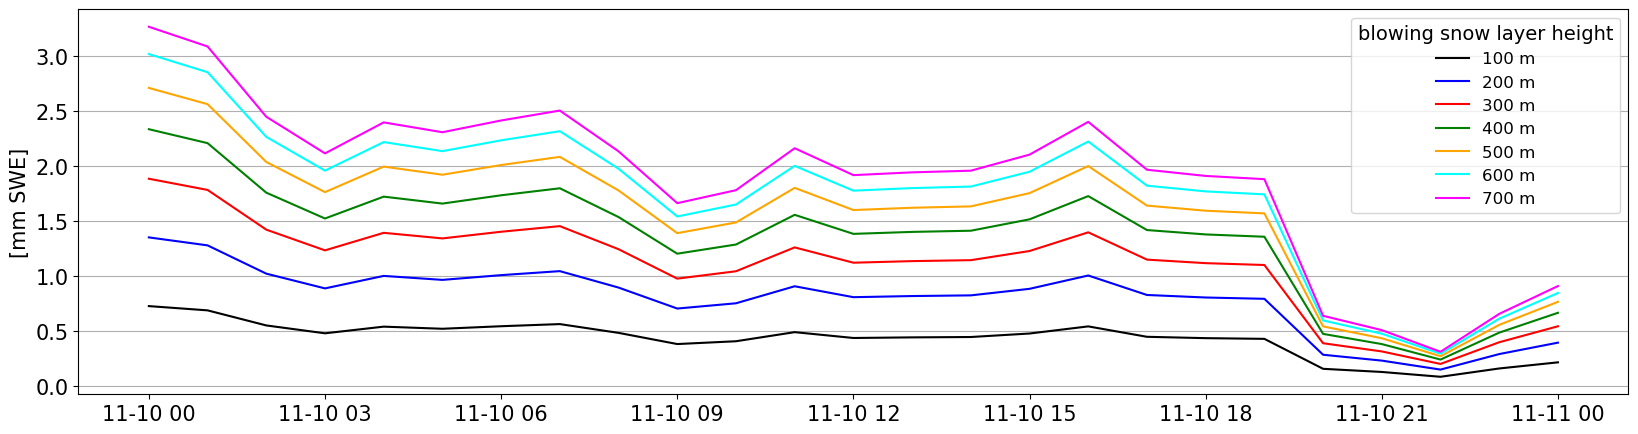

In [751]:
colors = ["k", "b", "r", "green", "orange", "cyan", "magenta"]
levels = np.arange(100,800,100)

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

for sub, c, l in zip(total_hourlysublimation_list, colors, levels):
    ax.plot(foehn_data[start:end].index, sub * (-1), color = c, label = f"{l} m")
    
ax.grid(axis = "y")  
legend = ax.legend(loc = "upper right")
legend.set_title('blowing snow layer height')
legend.get_title().set_fontsize(14)
ax.set_ylabel("[mm SWE]")
plt.show()

In [562]:
cosipy_108hmean_13_14_hyd["LAYER_RHO"].sel(time = start).values

array([[[303.28380386, 303.36201903, 303.46102515, 303.57081637,
         303.68296609, 303.79065766, 303.88862488, 303.97300796,
         304.04113305, 304.09119998, 304.12184534, 304.12663121,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        , 917.        , 917.        ,
         917.        , 917.        ,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,   

In [28]:
#snow height which can be sublimated
np.array(total_dailysublimation_list)/1000 * rho_ice/300

array([-0.03280519])

True

In [154]:
start = pd.to_datetime("2013-11-09 16:00:00")
end = pd.to_datetime("2013-11-10 15:00:00")


#parameterization by Dery and Yau 2002
a0 = 3.78407e-1
a1 = -8.64089e-2
a2 = -1.60570e-2
a3 = 7.25516e-4
a4 = -1.25650e-1
a5 = 2.48430e-2
a6 = -9.56871e-4
a7 = 1.24600e-2
a8 = 1.56862e-3
a9 = -2.93002e-4

RHi = foehn_data[start:end]["2m_RH_jjmc"].copy().values / 100
#u = np.ones(len(foehn_data[start:end])) * 10
u = foehn_data[start:end]["3m_Windspeed_jjmc"].copy().values 
T = foehn_data[start:end]["2m_T_jjmc"].copy().values
p = foehn_data[start:end]["pressure_jjmc"].copy().values
U = 1

def vapor_mixratio(RH, T, p):
    e = RH * 2.504 * 10**9 * np.exp(-5417/(T+273.15))
    qv_z = 0.622 * (e/(p-e))
    return qv_z

qv = vapor_mixratio(RHi, T, p)

def ice_satmixratio(T, p):
    es = e_s0 * np.exp((L_sub/R_w) * (1/T_0 - 1/(T+273.15)))
    q_is = 0.622 * es/(p-es)
    return q_is
q_is = ice_satmixratio(T, p)

Fk_z = (L_sub/(R_w*(T+273.15)) - 1)*(L_sub/(K*(T+273.15)))
D = 21.2 * 1e-6 * (1+0.007*(T)) # [m^2/s]diffusion coefficient of water vapour, Monteith, John L. and Unsworth, Mike H.
#Fd_z = (R_w*T)/(D*RH * 2.504 * 10**9 * np.exp(-5417/T)*100)
e_i = 611 * np.exp(L_sub/R_w * (1/273.16 - 1/(T+273.15)))
Fd_z = (R_w*(T+273.15))/(D*e_i)

eps = (qv/q_is - 1)/(2*rho_ice*(Fk_z + Fd_z))
#eps = (RHi - 1)/(2*rho_ice*(Fk_z + Fd_z))

Qs = (a0 + a1*eps + a2*eps**2 + a3*eps**3 + a4*u + a5*eps*u + a6*eps**2*u + a7*u**2 + a8*eps*u**2 + a9*u**3) / U
Qs 

array([0.02133679, 0.0086221 , 0.00765101, 0.00768661, 0.00775724,
       0.04964432, 0.08666102, 0.03806738, 0.00871548, 0.00825301,
       0.00953196, 0.00945754, 0.03522618, 0.02242932, 0.01433305,
       0.07778029, 0.22954517, 0.27836257, 0.22550863, 0.08033399,
       0.0241401 , 0.0674335 , 0.00762836, 0.00956652])

In [159]:
eps

array([-1.86769332e-11, -2.00527887e-11, -1.97357439e-11, -2.20781330e-11,
       -2.31232580e-11, -2.13802589e-11, -1.96117567e-11, -1.99493182e-11,
       -2.58512626e-11, -2.39498529e-11, -1.96105448e-11, -1.78856852e-11,
       -1.96157752e-11, -1.84344896e-11, -1.96319884e-11, -2.05523762e-11,
       -1.81654478e-11, -1.55078415e-11, -1.76916502e-11, -2.13102962e-11,
       -1.96241992e-11, -2.06685048e-11, -2.13118461e-11, -2.26857450e-11])

In [54]:
cosipy_sf_tp["2013-11-09":"2013-11-10"]["SUBLIMATION"].sum()* 1000/300

-0.001336786302501436

In [55]:
cosipy_108["2013-11-09 20:00:00":"2013-11-10 07:00:00"]["SUBLIMATION"].sum() * 1000/300


-0.0006950454598400438

In [56]:
cosipy_108["2013-11-09":"2013-11-10"]["SUBLIMATION"].sum()

-0.00044397498520078237

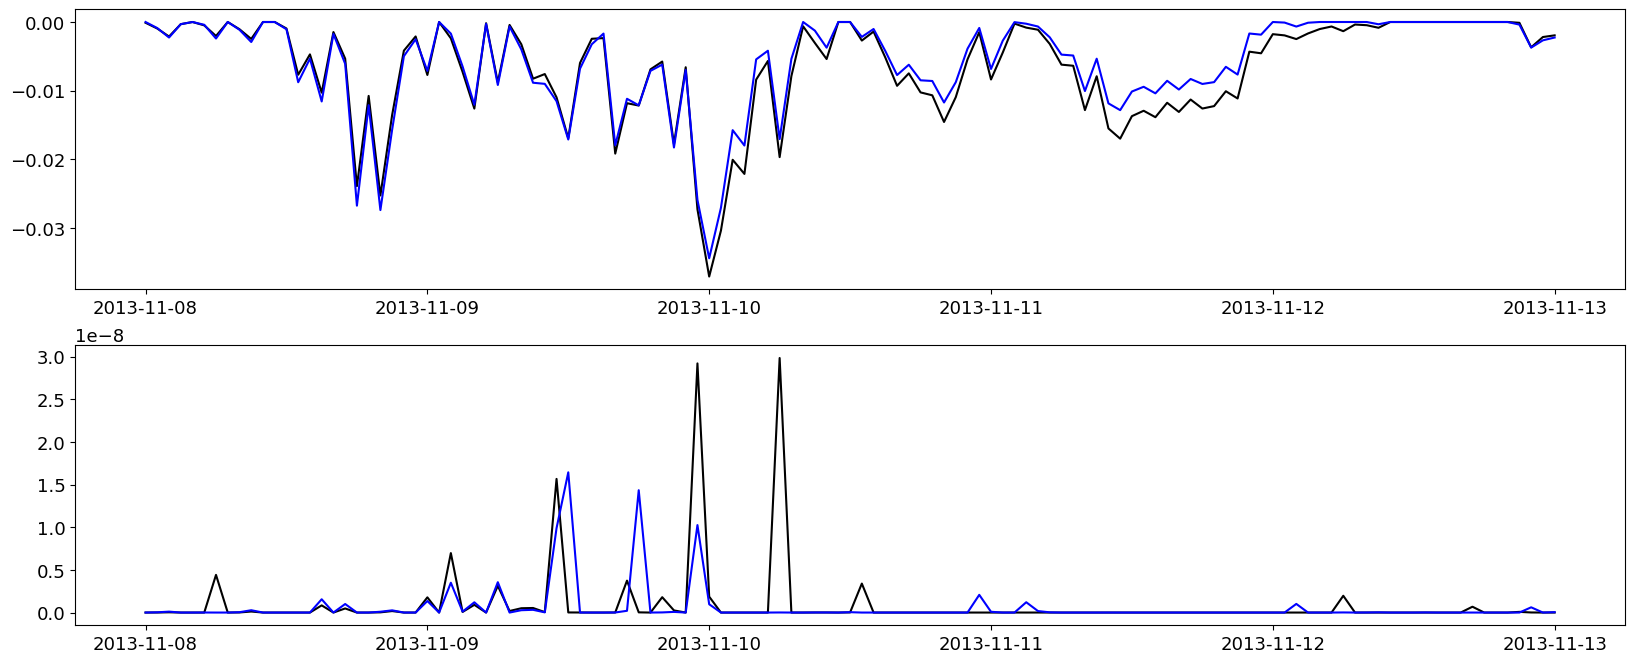

In [34]:
start = pd.to_datetime("2013-11-08")
end = pd.to_datetime("2013-11-13")

cosipy108_plot = cosipy_108[start:end].copy()
cosipyera5_plot = cosipy_sf_tp[start:end].copy()

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(2,1,1)
ax.plot(cosipy108_plot["SUBLIMATION"]*1000, color = "k")
ax.plot(cosipyera5_plot["SUBLIMATION"]*1000, color = "b")

ax = fig.add_subplot(2,1,2)
ax.plot(cosipy108_plot["surfM"], color = "k")
ax.plot(cosipyera5_plot["surfM"], color = "b")

In [235]:
0.2 * 50/917 * 1000

10.905125408942203

In [ ]:
### Sublimation

In [238]:
start = pd.to_datetime("2013-11-10")
end = pd.to_datetime("2013-11-11")

foehn_data[start:end][["3m_T_ahab", "1m_T_ahab", "2m_T_jjmc", "RH_ahab", "2m_RH_jjmc", "pressure_ahab", "pressure_jjmc"]]

,3m_T_ahab,1m_T_ahab,2m_T_jjmc,RH_ahab,2m_RH_jjmc,pressure_ahab,pressure_jjmc
utc_time,,,,,,,
2013-11-10 00:00:00,-9.04,-9.02,-3.106,70.6,54.07,738.0,805.484391
2013-11-10 01:00:00,-9.07,-8.92,-2.685,76.9,57.50,738.0,805.484391
2013-11-10 02:00:00,-9.64,-9.54,-3.096,87.5,64.45,737.0,804.392949
2013-11-10 03:00:00,-10.10,-10.03,-3.960,90.0,66.71,735.0,802.210064
2013-11-10 04:00:00,-9.79,-9.72,-3.479,88.6,64.18,734.0,801.118622
2013-11-10 05:00:00,-8.78,-8.71,-2.989,86.9,66.48,733.0,800.027180
2013-11-10 06:00:00,-9.22,-9.15,-3.366,85.8,64.23,733.0,800.027180
2013-11-10 07:00:00,-9.40,-9.38,-3.569,84.9,62.57,732.0,798.935738
2013-11-10 08:00:00,-10.00,-10.00,-4.092,86.5,66.16,731.0,797.844295


### daily snow height change
Compute the daily snow height change at JJMC station 

In [240]:
#foehn prob
jjmc["prob_jjmc_filter1"] = foehn_data["prob_jjmc_filter1"].copy()

#hourly snow height diff
jjmc["snowheight_diff_hourly"] = jjmc["snow_height"].diff()
jjmc["snowheight_change"] = np.nan

In [280]:
# daily snow height diff: snowheight[-1] of the day - snowheight[0] of the day
daily_diff = jjmc.groupby(jjmc.index.date)["snow_height"].apply(lambda x: x[-1] - x[0])
# Füge die täglichen Differenzen als neue Spalte zum DataFrame hinzu
jjmc['daily_snowheight_change'] = jjmc.index.map(lambda x: daily_diff[x.date()])

#maximum of daily foehn probability:
foehnprob_dailymax = jjmc["prob_jjmc_filter1"].groupby(jjmc.index.date).max()
jjmc["foehnprob_dailymax"] = jjmc.index.map(lambda x: foehnprob_dailymax[x.date()])

#maximum daily wind speed:
foehnprob_dailymax = jjmc["3m Wind (m/s)"].groupby(jjmc.index.date).max()
jjmc["windspeed_dailymax"] = jjmc.index.map(lambda x: foehnprob_dailymax[x.date()])

#daily sum of snowheight change
daily_heightchange_sum = jjmc["snowheight_diff_hourly"].copy().groupby(jjmc.index.date).sum()


In [286]:
jjmc[["daily_snowheight_change", "foehnprob_dailymax", "windspeed_dailymax"]]["2013-11-10"]

C:\Users\leopo\AppData\Local\Temp\ipykernel_6588\882638746.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  jjmc[["daily_snowheight_change", "foehnprob_dailymax", "windspeed_dailymax"]]["2013-11-10"]


,daily_snowheight_change,foehnprob_dailymax,windspeed_dailymax
Datetime,,,
2013-11-10 00:00:00,-0.256,1.0,14.41
2013-11-10 01:00:00,-0.256,1.0,14.41
2013-11-10 02:00:00,-0.256,1.0,14.41
2013-11-10 03:00:00,-0.256,1.0,14.41
2013-11-10 04:00:00,-0.256,1.0,14.41
2013-11-10 05:00:00,-0.256,1.0,14.41
2013-11-10 06:00:00,-0.256,1.0,14.41
2013-11-10 07:00:00,-0.256,1.0,14.41
2013-11-10 08:00:00,-0.256,1.0,14.41


### jjmc daily and jjmc winter

In [435]:
jjmc_winter = jjmc.loc[((jjmc.index.month > 8)&(jjmc.index.month < 13)) | ((jjmc.index.month > 0)&(jjmc.index.month < 5))].copy()
dates_remove = ["2013-03-17", "2013-03-18", "2010-03-31", "2010-04-01", "2009-11-24", "2009-11-25", "2012-12-28", "2012-12-29", "2014-12-23", "2014-12-24", "2013-12-19", "2013-12-20"]
jjmc_winter = jjmc_winter[~jjmc_winter.index.normalize().isin(dates_remove)]
#jjmc_winter = jjmc_winter.drop(index = dates_remove)

In [410]:
jjmc_winter["3m Wind (m/s)"].mean()

3.0207543872862805

In [289]:
len(jjmc)

55871

-1.5975247524752345

In [411]:
#daily means of winter
jjmc_winter_mean = jjmc_winter.groupby(jjmc_winter.index.date).mean().copy()
jjmc_winter_mean.index = pd.to_datetime(jjmc_winter_mean.index)

#jjmc_winter_mean = jjmc_winter_mean.drop(dates_remove)
#snow loss > 5cm
snow_loss = jjmc_winter_mean.loc[jjmc_winter_mean["snowheight_change"] <= -0.05]
snow_gain = jjmc_winter_mean.loc[jjmc_winter_mean["snowheight_change"] >= 0.05]

#average wind speed during these days
print("snow loss mean: ", snow_loss["3m Wind (m/s)"].mean())
print("snow gain mean: ", snow_gain["3m Wind (m/s)"].mean())


snow loss mean:  4.467615384615384
snow gain mean:  3.32321921856978


In [412]:
snow_loss[["snowheight_change", "3m Wind (m/s)",  "windspeed_dailymax", "foehnprob_dailymax"]]

,snowheight_change,3m Wind (m/s),windspeed_dailymax,foehnprob_dailymax
2008-12-10,-0.051000,5.415583,11.630,1.000000
2008-12-15,-0.050000,4.352833,7.890,0.994853
2009-03-06,-0.054000,2.933167,6.974,0.949782
2010-10-19,-0.113000,1.111375,3.503,0.000000
2010-11-04,-0.100000,4.515875,12.370,0.000055
2010-11-26,-0.058000,1.692792,4.719,0.000000
2010-12-22,-0.078000,2.472375,6.054,NaN
2011-01-02,-0.052000,6.353583,10.880,NaN
2011-01-10,-0.144000,5.506708,8.720,NaN
2011-02-25,-0.062000,6.534667,15.090,NaN


In [298]:
snow_gain["snowheight_change"].nlargest(33)

2013-03-17    0.358000
2010-03-31    0.206000
2008-10-03    0.192000
2013-11-14    0.156000
2012-10-18    0.153000
2012-10-08    0.117000
2010-10-20    0.117000
2013-10-29    0.117000
2014-11-19    0.117000
2010-04-13    0.114000
2012-10-27    0.103000
2012-10-31    0.094000
2012-10-30    0.085000
2012-02-01    0.079000
2011-12-07    0.079000
2011-01-09    0.078000
2008-12-09    0.078000
2014-04-30    0.075000
2010-10-05    0.070000
2008-10-12    0.067000
2010-12-14    0.064000
2012-02-04    0.063000
2011-12-10    0.062000
2009-10-21    0.057000
2014-10-04    0.057000
2010-11-18    0.056000
2014-11-01    0.055000
2011-12-03    0.055000
2011-12-08    0.054000
2014-10-06    0.054000
2010-10-01    0.054000
2011-02-13    0.054000
2014-02-07    0.052316
Name: snowheight_change, dtype: float64

### Plot histograms of largest snow height changes

In [413]:
#all
snow_loss50 = snow_loss.copy()
snow_gain50 = snow_gain.copy()
#nonan
snow_loss50_nonan = snow_loss.dropna(subset = ["foehnprob_dailymax"])
snow_gain50_nonan = snow_gain.dropna(subset = ["foehnprob_dailymax"])

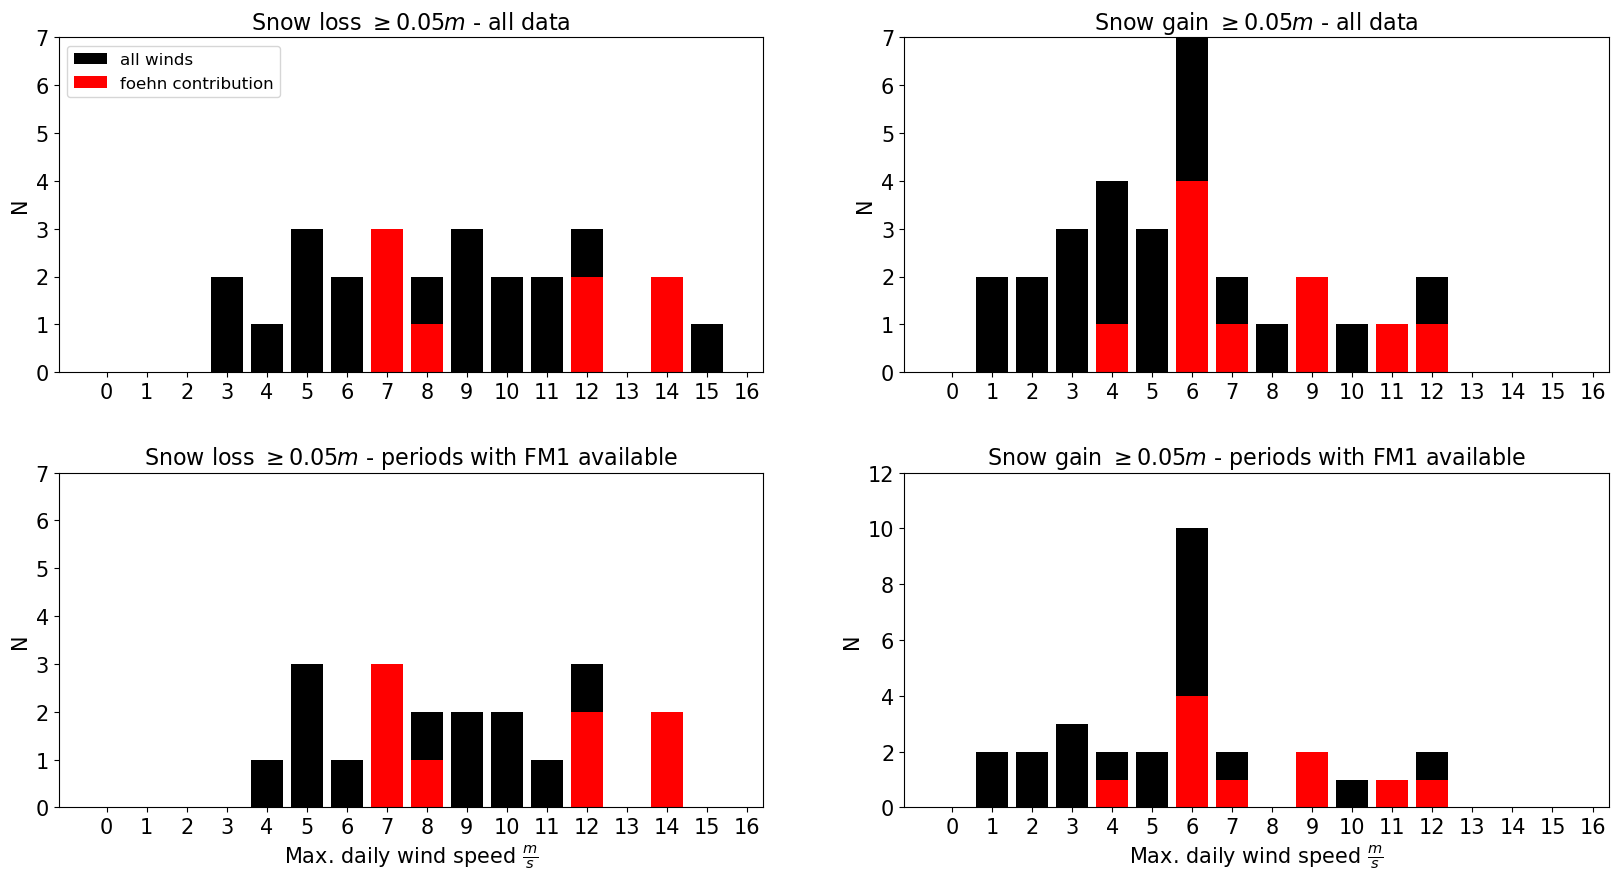

In [414]:
#s_l50, s_l50_nona, s_g50, s_g50_nona = len(snow_loss50["wind_mean"]), len(snow_loss50_nonan["wind_mean"]), len(snow_gain50["wind_mean"]), len(snow_gain50_nonan["wind_mean"])
#total = "total"
#foehn = "foehn"

plt.rcParams['axes.labelsize'] = 15  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 15  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 15  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 16   # fontsize of the subplot titles

fig = plt.figure(figsize=(20,10))
width = 0.8
ax = fig.add_subplot(2,2,1)
ax.hist(snow_loss50["windspeed_dailymax"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid", label = "all winds")
ax.hist(snow_loss50["windspeed_dailymax"].loc[snow_loss50["foehnprob_dailymax"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid", label = "foehn contribution")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N");# ax.set_xlabel(r"Wind speed $\frac{m}{s}$")
ax.set_title(r"Snow loss $\geq 0.05 m$ - all data"); ax.legend(loc = "upper left")
#plt.text(12,6, f"N_{total} = {s_l50}")
#plt.text(12,6, f"N_{total} = {s_l50}")

ax = fig.add_subplot(2,2,2)
ax.hist(snow_gain50["windspeed_dailymax"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_gain50["windspeed_dailymax"].loc[snow_gain50["foehnprob_dailymax"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N"); #ax.set_xlabel(r"Wind speed $\frac{m}{s}$")
ax.set_title(r"Snow gain $\geq 0.05 m$ - all data")

ax = fig.add_subplot(2,2,3)
ax.hist(snow_loss50_nonan["windspeed_dailymax"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_loss50_nonan["windspeed_dailymax"].loc[snow_loss50_nonan["foehnprob_dailymax"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N"); ax.set_xlabel(r"Max. daily wind speed $\frac{m}{s}$")
ax.set_title(r"Snow loss $\geq 0.05 m$ - periods with FM1 available")

ax = fig.add_subplot(2,2,4)
ax.hist(snow_gain50_nonan["windspeed_dailymax"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_gain50_nonan["windspeed_dailymax"].loc[snow_gain50_nonan["foehnprob_dailymax"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,12); ax.set_ylabel("N"); ax.set_xlabel(r"Max. daily wind speed $\frac{m}{s}$")
ax.set_title(r"Snow gain $\geq 0.05 m$ - periods with FM1 available")

plt.subplots_adjust(hspace=0.3)
#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\snowloss_gain_avghist.pdf", bbox_inches='tight')
#plt.close()
plt.show()

In [415]:
for data in [snow_loss50, snow_gain50, snow_loss50_nonan, snow_gain50_nonan]:
    avg = data["windspeed_dailymax"].mean()
    median = np.median(data["windspeed_dailymax"])
    mean_mean = data["3m Wind (m/s)"].mean()
    sd = np.std(data["windspeed_dailymax"])
    foehn_perc = len(data.loc[data["foehnprob_dailymax"] >= 0.5]) / len(data)
    
    print(f"avg = {avg}, median = {median}, mean_mean = {mean_mean}, sd = {sd}, days = {len(data)}, foehn percentage = {foehn_perc}")

avg = 8.434653846153848, median = 8.305, mean_mean = 4.467615384615384, sd = 3.498341705418415, days = 26, foehn percentage = 0.3076923076923077
avg = 5.789823529411765, median = 5.698, mean_mean = 3.32321921856978, sd = 2.7320110829009145, days = 34, foehn percentage = 0.29411764705882354
avg = 8.64675, median = 8.315, mean_mean = 4.6139729166666665, sd = 3.1457649129424787, days = 20, foehn percentage = 0.4
avg = 5.839689655172414, median = 5.837, mean_mean = 3.3876264367816082, sd = 2.87678617502058, days = 29, foehn percentage = 0.3448275862068966


### days with at least one foehn hour and snow height decrease >= 0.5


In [324]:
ind = snow_loss50.index
#ind = snow_loss50_nonan.loc[snow_loss50_nonan["foehnprob_dailymax"] >= 0.5].index

start = []
end = []
for ind in ind:
    start.append(ind - pd.DateOffset(days = 2))
    end.append(ind + pd.DateOffset(days = 2))
    

In [325]:
for start, end in zip(start, end):
    plot_snow_foehn(start, end, cosipy_108, cosipy_sf_tp, jjmc, foehn_data, legend_loc = "right", ending = "png")
    

### Rounded hourly wind speeds and hourly snow height change

In [416]:
jjmc_winter["2014"]["snowheight_diff_hourly"].loc[jjmc_winter["3m Wind (m/s)"] > 6].sum()

C:\Users\leopo\AppData\Local\Temp\ipykernel_6588\1697289074.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  jjmc_winter["2014"]["snowheight_diff_hourly"].loc[jjmc_winter["3m Wind (m/s)"] > 6].sum()


-0.23752475247524574

### Foehn frequency and summed snow height difference during all winters

In [580]:
starty = np.arange(2008, 2015)


foehn_freq_list = []
hourly_snowheightdiff_list = []
data_availability_list = []

for starty in starty:
    endy = starty + 1
    starty, endy = f"{starty}-09", f"{endy}-04"
    if starty == "2014-09":
        endy = "2014-12"
    fm_data = jjmc_winter[starty:endy].dropna(subset = ["prob_jjmc_filter1", "snow_height"]).copy()

    foehn_freq = np.round(len(fm_data.loc[fm_data["prob_jjmc_filter1"] >= 0.5]) / len(fm_data), 3)
    foehn_freq_list.append(foehn_freq)
        
    hourly_snowheightdiff = np.round(fm_data["snowheight_diff_hourly"].loc[(fm_data["prob_jjmc_filter1"] >= 0.5)].sum(), 3)
    hourly_snowheightdiff_list.append(hourly_snowheightdiff)
    
    data_availability = len(fm_data)/len(jjmc_winter[starty:endy])
    data_availability_list.append(data_availability)
    
    print(starty, "-", endy, ", foehn frequency: ", foehn_freq, "hourly snowheight difference: ", hourly_snowheightdiff, "data availability: ", data_availability)

2008-09 - 2009-04 , foehn frequency:  0.07 hourly snowheight difference:  0.078 data availability:  0.9910468319559229
2009-09 - 2010-04 , foehn frequency:  0.051 hourly snowheight difference:  0.095 data availability:  0.4630602240896359
2010-09 - 2011-04 , foehn frequency:  0.02 hourly snowheight difference:  -0.057 data availability:  0.4035812672176309
2011-09 - 2012-04 , foehn frequency:  0.047 hourly snowheight difference:  -0.12 data availability:  0.9070644718792867
2012-09 - 2013-04 , foehn frequency:  0.065 hourly snowheight difference:  -0.002 data availability:  0.6659663865546218
2013-09 - 2014-04 , foehn frequency:  0.081 hourly snowheight difference:  -0.279 data availability:  0.7012152777777778
2014-09 - 2014-12 , foehn frequency:  0.052 hourly snowheight difference:  0.028 data availability:  0.9362813370473537


In [583]:
np.sum(hourly_snowheightdiff_list)

-0.257

#### plot Foehn frequency and summed snow height difference during winters

C:\Users\leopo\AppData\Local\Temp\ipykernel_6588\284653186.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(np.arange(0, 10))


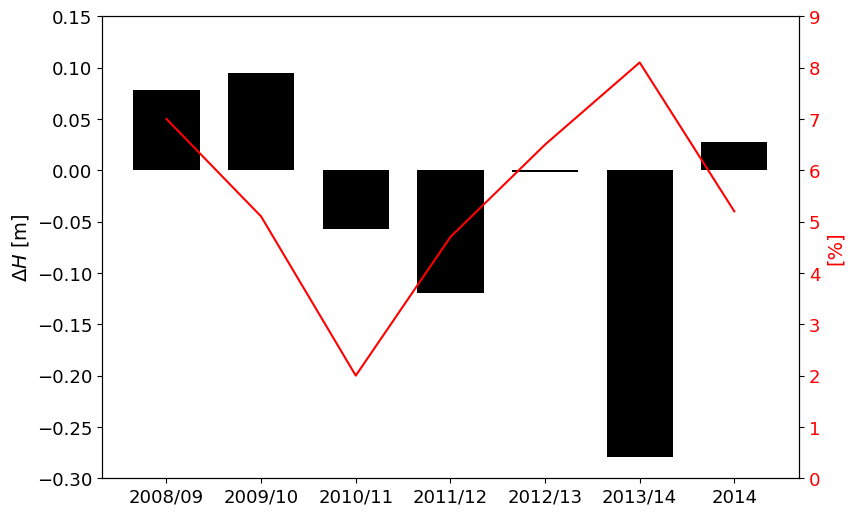

In [581]:
#label and tick font
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 11  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 14   # fontsize of the subplot titles

width=0.1
shift = width/2
xticks=np.arange(0,7)
fig =  plt.figure(figsize = (9, 6))
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()

#barplot of hourly snowheight difference
ax.bar(xticks, hourly_snowheightdiff_list, width = 0.7, color = "k")
ax.set_xticks(xticks)
ax.set_xticklabels(["2008/09", "2009/10", "2010/11", "2011/12", "2012/13", "2013/14", "2014"])
ax.set_ylabel(r"$\Delta H$ [m]")
ax.set_ylim(-0.3, 0.15)

#lineplot of foehn frequency
ax2.plot(xticks, foehn_freq_list, color = "r")
ax2.set_yticklabels(np.arange(0, 10))
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel("[%]", color = "r")
ax2.set_ylim(0.0, 0.09)

#ax.set_title(r"$\Delta H_{snow}$ during Foehn and annual winter Foehn frequency")

#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\annual_snowheightchange.png", bbox_inches='tight')
#plt.close()
plt.show()

### monthly Foehn frequency and snow height difference

In [425]:
jjmc_winter[jjmc_winter.index.month == 1]

,AT 2m,RH 2m,pressure (mb),pressure cos,3m Wind (m/s),3m Wind dir,3m Wind Max (m/s),rain (mm),total_precip_12mean,total_precip_24mean,...,120mean_SWE,distance_to_ice,snow_height,daily_albedo_corr,snowheight_diff_hourly,snowheight_change,prob_jjmc_filter1,daily_snowheight_change,foehnprob_dailymax,windspeed_dailymax
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,-26.87,70.10,802.210064,810.672507,1.084,186.211,0.0,0.0,-0.000000,-0.000000e+00,...,0.000000,1.930,0.303,0.85,-0.014,-0.018,0.0,-0.018,0.0,3.249
2009-01-01 01:00:00,-27.52,68.16,802.210064,810.884733,1.593,179.300,0.0,0.0,-0.000000,1.135951e-02,...,0.000000,1.930,0.301,0.85,-0.002,-0.018,0.0,-0.018,0.0,3.249
2009-01-01 02:00:00,-27.43,68.75,802.210064,810.855277,2.123,180.878,0.0,0.0,-0.000000,-0.000000e+00,...,0.000000,1.930,0.299,0.85,-0.002,-0.018,0.0,-0.018,0.0,3.249
2009-01-01 03:00:00,-28.52,69.49,802.210064,811.213567,2.069,179.800,0.0,0.0,0.004544,-0.000000e+00,...,-0.003145,1.930,0.292,0.85,-0.007,-0.018,0.0,-0.018,0.0,3.249
2009-01-01 04:00:00,-28.30,67.33,801.118622,810.037386,2.612,177.800,0.0,0.0,-0.000000,-0.000000e+00,...,0.000000,1.930,0.298,0.85,0.006,-0.018,0.0,-0.018,0.0,3.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,-8.74,61.67,NaN,NaN,2.311,181.243,0.0,0.0,-0.000000,4.653257e-14,...,-0.000000,3.781,0.346,0.85,0.003,-0.006,NaN,-0.006,NaN,6.101
2014-01-31 20:00:00,-7.41,60.57,NaN,NaN,2.402,191.910,0.0,0.0,0.047635,-0.000000e+00,...,-0.000000,3.781,0.346,0.85,0.000,-0.006,NaN,-0.006,NaN,6.101
2014-01-31 21:00:00,-9.89,65.38,NaN,NaN,4.622,170.500,0.0,0.0,0.105519,4.796300e-03,...,-0.000000,3.781,0.344,0.85,-0.002,-0.006,NaN,-0.006,NaN,6.101


In [602]:
months = [9, 10, 11, 12, 1, 2, 3, 4]


monfoehn_freq_list = []
monhourly_snowheightdiff_list = []
mondata_availability_list = []
n_winds_10 = []

for month in months:
    
    fm_data = jjmc_winter[jjmc_winter.index.month == month].dropna(subset = ["prob_jjmc_filter1", "snow_height"]).copy()

    foehn_freq = np.round(len(fm_data.loc[fm_data["prob_jjmc_filter1"] >= 0.5]) / len(fm_data), 3)
    monfoehn_freq_list.append(foehn_freq)
    
    n_10 = len(fm_data.loc[(fm_data["3m Wind (m/s)"] >= 10) & (fm_data["prob_jjmc_filter1"] >= 0.5)])
    n_winds_10.append(n_10)
        
    hourly_snowheightdiff = np.round(fm_data["snowheight_diff_hourly"].loc[(fm_data["prob_jjmc_filter1"] >= 0.5)].sum(), 4)
    monhourly_snowheightdiff_list.append(hourly_snowheightdiff)
    
    data_availability = len(fm_data)/len(jjmc_winter[jjmc_winter.index.month == month])
    mondata_availability_list.append(data_availability)
    
    mean_wind = jjmc_winter["3m Wind (m/s)"].loc[(jjmc_winter.index.month == month) & (jjmc_winter["prob_jjmc_filter1"] >= 0.5)].mean()
    
    print(month,":", ", foehn frequency: ", foehn_freq, "hourly snowheight difference: ", hourly_snowheightdiff, "N >= 10m/s: ", n_10, "data availability: ", np.round(data_availability, 3), "mean wind ", np.round(mean_wind, 3))

9 : , foehn frequency:  0.053 hourly snowheight difference:  -0.096 N >= 10m/s:  13 data availability:  0.947 mean wind  5.772
10 : , foehn frequency:  0.039 hourly snowheight difference:  -0.173 N >= 10m/s:  5 data availability:  0.935 mean wind  5.502
11 : , foehn frequency:  0.046 hourly snowheight difference:  -0.253 N >= 10m/s:  10 data availability:  0.944 mean wind  5.358
12 : , foehn frequency:  0.079 hourly snowheight difference:  0.0385 N >= 10m/s:  24 data availability:  0.707 mean wind  6.005
1 : , foehn frequency:  0.182 hourly snowheight difference:  0.079 N >= 10m/s:  43 data availability:  0.252 mean wind  7.386
2 : , foehn frequency:  0.089 hourly snowheight difference:  0.056 N >= 10m/s:  7 data availability:  0.345 mean wind  6.194
3 : , foehn frequency:  0.033 hourly snowheight difference:  0.061 N >= 10m/s:  0 data availability:  0.579 mean wind  5.035
4 : , foehn frequency:  0.055 hourly snowheight difference:  0.031 N >= 10m/s:  3 data availability:  0.832 mean w

In [578]:
#label and tick font
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 11  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 14   # fontsize of the subplot titles

width=0.1
shift = width/2
xticks=np.arange(0,8)
fig =  plt.figure(figsize = (9, 6))
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()

#barplot of hourly snowheight difference
ax.bar(xticks, monhourly_snowheightdiff_list, width = 0.7, color = "k")
ax.set_xticks(xticks)
ax.set_xticklabels(["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"])
ax.set_ylabel(r"$\Delta H$ [m]")
ax.set_ylim(-0.3, 0.1)

#lineplot of foehn frequency
ax2.plot(xticks, monfoehn_freq_list, color = "r")

yticks = np.arange(0, 0.21, 0.02)
ax2.set_yticks(yticks)
yticklabel = [int(np.round(ytick * 100)) for ytick in yticks]
ax2.set_yticklabels(yticklabel)
#yticks = ax2.get_yticks()
#yticks *= 100
#ax2.set_yticklabels(yticks)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel("[%]", color = "r")
ax2.set_ylim(0.0, 0.2)

#ax.set_title(r"Monthly $\Delta H_{snow}$ during Foehn and monthly winter Foehn frequency")

plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\monthly_snowheightchange.pdf", bbox_inches='tight')
plt.close()
#plt.show()

### seasonality of strong winds

### Effect of wind speed on snow height and Foehn percentage

In [585]:
speeds = np.arange(0, 11)

snowheight_diffs_speed = []
snowheight_diffs_foehnspeed = []
numbers = []
foehn_perc_list = []

for speed in speeds:
    
    if speed < 10:
        number = len(jjmc_winter.loc[np.round(jjmc_winter["3m Wind (m/s)"]) == speed])
        numbers.append(number)

        snowheight_diff = jjmc_winter["snowheight_diff_hourly"].loc[np.round(jjmc_winter["3m Wind (m/s)"]) == speed].sum()
        snowheight_diffs_speed.append(snowheight_diff)
        
        snowheight_diff_foehn = jjmc_winter["snowheight_diff_hourly"].loc[(np.round(jjmc_winter["3m Wind (m/s)"]) == speed) & (jjmc_winter["prob_jjmc_filter1"] >= 0.5)].sum()
        snowheight_diffs_foehnspeed.append(snowheight_diff_foehn)
        
        foehn_perc = len(jjmc_winter.loc[(np.round(jjmc_winter["3m Wind (m/s)"]) == speed) & (jjmc_winter["prob_jjmc_filter1"] >= 0.5)]) / len(jjmc_winter.loc[np.round(jjmc_winter["3m Wind (m/s)"]) == speed])
        foehn_perc_list.append(foehn_perc)                 
        
        print(f"speed: {speed} m/s, snowheight difference: {np.round(snowheight_diff, 3)} m, N: {number}, snowheight difference foehn: {np.round(snowheight_diff_foehn, 3)} m, foehn proportion: {np.round(foehn_perc, 3)}")
    else:
        number = len(jjmc_winter.loc[np.round(jjmc_winter["3m Wind (m/s)"]) >= speed])
        numbers.append(number)

        snowheight_diff = jjmc_winter["snowheight_diff_hourly"].loc[np.round(jjmc_winter["3m Wind (m/s)"]) >= speed].sum()
        snowheight_diffs_speed.append(snowheight_diff)
        
        snowheight_diff_foehn = jjmc_winter["snowheight_diff_hourly"].loc[(np.round(jjmc_winter["3m Wind (m/s)"]) >= speed) & (jjmc_winter["prob_jjmc_filter1"] >= 0.5)].sum()
        snowheight_diffs_foehnspeed.append(snowheight_diff_foehn)
        
        foehn_perc = len(jjmc_winter.loc[(np.round(jjmc_winter["3m Wind (m/s)"]) >= speed) & (jjmc_winter["prob_jjmc_filter1"] >= 0.5)]) / len(jjmc_winter.loc[np.round(jjmc_winter["3m Wind (m/s)"]) >= speed])
        foehn_perc_list.append(foehn_perc)   
        print(f"speed: >={speed} m/s, snowheight difference: {np.round(snowheight_diff, 3)} m, N: {number}, snowheight difference foehn: {np.round(snowheight_diff_foehn, 3)} m, foehn proportion: {np.round(foehn_perc, 3)}")
    
   

speed: 0 m/s, snowheight difference: 0.147 m, N: 1211, snowheight difference foehn: 0.0 m, foehn proportion: 0.0
speed: 1 m/s, snowheight difference: 0.744 m, N: 5508, snowheight difference foehn: -0.01 m, foehn proportion: 0.0
speed: 2 m/s, snowheight difference: 1.152 m, N: 7133, snowheight difference foehn: 0.06 m, foehn proportion: 0.007
speed: 3 m/s, snowheight difference: 0.137 m, N: 6943, snowheight difference foehn: 0.235 m, foehn proportion: 0.022
speed: 4 m/s, snowheight difference: 0.115 m, N: 5416, snowheight difference foehn: 0.013 m, foehn proportion: 0.045
speed: 5 m/s, snowheight difference: 0.103 m, N: 2988, snowheight difference foehn: 0.171 m, foehn proportion: 0.109
speed: 6 m/s, snowheight difference: 0.18 m, N: 1074, snowheight difference foehn: 0.079 m, foehn proportion: 0.256
speed: 7 m/s, snowheight difference: -0.279 m, N: 528, snowheight difference foehn: 0.054 m, foehn proportion: 0.369
speed: 8 m/s, snowheight difference: -0.273 m, N: 286, snowheight differ

In [596]:
#label and tick font
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 11  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 14   # fontsize of the subplot titles

width=0.7
xticks=np.arange(0,11)

fig =  plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 1, hspace=0)  # 6 Zeilen: Verhältnis 5:1 (ax:ax2)

# Erstes axes-Objekt (ax) nimmt 5 Zeilen ein
ax = fig.add_subplot(gs[:3, 0])

#barplot of hourly snowheight difference
ax.bar(xticks, snowheight_diffs_speed, width = -0.5*width, align="edge", color = "k")
ax.bar(xticks, snowheight_diffs_foehnspeed, width = 0.5*width, align="edge", color = "r")
ax.axhline(0, linestyle = "solid", color  ="k")
ax.set_xticks(xticks)
ax.set_xticklabels([])
ax.set_ylabel(r"$\Delta H$ [m]")
ax.set_xlim(-0.5, 10.5)

ax2 = fig.add_subplot(gs[3, 0])
ax2.plot(xticks, foehn_perc_list, color = "r", marker="o")
ax2.set_xticks(xticks)
ax2.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", r"$\geq 10$"]); ax2.set_xlabel("Wind Speed [m/s]")
ax2.set_ylim(0, 0.85)
ax2.set_yticks(np.arange(0, 0.81, 0.2))
ax2.set_ylabel("Foehn [%]", color= "r")
ax2.set_yticklabels(["0", "20", "40", "60", "80"], color = "r")
ax2.set_xlim(ax.get_xlim())

ax3 = ax2.twinx()
ax3.plot(xticks, numbers, color = "blue", marker = "*")
ax3.set_ylabel(r"N * 10^3", color = "b")
ax3.set_ylim(0, 8500)
ax3.set_yticks(np.arange(0, 8001, 2000))
ax3.set_yticklabels(["0", "2", "4", "6", "8"], color = "b")

plt.tight_layout()

plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\windspeed_snowheightchange.pdf", bbox_inches='tight')
plt.close()
#plt.show()

### Effect of Foehn wind speed on snow height 

In [557]:
speeds = np.arange(0, 11)

snowheight_diffs_foehnspeed = []
numbers_foehn = []
ffoehn_perc_list = []

jjmc_winter_foehn = jjmc_winter.loc[jjmc_winter["prob_jjmc_filter1"] >= 0.5]

for speed in speeds:
    
    if speed < 10:
        
        if len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed]) == 0:
            number = len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed])
            numbers_foehn.append(number)

            snowheight_diff = 0
            snowheight_diffs_foehnspeed.append(snowheight_diff)

            foehn_perc = 0
            ffoehn_perc_list.append(foehn_perc)                 

            print(f"speed: {speed} m/s, snowheight difference: {np.round(snowheight_diff, 3)} m, N: {number}, foehn proportion: {foehn_perc}")
            
        else:
            number = len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed])
            numbers_foehn.append(number)

            snowheight_diff = jjmc_winter_foehn["snowheight_diff_hourly"].loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed].sum()
            snowheight_diffs_foehnspeed.append(snowheight_diff)

            foehn_perc = len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed]) / len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) == speed])
            ffoehn_perc_list.append(foehn_perc)                 

            print(f"speed: {speed} m/s, snowheight difference: {np.round(snowheight_diff, 3)} m, N: {number}, foehn proportion: {foehn_perc}")
    else:
        number = len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) >= speed])
        numbers_foehn.append(number)

        snowheight_diff = jjmc_winter_foehn["snowheight_diff_hourly"].loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) >= speed].sum()
        snowheight_diffs_foehnspeed.append(snowheight_diff)
        
        foehn_perc = len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) >= speed]) / len(jjmc_winter_foehn.loc[np.round(jjmc_winter_foehn["3m Wind (m/s)"]) >= speed])
        ffoehn_perc_list.append(foehn_perc)   
        print(f"speed: >={speed} m/s, snowheight difference: {np.round(snowheight_diff, 3)} m, N: {number}, foehn proportion: {foehn_perc}")
    
   

speed: 0 m/s, snowheight difference: 0 m, N: 0, foehn proportion: 0
speed: 1 m/s, snowheight difference: -0.01 m, N: 2, foehn proportion: 1.0
speed: 2 m/s, snowheight difference: 0.06 m, N: 51, foehn proportion: 1.0
speed: 3 m/s, snowheight difference: 0.235 m, N: 150, foehn proportion: 1.0
speed: 4 m/s, snowheight difference: 0.013 m, N: 242, foehn proportion: 1.0
speed: 5 m/s, snowheight difference: 0.171 m, N: 326, foehn proportion: 1.0
speed: 6 m/s, snowheight difference: 0.079 m, N: 275, foehn proportion: 1.0
speed: 7 m/s, snowheight difference: 0.054 m, N: 195, foehn proportion: 1.0
speed: 8 m/s, snowheight difference: -0.083 m, N: 125, foehn proportion: 1.0
speed: 9 m/s, snowheight difference: -0.119 m, N: 64, foehn proportion: 1.0
speed: >=10 m/s, snowheight difference: -0.657 m, N: 119, foehn proportion: 1.0


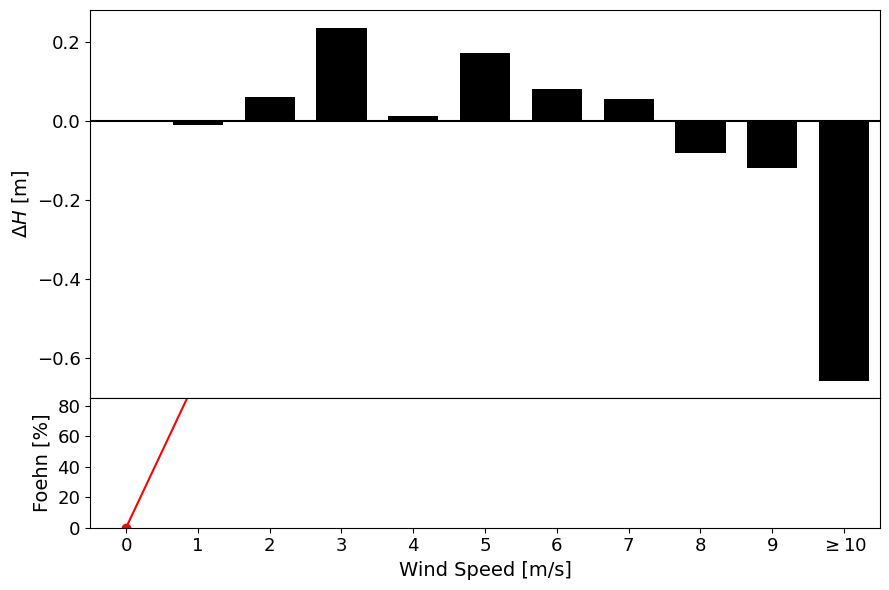

In [558]:
#label and tick font
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 13  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 11  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 14   # fontsize of the subplot titles

width=0.7
xticks=np.arange(0,11)

fig =  plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 1, hspace=0)  # 6 Zeilen: Verhältnis 5:1 (ax:ax2)

# Erstes axes-Objekt (ax) nimmt 5 Zeilen ein
ax = fig.add_subplot(gs[:3, 0])

#barplot of hourly snowheight difference
ax.bar(xticks, snowheight_diffs_foehnspeed, width = width, align="center", color = "k")
ax.axhline(0, linestyle = "solid", color  ="k")
ax.set_xticks(xticks)
ax.set_xticklabels([])
ax.set_ylabel(r"$\Delta H$ [m]")
ax.set_xlim(-0.5, 10.5)

ax2 = fig.add_subplot(gs[3, 0])
ax2.plot(xticks, ffoehn_perc_list, color = "r", marker="o")
ax2.set_xticks(xticks)
ax2.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", r"$\geq 10$"]); ax2.set_xlabel("Wind Speed [m/s]")
ax2.set_ylim(0, 0.85)
ax2.set_yticks(np.arange(0, 0.81, 0.2))
ax2.set_ylabel("Foehn [%]")
ax2.set_yticklabels(["0", "20", "40", "60", "80"])
ax2.set_xlim(ax.get_xlim())
plt.tight_layout()

#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\windspeed_snowheightchange.pdf", bbox_inches='tight')
#plt.close()
plt.show()

In [70]:
jjmc_daily = pd.DataFrame(daily_diff)
jjmc_daily.rename(columns={"snow_height":"snowheight_diff"}, inplace = True)
jjmc_daily["foehn_daily"] = foehn_data["prob_jjmc_filter1"].groupby(jjmc.index.date).max()
jjmc_daily["wind_max"] = foehn_data["3m_Windspeed_jjmc"].groupby(jjmc.index.date).max()
jjmc_daily["wind_mean"] = foehn_data["3m_Windspeed_jjmc"].groupby(jjmc.index.date).mean()
jjmc_daily["daily_heightchange_sum"] = daily_heightchange_sum.values

In [71]:
#jjmc_daily = pd.DataFrame(daily_diff)
jjmc_daily.index = pd.to_datetime(jjmc_daily.index)

In [72]:
jjmc_daily_winter = jjmc_daily.loc[((jjmc_daily.index.month > 9)&(jjmc_daily.index.month < 13)) | ((jjmc_daily.index.month > 0)&(jjmc_daily.index.month < 5))].copy()
jjmc_daily_winter_nonan = jjmc_daily_winter.dropna().copy()
#plt.scatter(jjmc_daily_winter["foehn_daily"], jjmc_daily_winter["snowheight_diff"])

In [73]:
jjmc_daily_winter["wind_mean"].mean()

3.008911480087192

### snowheight difference and wind/foehn
only use data from jjmc_daily, where none of snowheight_diff, foehn_daily and wind_max are NaN
Make following investigations: 
- Largest 20 or 50? snow loss events and snow gain events and look at distributions of wind speeds + compute means and standard deviation of wind speeds 
- Largest 20 wind speed events and look at snow height difference?

### IMPORTANT!!!!
Remove "artifical"snow height changes which are due to start/end dates of the data. These are:
- 18.03.2013
- 01.04.2010
- 25.11.2009
- 29.12.2012
- 24.12.2014
- 2013-12-19
- 2013-12-20

In [74]:
jjmc[["snow_height", "3m Wind (m/s)", "prob_jjmc_filter1"]]["2013-12-19":"2013-12-20"]

KeyError: "['prob_jjmc_filter1'] not in index"

In [75]:
#remove 24.12.2014 -> no data
#jjmc_daily_winter = jjmc_daily_winter[:"2014-12-23"]
#jjmc_daily_winter_nonan = jjmc_daily_winter_nonan[:"2014-12-23"]

#remove dates with wrong snow height change due to data start/stop
dates_remove = ["2013-03-18", "2010-04-01", "2009-11-25", "2012-12-29", "2014-12-24", "2013-12-19", "2013-12-20"]
jjmc_daily_winter = jjmc_daily_winter.drop(dates_remove)
jjmc_daily_winter_nonan = jjmc_daily_winter_nonan.drop(dates_remove)

In [76]:
jjmc_daily_winter["daily_heightchange_sum"].nlargest(10)

2014-11-20    0.198
2013-11-14    0.189
2010-11-18    0.140
2008-10-03    0.131
2012-10-31    0.122
2011-01-06    0.121
2011-01-09    0.119
2012-02-02    0.112
2010-10-06    0.109
2012-10-18    0.093
Name: daily_heightchange_sum, dtype: float64

In [203]:
jjmc_daily_winter["daily_heightchange_sum"].nsmallest(26)

2013-11-10   -0.275
2011-01-10   -0.173
2012-11-13   -0.111
2013-04-24   -0.110
2010-11-04   -0.109
2011-11-02   -0.089
2011-01-07   -0.086
2012-01-14   -0.082
2014-11-22   -0.078
2014-02-17   -0.073
2011-12-27   -0.068
2009-01-25   -0.066
2011-02-25   -0.065
2012-01-07   -0.063
2010-12-22   -0.063
2010-10-19   -0.062
2011-01-15   -0.060
2012-01-03   -0.059
2012-10-10   -0.056
2011-03-31   -0.055
2010-10-08   -0.054
2009-10-09   -0.053
2011-04-19   -0.052
2008-10-05   -0.051
2011-12-06   -0.051
2011-02-06   -0.050
Name: daily_heightchange_sum, dtype: float64

In [204]:
jjmc_daily_winter["snowheight_diff"].nsmallest(26)

2013-11-10   -0.275
2011-01-10   -0.132
2012-11-13   -0.118
2010-11-04   -0.114
2013-04-24   -0.109
2014-02-17   -0.082
2011-11-02   -0.077
2011-12-27   -0.074
2012-01-07   -0.069
2010-10-19   -0.069
2009-01-25   -0.068
2014-11-22   -0.068
2011-01-07   -0.066
2012-01-05   -0.062
2011-02-25   -0.061
2011-04-19   -0.060
2012-01-03   -0.059
2012-10-10   -0.055
2010-12-22   -0.055
2010-10-08   -0.054
2009-10-09   -0.053
2011-03-31   -0.053
2011-01-20   -0.051
2009-10-12   -0.048
2012-01-14   -0.047
2014-11-21   -0.046
Name: snowheight_diff, dtype: float64

In [111]:
jjmc_daily_winter["snowheight_diff"].nlargest(50)

2014-11-20    0.2010
2013-12-19    0.1800
2013-11-14    0.1780
2010-11-18    0.1400
2008-10-03    0.1340
2011-01-09    0.1170
2011-01-06    0.1130
2012-10-31    0.1110
2012-02-02    0.1070
2012-10-28    0.0960
2012-10-18    0.0940
2014-02-10    0.0810
2012-10-16    0.0770
2010-10-06    0.0750
2014-10-06    0.0710
2012-01-02    0.0690
2014-02-07    0.0680
2014-12-17    0.0655
2008-10-04    0.0650
2010-11-21    0.0640
2010-10-26    0.0600
2014-11-02    0.0600
2012-10-30    0.0590
2011-01-12    0.0580
2014-04-30    0.0580
2009-10-06    0.0580
2012-10-09    0.0560
2014-10-04    0.0550
2013-10-29    0.0520
2012-03-28    0.0500
2012-01-04    0.0490
2011-03-29    0.0490
2013-11-13    0.0490
2011-12-07    0.0490
2012-04-05    0.0490
2014-02-22    0.0480
2012-10-05    0.0470
2013-12-02    0.0470
2014-02-03    0.0470
2010-11-30    0.0460
2009-02-25    0.0460
2008-10-12    0.0460
2010-12-21    0.0460
2011-02-23    0.0460
2012-01-06    0.0460
2010-12-06    0.0450
2008-10-13    0.0440
2009-11-11   

In [78]:
#all
snow_loss50 = jjmc_daily_winter.loc[jjmc_daily_winter["daily_heightchange_sum"] <= -0.05]
snow_gain50 = jjmc_daily_winter.loc[jjmc_daily_winter["daily_heightchange_sum"] >= 0.05]
#nonan
snow_loss50_nonan = jjmc_daily_winter_nonan.loc[jjmc_daily_winter_nonan["daily_heightchange_sum"] <= -0.05]
snow_gain50_nonan = jjmc_daily_winter_nonan.loc[jjmc_daily_winter_nonan["daily_heightchange_sum"] >= 0.05]

In [79]:
len(snow_gain50)

34

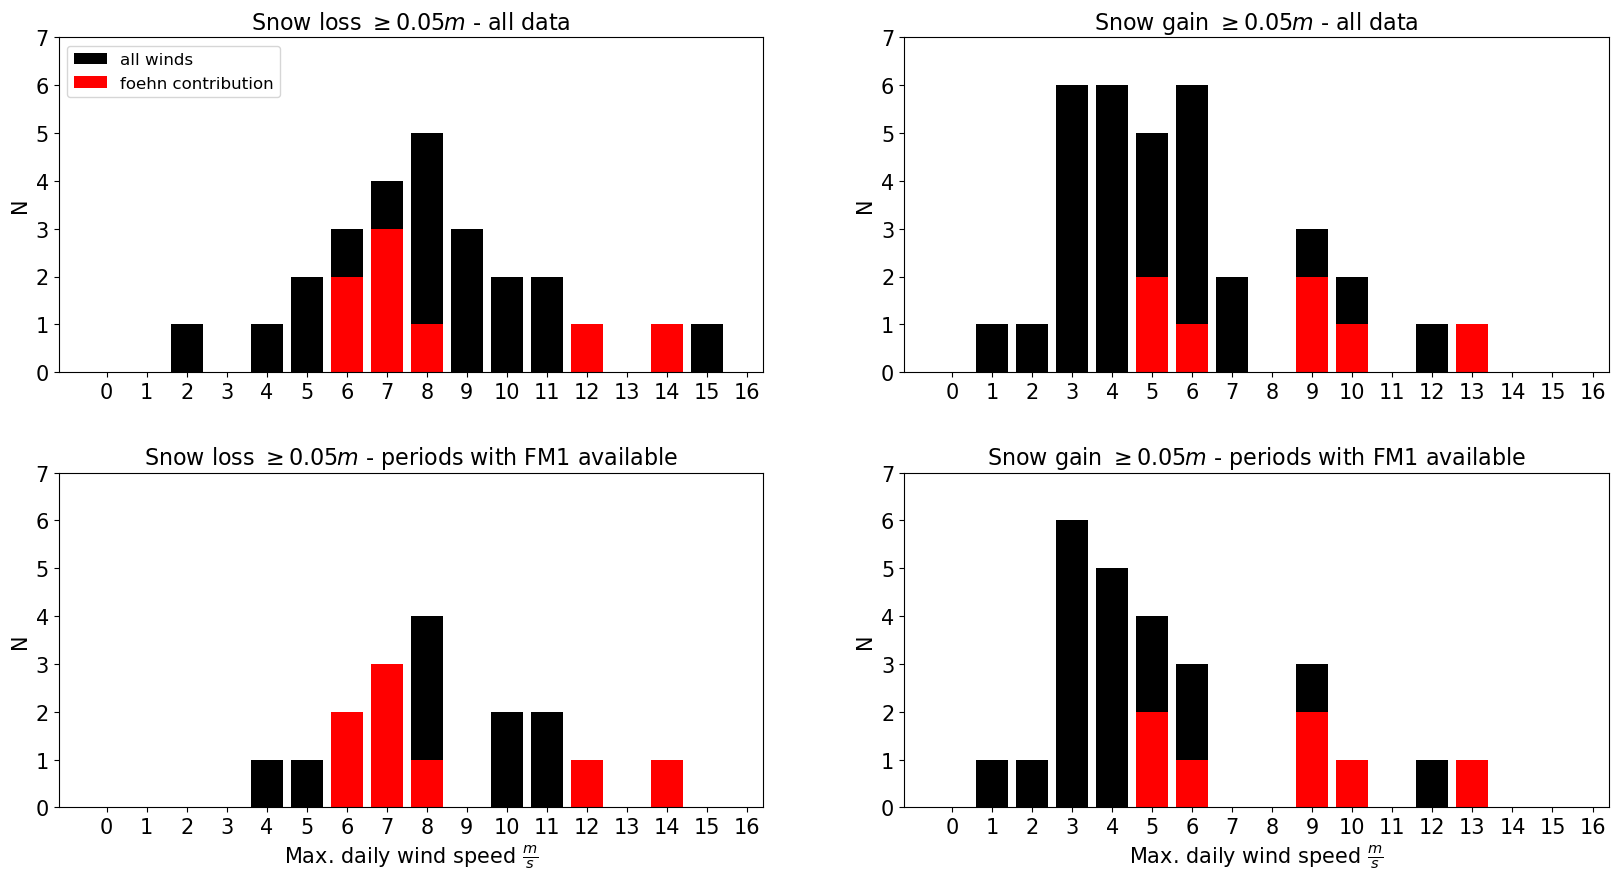

In [193]:
s_l50, s_l50_nona, s_g50, s_g50_nona = len(snow_loss50["wind_mean"]), len(snow_loss50_nonan["wind_mean"]), len(snow_gain50["wind_mean"]), len(snow_gain50_nonan["wind_mean"])
total = "total"
foehn = "foehn"

plt.rcParams['axes.labelsize'] = 15  # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 15  # fontsize of the x ticks
plt.rcParams['ytick.labelsize'] = 15  # fontsize of the y ticks
plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
plt.rcParams['axes.titlesize'] = 16   # fontsize of the subplot titles

fig = plt.figure(figsize=(20,10))
width = 0.8
ax = fig.add_subplot(2,2,1)
ax.hist(snow_loss50["wind_max"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid", label = "all winds")
ax.hist(snow_loss50["wind_max"].loc[snow_loss50["foehn_daily"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid", label = "foehn contribution")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N");# ax.set_xlabel(r"Wind speed $\frac{m}{s}$")
ax.set_title(r"Snow loss $\geq 0.05 m$ - all data"); ax.legend(loc = "upper left")
#plt.text(12,6, f"N_{total} = {s_l50}")
#plt.text(12,6, f"N_{total} = {s_l50}")

ax = fig.add_subplot(2,2,2)
ax.hist(snow_gain50["wind_max"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_gain50["wind_max"].loc[snow_gain50["foehn_daily"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N"); #ax.set_xlabel(r"Wind speed $\frac{m}{s}$")
ax.set_title(r"Snow gain $\geq 0.05 m$ - all data")

ax = fig.add_subplot(2,2,3)
ax.hist(snow_loss50_nonan["wind_max"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_loss50_nonan["wind_max"].loc[snow_loss50_nonan["foehn_daily"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N"); ax.set_xlabel(r"Max. daily wind speed $\frac{m}{s}$")
ax.set_title(r"Snow loss $\geq 0.05 m$ - periods with FM1 available")

ax = fig.add_subplot(2,2,4)
ax.hist(snow_gain50_nonan["wind_max"].round(), bins = np.arange(0,17,1), color = "k", width = width, align = "mid")
ax.hist(snow_gain50_nonan["wind_max"].loc[snow_gain50_nonan["foehn_daily"] >= 0.5].round(), bins = np.arange(0,17,1), color = "r", width = width, align = "mid")
ax.set_xticks(np.arange(0,17,1)+0.5*width); ax.set_xticklabels(np.arange(0,17))
ax.set_ylim(0,7); ax.set_ylabel("N"); ax.set_xlabel(r"Max. daily wind speed $\frac{m}{s}$")
ax.set_title(r"Snow gain $\geq 0.05 m$ - periods with FM1 available")

plt.subplots_adjust(hspace=0.3)
#plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\snowloss_gain_avghist.pdf", bbox_inches='tight')
#plt.close()
plt.show()

In [194]:
snow_loss50_nonan

,snowheight_diff,foehn_daily,wind_max,wind_mean,daily_heightchange_sum
2008-10-05,-0.044,0.980979,6.743,3.149875,-0.051
2009-01-25,-0.068,0.994776,7.200,2.387292,-0.066
2009-10-09,-0.053,0.999196,8.060,6.099417,-0.053
2010-10-08,-0.054,0.000000,4.324,1.726208,-0.054
2010-10-19,-0.069,0.000000,7.540,1.674875,-0.062
2010-11-04,-0.114,0.998164,12.370,5.268500,-0.109
2011-11-02,-0.077,0.294745,10.640,6.502083,-0.089
2011-12-06,-0.043,0.000000,7.620,3.091625,-0.051
2011-12-27,-0.074,0.000000,9.860,5.093167,-0.068
2012-01-03,-0.059,0.934093,5.596,2.384417,-0.059


In [81]:
for data in [snow_loss50, snow_gain50, snow_loss50_nonan, snow_gain50_nonan]:
    avg = data["wind_max"].mean()
    median = np.median(data["wind_max"])
    mean_mean = data["wind_mean"].mean()
    sd = np.std(data["wind_max"])
    foehn_perc = len(data.loc[data["foehn_daily"] >= 0.5]) / len(data)
    
    print(f"avg = {avg}, median = {median}, mean_mean = {mean_mean}, sd = {sd}, days = {len(data)}, foehn percentage = {foehn_perc}")

avg = 8.117269230769232, median = 7.84, mean_mean = 4.114620192307692, sd = 2.9366603291925433, days = 26, foehn percentage = 0.3076923076923077
avg = 5.718117647058824, median = 5.233499999999999, mean_mean = 3.0960121107266434, sd = 2.779495751609992, days = 34, foehn percentage = 0.20588235294117646
avg = 8.291235294117648, median = 7.62, mean_mean = 4.189338235294118, sd = 2.6798265643927244, days = 17, foehn percentage = 0.47058823529411764
avg = 5.4879999999999995, median = 4.587, mean_mean = 2.787554298642534, sd = 2.9975613421579883, days = 26, foehn percentage = 0.2692307692307692


### seasonality of Foehn influence on snowcover during winter?
preferred month for snow gain or loss?

- not enough data for real climatological analyses but still can try if there is something visible in monthly number of the events

In [191]:
monthly_loss = []
monthly_gain = []
for month in [10, 11, 12, 1, 2, 3, 4]:
    print("snow loss, ", month, ": ", len(snow_loss50[snow_loss50.index.month == month]))
    monthly_loss.append(len(snow_loss50[snow_loss50.index.month == month]))
    print("snow gain, ", month, ": ", len(snow_gain50[snow_gain50.index.month == month]))
    monthly_gain.append(len(snow_gain50[snow_gain50.index.month == month]))

snow loss,  10 :  5
snow gain,  10 :  15
snow loss,  11 :  5
snow gain,  11 :  6
snow loss,  12 :  3
snow gain,  12 :  2
snow loss,  1 :  7
snow gain,  1 :  4
snow loss,  2 :  3
snow gain,  2 :  5
snow loss,  3 :  1
snow gain,  3 :  0
snow loss,  4 :  2
snow gain,  4 :  2


In [193]:
monthly_loss
#monthly_gain

[5, 5, 3, 7, 3, 1, 2]

In [601]:
#mean snowheight change in foehn hour
jjmc_winter = jjmc.loc[((jjmc.index.month > 9)&(jjmc.index.month < 13)) | ((jjmc.index.month > 0)&(jjmc.index.month < 5))]
jjmc_winter = jjmc_winter.loc[(jjmc_winter["prob_jjmc_filter1"].notnull()) & (jjmc_winter["snow_height"].notnull())]
jjmc_winter_foehn = jjmc_winter.loc[jjmc_winter["prob_jjmc_filter1"] >= 0.5]

In [391]:
for year in np.arange(2008, 2015):
    print(year, ", annual mean: ", jjmc_winter_foehn[f"{year}"].loc[jjmc["3m Wind (m/s)"] > 9]["snowheight_diff_hourly"].mean())
    print(year, ", annual sum: ", jjmc_winter_foehn[f"{year}"].loc[jjmc["3m Wind (m/s)"] > 9]["snowheight_diff_hourly"].sum())


2008 , annual mean:  -0.00617647058823528
2008 , annual sum:  -0.10499999999999976
2009 , annual mean:  -0.0011694915254237242
2009 , annual sum:  -0.06899999999999973
2010 , annual mean:  nan
2010 , annual sum:  0.0
2011 , annual mean:  -0.00760000000000014
2011 , annual sum:  -0.0760000000000014
2012 , annual mean:  -0.0045000000000001705
2012 , annual sum:  -0.06300000000000239
2013 , annual mean:  -0.022714285714285735
2013 , annual sum:  -0.3180000000000003
2014 , annual mean:  -0.0005714285714285719
2014 , annual sum:  -0.0040000000000000036


C:\Users\leopo\AppData\Local\Temp\ipykernel_15408\242474642.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(year, ", annual mean: ", jjmc_winter_foehn[f"{year}"].loc[jjmc["3m Wind (m/s)"] > 9]["snowheight_diff_hourly"].mean())
C:\Users\leopo\AppData\Local\Temp\ipykernel_15408\242474642.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(year, ", annual sum: ", jjmc_winter_foehn[f"{year}"].loc[jjmc["3m Wind (m/s)"] > 9]["snowheight_diff_hourly"].sum())


In [618]:
starts = ["2008-10-01", "2009-10-01", "2010-10-01", "2011-10-01", "2012-10-01", "2013-10-01", "2014-10-01"]
ends = ["2009-03-31", "2010-03-31", "2011-03-31", "2012-03-31", "2013-03-31", "2014-03-31", "2015-03-31"]

foehn_highwind_sums = []
foehn_sums = []
no_foehn_sums = []
high_wind_sums = []
low_wind_sums = []
low_foehn_sums = []
for start, end in zip(starts, ends):
    foehn_highwind_sums.append(jjmc_winter["snowheight_diff_hourly"][start:end].loc[(jjmc["prob_jjmc_filter1"] >= 0.5) & (jjmc["3m Wind (m/s)"] >= 5)].sum())
    foehn_sums.append(jjmc_winter["snowheight_diff_hourly"][start:end].loc[(jjmc["prob_jjmc_filter1"] >= 0.5)].sum())
    no_foehn_sums.append(jjmc_winter["snowheight_diff_hourly"][start:end].loc[(jjmc["prob_jjmc_filter1"] < 0.5)].sum())
    high_wind_sums.append(jjmc_winter[start:end]["snowheight_diff_hourly"].loc[(jjmc["3m Wind (m/s)"] >= 5)&(jjmc["prob_jjmc_filter1"] >= 0)].sum())
    low_wind_sums.append(jjmc_winter[start:end]["snowheight_diff_hourly"].loc[(jjmc["3m Wind (m/s)"] < 5)&(jjmc["prob_jjmc_filter1"] >= 0)].sum())
    low_foehn_sums.append(jjmc_winter[start:end]["snowheight_diff_hourly"].loc[(jjmc["prob_jjmc_filter1"] >= 0.5) & (jjmc["3m Wind (m/s)"] < 5)].sum())
    #print(start, ", annual mean: ", jjmc_winter[start:end].loc[(jjmc["prob_jjmc_filter1"] >= 0.5) & (jjmc["3m Wind (m/s)"] >= 5)]["snowheight_diff_hourly"].sum())
    #print(start, ", annual sum: ", jjmc_winter[start:end].loc[(jjmc["prob_jjmc_filter1"] >= 0.5) & (jjmc["3m Wind (m/s)"].round() >= 5)]["snowheight_diff_hourly"].sum())
    #jjmc["3m Wind (m/s)"].round() >= 5

In [603]:
print(high_wind_sums[0])
print(low_wind_sums[0])
print(high_wind_sums[0] + low_wind_sums[0])
print(jjmc_winter["2008-10-01":"2009-04-30"]["snowheight_diff_hourly"].sum())

0.08299999999999907
0.1150000000000011
0.19800000000000018
0.19800000000000018


In [604]:
print(len(jjmc_winter["2008-10-01":"2009-04-30"]))
print(len(jjmc_winter["2008-10-01":"2009-04-30"].loc[(jjmc["3m Wind (m/s)"] >= 0)&(jjmc["prob_jjmc_filter1"] >= 0)]))
print(len(jjmc_winter["2008-10-01":"2009-04-30"].loc[jjmc["3m Wind (m/s)"].isnull()]))

5045
5045
0


In [610]:
starts = ["2008-10-01", "2009-10-01", "2010-10-01", "2011-10-01", "2012-10-01", "2013-10-01", "2014-10-01"]
ends = ["2009-04-30", "2010-04-30", "2011-04-30", "2012-04-30", "2013-04-30", "2014-04-30", "2015-04-30"]


for start, end in zip(starts, ends):
    print(start, ": ", len(jjmc_winter[start:end]))
    print(start, ": ", len(jjmc_winter[start:end].loc[jjmc_winter[start:end]["prob_jjmc_filter1"] >= 0.5]))
    print(start, ": ", len(jjmc_winter[start:end].loc[jjmc_winter[start:end]["3m Wind (m/s)"] >= 5]))
    print(start, ": ", len(jjmc_winter[start:end].loc[jjmc_winter[start:end]["prob_jjmc_filter1"].isnull()]))

2008-10-01 :  5045
2008-10-01 :  380
2008-10-01 :  478
2008-10-01 :  0
2009-10-01 :  2067
2009-10-01 :  114
2009-10-01 :  157
2009-10-01 :  0
2010-10-01 :  1679
2010-10-01 :  35
2010-10-01 :  127
2010-10-01 :  0
2011-10-01 :  4626
2011-10-01 :  228
2011-10-01 :  343
2011-10-01 :  0
2012-10-01 :  3217
2012-10-01 :  117
2012-10-01 :  412
2012-10-01 :  0
2013-10-01 :  3384
2013-10-01 :  288
2013-10-01 :  540
2013-10-01 :  0
2014-10-01 :  2012
2014-10-01 :  95
2014-10-01 :  233
2014-10-01 :  0


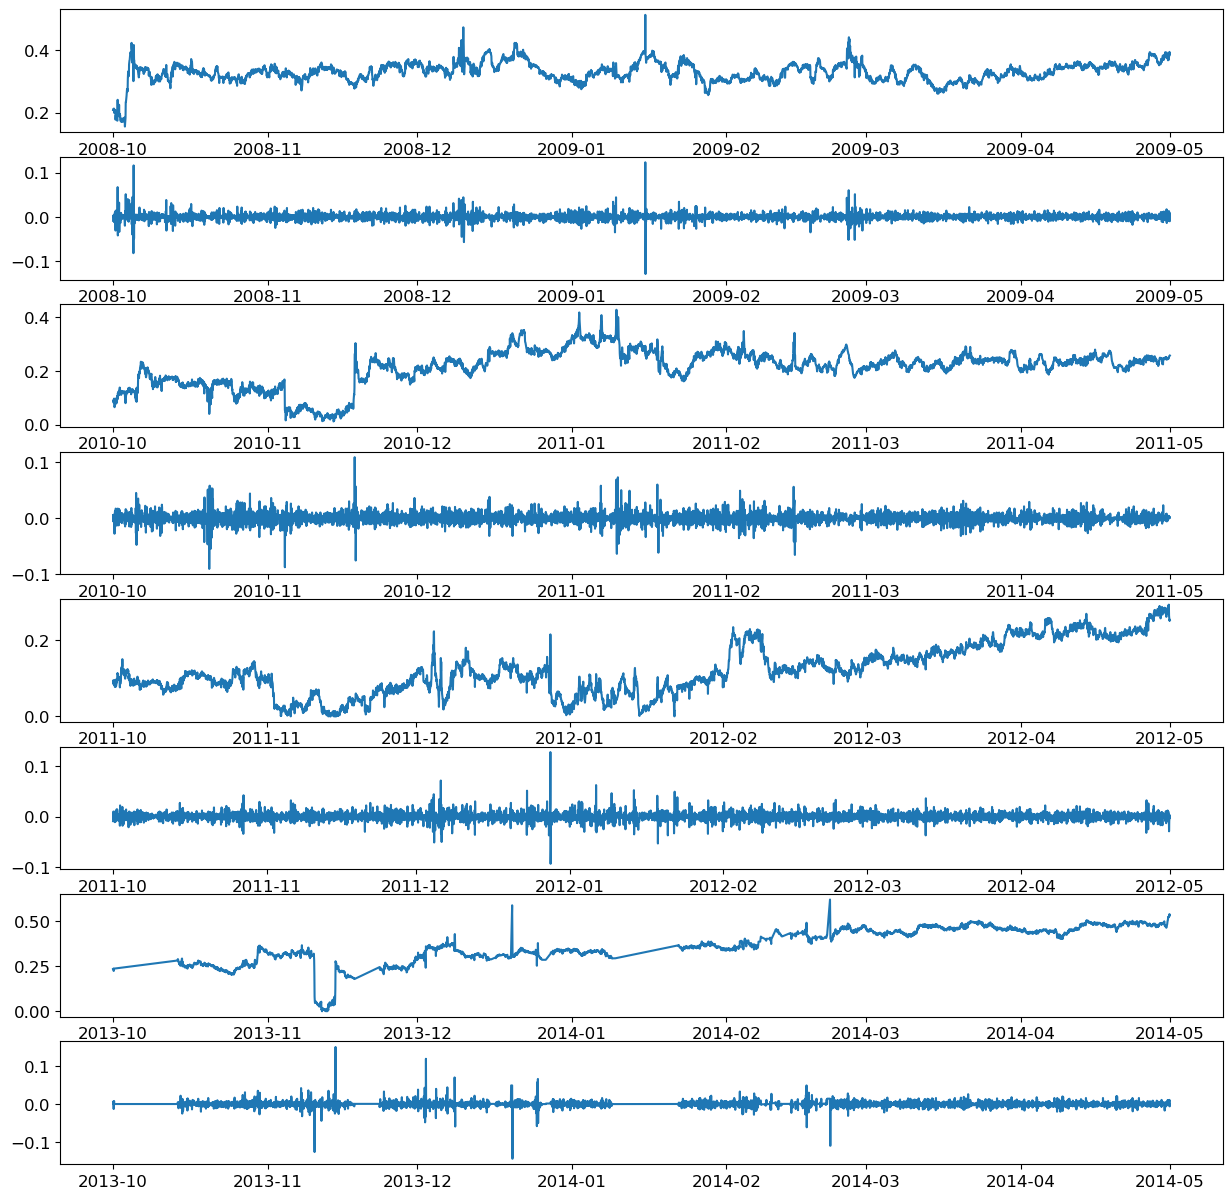

In [513]:
starts = ["2008-10-01", "2010-10-01", "2011-10-01", "2013-10-01"]
ends = ["2009-04-30", "2011-04-30", "2012-04-30", "2014-04-30"]
fig = plt.figure(figsize =(15,15))
for start, end, i in zip(starts, ends, np.arange(0,4)):
    ax = fig.add_subplot(8,1,1+2*i)
    ax.plot(jjmc_winter["snow_height"][start:end])
    ax = fig.add_subplot(8,1,2*(i+1))
    ax.plot(jjmc_winter["snowheight_diff_hourly"][start:end])
                         

In [566]:
a = jjmc_winter["snowheight_diff_hourly"]["2010-10-01":"2011-04-30"].sum()
a

0.17300000000000004

In [567]:
test = jjmc_winter["snow_height"]["2010-10-01":"2011-04-30"].values
test[-1] - test[1]

0.17399999999999993

In [551]:
jjmc_winter["snow_height"]["2011-04-30"][-1] - jjmc_winter["snow_height"]["2010-10-01"][0]

0.1679999999999997

In [504]:
starts = ["2008-10-01", "2010-10-01", "2011-10-01", "2013-10-01"]
ends = ["2009-04-30", "2011-04-30", "2012-04-30", "2014-04-30"]
for start, end in zip(starts, ends):
    print(jjmc_winter["snowheight_diff_hourly"][start:end].sum())
print([a+b for a,b in zip(high_wind_sums,low_wind_sums)])

0.17300000000000004
0.17300000000000004
0.15200000000000102
0.30500000000000016
[0.19000000000000017, 0.21300000000000052, 0.15200000000000102, -0.20188709345728073]


In [621]:
colors = ["r", "k", "b", "orange", "green"]
labels = ['2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014']
data1 = foehn_sums  # Daten für die erste Liste
data2 = high_wind_sums  # Daten für die zweite Liste
data3 = foehn_highwind_sums  # Daten für die dritte Liste
data4 = low_wind_sums
data5 = low_foehn_sums
# Positionen der Balken
x = np.arange(7)
# Breite der Balken
width = 0.15

# plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

foehnbar = ax.bar(x - 1.5*width, data1, width=width, color = "r", label='Foehn', zorder=2)
windbar = ax.bar(x-0.5*width, data2, width=width, color = "k", label=r"All winds >= 5 $\frac{m}{s}$", zorder=2)
foehn_wind = ax.bar(x+0.5*width, data3, width=width, color = "b", label=r"Foehn >= 5 $\frac{m}{s}$", zorder=2)
#lowwind_bar = ax.bar(x + width, data4, width=width, color = "green", label=r"All winds < 5 $\frac{m}{s}$", zorder=2)
lowfoehn_bar = ax.bar(x + 1.5*width, data5, width=width, color = "orange", label=r"Foehn < 5 $\frac{m}{s}$", zorder=2)

# Beschriftung der x-Achse und Legende
ax.set_ylim(-0.45, 0.2); ax.set_xticks(x, labels);
ax.set_ylabel("$\Delta$ Snow height [m], SR50", fontsize = 12)
#ax.set_title("Sum of $\Delta$ snow height [m]", fontsize=15)
ax.legend(loc = "lower left", fontsize = 10)
ax.grid(True, zorder=1, axis = "y")

plt.savefig(r"C:\Users\leopo\Master\Thesis\images\foehn\snow_influence\annual_snowheight_change.pdf")
plt.close()


In [652]:
#plot function
def plot_jjmc_cosipy(start, end, cosipy_data, jjmc_data, foehn_data, folder):

    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    #copy the single datasets
    data_plot = cosipy_data[start:end].copy()
    jjmc_plot = jjmc_data[start:end].copy()
    foehn_plot = foehn_data[start:end].copy()
    #print(data_plot["CG3 down cal"].head())
    
    #label and tick font
    plt.rcParams['axes.labelsize'] = 14  # fontsize of the x and y labels
    plt.rcParams['xtick.labelsize'] = 12  # fontsize of the x ticks
    plt.rcParams['ytick.labelsize'] = 12  # fontsize of the y ticks
    plt.rcParams['legend.fontsize'] = 12  # fontsize of the legend
    plt.rcParams['axes.titlesize'] = 16   # fontsize of the subplot titles

    
    fig = plt.figure(figsize = (25,15))
    fig.tight_layout(pad = 2.0)
    
    ax1 = fig.add_subplot(4,1,1)
    #energy terms
    #net longwave
    ax1.plot(data_plot.index, data_plot["LWin"] + data_plot["LWout"], color = "k", label = "LW cosipy", linewidth = 2)
    ax1.plot(data_plot.index, data_plot["LWin"] - jjmc_plot["CG3 down cal"], color = "k", linestyle = "dashed",label = "LW obs", linewidth = 2)
    #ax1.plot(data_plot.index, data_plot["LWout"], color = "k", linestyle = "dashed", label = "LW out", linewidth = 2)
    #shortwave
    ax1.plot(data_plot.index, data_plot["G"]-data_plot["G_out"], color = "orange", label = "SW", linewidth = 2)
    #ax1.plot(data_plot.index, -1*data_plot["G_out"], color = "orange", linestyle = "dashed", label = "SW out", linewidth = 2)
    #turbulent fluxes
    ax1.plot(data_plot.index, data_plot["H"], color = "red", label = "Q_H", linewidth = 2)
    ax1.plot(data_plot.index, data_plot["LE"], color = "green", label = "Q_E", linewidth = 2)
    ax1.plot(data_plot.index, data_plot["B"], color = "cyan", label = "B", linewidth = 2)
    ax1.plot(data_plot.index, data_plot["QRR"], color = "blue",  label = "QRR", linewidth = 2)
    #melt energy
    ax1.plot(data_plot.index, data_plot["ME"], color = "yellow", label = "E_melt", linewidth = 2)
    
    ax1.set_ylabel(r"$\frac{W}{m^2}$"); ax1.set_xticklabels([])
    ax1.legend(); ax1.grid()
    plt.title("Energy fluxes JJMC")

    ax2 = fig.add_subplot(4,1,2)
    #T2m and surface T 
    ax2.plot(data_plot.index, data_plot["T2"]-273.15, color = "k", label = "JJMC 2m", linewidth = 2)
    #ax2.plot(data_plot.index, data_plot["TS_obs"], color = "blue", label = "TS observed", linewidth = 2)
    ax2.plot(data_plot.index, data_plot["TS"]-273.15, color = "red", label = "TS cosipy", linewidth = 2)
    ax2.plot(data_plot.index, jjmc_plot["T_sfc"]-273.15, color = "red", label = "TS JJMC", linestyle = "dashed", linewidth = 2)
    ax2.legend(); ax2.set_ylabel("T [°C]"); ax2.set_xticklabels([])
    ax2.set_title("2m and surface temperature"); ax2.grid()
    
    ax3 = fig.add_subplot(4,1,3)
    #3m Windspeed and direction (foehn dataset
    colors = ["lime" if value >= 0.5 else "black" for value in foehn_plot["foehn_prob_combined"]]
    size = [35 if value >= 0.5 else 8 for value in foehn_plot["foehn_prob_combined"]]
    #markers = ["*" if value >= 0.5 else "." for value in foehn_plot["prob_jjmc_filter1"]]
    #markers = ["P" if value >= 0.5 else "." for value in foehn_plot["prob_jjmc_filter1"]]
    #JJMC
    ax3.plot(foehn_plot.index, foehn_plot["3m_Windspeed_jjmc"], color = "k", label = "ff JJMC")
    ax4 = ax3.twinx()
    ax4.scatter(foehn_plot.index, foehn_plot["3m_Winddir_jjmc"], color = colors, s = size, label = "dd JJMC")
    #ERA5
    ax3.plot(foehn_plot.index, foehn_plot["windspeed_crest800"], color = "r", label = "ff ERA5 crest - 800 hPa")
    ax4.scatter(foehn_plot.index, foehn_plot["winddir_crest800"], color = 'r', s = 8, label = "dd ERA5 crest - 800 hPa")
    #AHAB
    ax3.plot(foehn_plot.index, foehn_plot["windspeed_ahab"], color = "blue", label = "ff AHAB")
    #ax4.scatter(foehn_plot.index, foehn_plot["winddir_ahab"], color = 'blue', s = 10, label = "dd AHAB")
    ax4.scatter(foehn_plot.index, foehn_plot["winddir_mccall800"], color = 'blue', s = 8, label = "dd ERA5 mccall - 800 hPa")
    #ax5.axhline(110, linestyle = "dashed", color = "red", label = "foehn sector JJMC"); ax5.axhline(225, linestyle = "dashed", color = "red")

    # Set the transformation for the right y-axis (map 0-360 to 10-20)
    #ax4.set_ylim(0, 20); 
    right_y_limit = 360
    left_y_limit = 20
    trans = lambda x: ((x+10) * (left_y_limit / right_y_limit))
    ax3.set_ylim(0, 20); ax3.set_yticks([0, 5, 10, 15, 20]);
    ax4.set_ylim(trans(0), trans(right_y_limit))

    ax3.grid()
    ax3.legend(bbox_to_anchor =(0.3,-0.3), loc='lower center', ncol = 3); 
    ax3.set_title("wind speed and direction")
   # ax3.set_title("wind speed and direction at JJMC, AHAB, ERA5 crest 800hPa")
    ax3.set_ylabel("wind speed [m/s]"); ax4.set_ylabel("wind direction [°]")
    ax4.set_yticks([0, 90, 180, 270, 360]); ax4.grid(False)
    ax4.legend(bbox_to_anchor =(0.7,-0.3), loc='lower center', ncol = 3)
    ax3.tick_params(axis='both', which='major')
    ax4.tick_params(axis='both', which='major')
    ax3.set_xticklabels([]); ax4.set_xticklabels([]); ax4.grid()
    
    
    
    #SR50 snow height
    ax5 = fig.add_subplot(4,1,4)
    
    ax5.plot(jjmc_plot.index, jjmc_plot["snow_height"], color = "k", label = "SR50 JJMC")
    ax5.plot(data_plot.index, data_plot["SNOWHEIGHT"], color = "b",linestyle = "dashed", label = "cosipy, 120h runmean")
    #ax.axhline(0, color = "r", linestyle = "dashed")
    ax5.set_title("Snow height JJMC"); ax.legend(loc = "upper left")
    ax5.grid(), ax5.set_ylabel("snow height [m]"), ax5.set_ylim(0, 0.7)
    
    #foehnix models only with AWS data, filter 110 - 270
    #theta-diff as principal
    #ax5.plot(foehn_plot.index, foehn_plot["prob_jjmc_filter1"], color = "black", 
    #         linewidth = 2, label = "foehn prob. JJMC")
    #ax5.plot(foehn_plot.index, foehn_plot["prob_combined_filter1"], color = "black", 
    #         linestyle = "dashed", linewidth = 2, label = "combined foehn prob. AHAB/ERA5 800hPa")

    #ax5.set_ylim(0,1.05); ax5.legend(bbox_to_anchor =(0.5,-0.5), loc='lower center', ncol = 2)
    #ax5.set_title("Foehn probability"); ax5.tick_params(axis='both', which='major')
    #ax5.tick_params(axis='x', labelsize = 20), ax5.set_ylabel("Wind speed, Tdiff, RH")
    
    plt.subplots_adjust(hspace=0.4)
    #save plots
    plt.savefig(fr"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\cosipy_120hmean_noLW\\{folder}\EB_foehn_{(str(start))[0:10]}_{(str(end))[0:10]}.png", 
               bbox_inches="tight")
    plt.close()
    #plt.show()

In [48]:
#folder_list = ["cosipy", "cosipy_bulk", "cosipy_LWout", "cosipy_LWoutbulk"]
#for data, folder in zip(data_return, folder_list):
#    for start, end in zip(start_dates, end_dates):
#        plot_jjmc_cosipy(start, end, data, folder)

ValueError: x and y must have same first dimension, but have shapes (167,) and (241,)

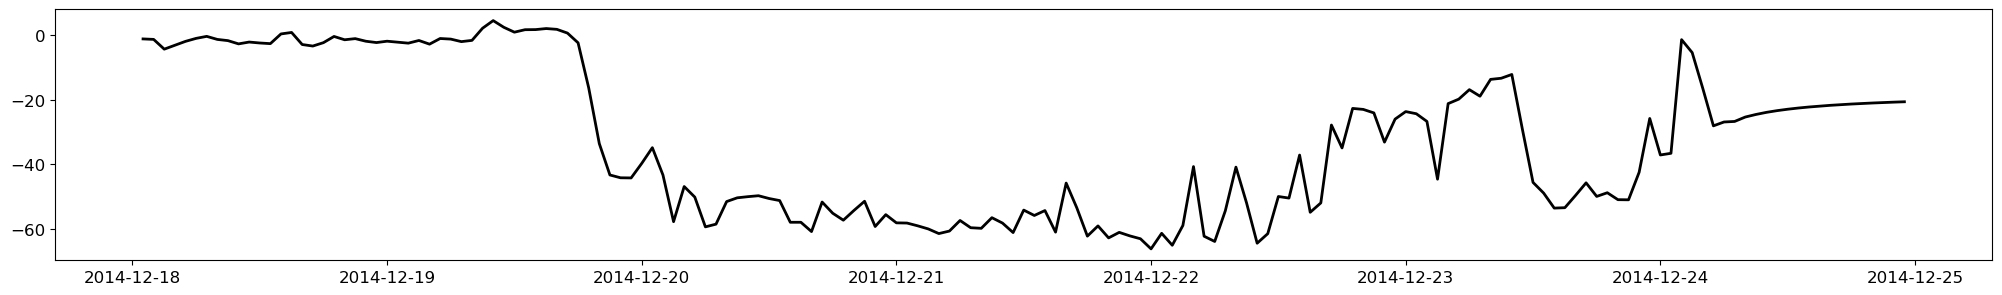

In [653]:
#year 2009
# Define the start date for the year 2009
start_date1 = pd.to_datetime("2013-03-18 01:00:00")
start_date2 = start_date1 + timedelta(days=10)

# Create a list of datetime objects with 10-day intervals
date_list1 = [start_date1 + timedelta(days=10 * i) for i in range(65)]   #33, 13, 105, 65
date_list2 = [start_date2 + timedelta(days=10 * i) for i in range(65)]

for start, end in zip(date_list1, date_list2):
    plot_jjmc_cosipy(start, end, cosipy_13_14_120h, jjmc, foehn_data, r"2013_2014")

In [678]:
#foehn events
start = ["2010-11-02 01:00", "2011-01-13 01:00", "2012-01-11 01:00"]
end = ["2010-11-05", "2011-01-19", "2012-01-16"]

start_08_09 = ["2008-09-29", "2008-12-07", "2009-01-11", "2009-04-25", "2009-05-25"]
end_08_09 = ["2008-10-01", "2008-12-11", "2009-01-19", "2009-04-29", "2009-06-02"]

start_09_09 = ["2009-10-08"]
end_09_09 = ["2009-10-10"]

start_13_14 = ["2013-03-21", "2013-05-14", "2013-08-02", "2013-09-23", "2013-11-07", "2014-06-21", "2014-11-19"]
end_13_14 = ["2013-03-26", "2013-05-19", "2013-08-06", "2013-09-27", "2013-11-17", "2014-06-25", "2014-11-23"]

for start, end in zip(start_08_09, end_08_09):
    plot_jjmc_cosipy(start, end, cosipy_08_09_120h, jjmc, foehn_data, r"foehn_events")

# Foehn climatology

- Foehn occurance per month, per year
- monthly means of Energy fluxes during Foehn and no foehn

In [657]:
foehn_data.columns

Index(['Year', 'Day', 'Time', '3m_T_ahab', '1m_T_ahab', 'pressure_ahab',
       '2m_T_jjmc', '2m_RH_jjmc', '3m_Windspeed_jjmc', '3m_Winddir_jjmc',
       '1m_Windspeed_jjmc', '1m_Winddir_jjmc', 'pressure_jjmc', '1m_T_jjmc',
       '1m_RH_jjmc', '3m_T_jjmc', '3m_RH_jjmc', '3m_gust_jjmc', '1m_gust_jjmc',
       'q_s_jjmc', 'windspeed_ahab', 'winddir_ahab', 'RH_ahab', 'Datetime',
       't_upstream800', 'windspeed_upstream800', 'winddir_upstream800',
       't_crest800', 'windspeed_crest800', 'winddir_crest800', 't_upstream775',
       'windspeed_upstream775', 'winddir_upstream775', 't_crest775',
       'windspeed_crest775', 'winddir_crest775', 't_upstream750',
       'windspeed_upstream750', 'winddir_upstream750', 't_crest750',
       'windspeed_crest750', 'winddir_crest750', 't_upstream700',
       'windspeed_upstream700', 'winddir_upstream700', 't_crest700',
       'windspeed_crest700', 'winddir_crest700', 't_mccall800',
       'windspeed_mccall800', 'winddir_mccall800', 't_mccall750',

In [684]:
#foehn percentage per year
foehn_data_nonan = foehn_data.dropna(subset=["foehn_prob_combined"])

foehn_only = foehn_data_nonan[foehn_data_nonan["foehn_prob_combined"] >= 0.5]
nofoehn_only = foehn_data_nonan[foehn_data_nonan["foehn_prob_combined"] < 0.5]

foehn_count_year = foehn_only.groupby(foehn_only.index.year).size()
foehn_count_month = foehn_only.groupby(foehn_only.index.month).size()

#pecentage year
foehn_per_year = foehn_count_year / foehn_data_nonan.groupby(foehn_data_nonan.index.year).size()
foehn_per_month = foehn_count_month / foehn_data_nonan.groupby(foehn_data_nonan.index.month).size()

In [735]:
#foehn occurance
#in percent
foehn_per_month = foehn_per_month * 100
fig, ax = plt.subplots(figsize = (15, 12))
foehn_per_month.plot(ax = ax, kind="bar", color = "k")
ax.set_ylabel("%", fontsize = 15), ax.set_xlabel("month", fontsize = 15)
ax.set_title("mean monthly foehn occurance", fontsize = 20)
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\overview\monthly_foehn_occurance_2008_2014.png")
plt.close()

#absolute number
fig, ax = plt.subplots(figsize = (15, 12))
foehn_count_month.plot(ax = ax, kind="bar", color = "k")
ax.set_ylabel("N", fontsize = 15), ax.set_xlabel("month", fontsize = 15)
ax.set_title("mean monthly foehn occurance", fontsize = 20)
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\overview\abs_monthly_foehn_2008_2014.png")
plt.close()

In [731]:
print("foehn: ", foehn_count_month, "all hours: ", foehn_data_nonan.groupby(foehn_data_nonan.index.month).size())

foehn:  utc_time
1     238
2     162
3      91
4     213
5     290
6     156
7     120
8     143
9     272
10    201
11    224
12    284
dtype: int64 all hours:  utc_time
1     1170
2     1426
3     2589
4     3604
5     4136
6     4120
7     4010
8     4457
9     4767
10    4865
11    4763
12    3704
dtype: int64


In [732]:
foehn_count_month.sum() / foehn_data_nonan.groupby(foehn_data_nonan.index.month).size().sum()

0.0548944073742863

In [696]:
#merge all cosipy datasets
cosipy_all = [cosipy_08_09_120h, cosipy_09_09_120h, cosipy_10_12_120h, cosipy_13_14_120h]
cosipy_merged = pd.concat(cosipy_all)

#add the foehn probability
cosipy_merged["foehn_prob_combined"] = np.nan
com_ind = foehn_data.index.intersection(cosipy_merged.index)
cosipy_merged["foehn_prob_combined"].loc[com_ind] = foehn_data["foehn_prob_combined"].loc[com_ind].values

In [704]:
cosipy_merged["G_out"] = -1 * cosipy_merged["G_out"]

In [705]:
cosipy_foehn = cosipy_merged.loc[cosipy_merged["foehn_prob_combined"] >= 0.5]
cosipy_nofoehn = cosipy_merged.loc[cosipy_merged["foehn_prob_combined"] < 0.5]

#monthly means of energy fluxes during foehn vs no foehn
energy_fluxes = ["G", "G_out", "LWin", "LWout", "H", "LE", "B", "QRR", "ME"]

monmean_foehn = cosipy_foehn[energy_fluxes].groupby(cosipy_foehn.index.month).mean()
monmean_nofoehn = cosipy_nofoehn[energy_fluxes].groupby(cosipy_nofoehn.index.month).mean()

42890

7194

0.1436386870058302

In [727]:
#bar plot of monthly means
#energy_balance[['Net Radiation','Sensible Heat Flux','Latent Heat Flux']].plot(ax=ax, kind='bar', stacked=True, title='contributions to melt energy, HEF, 08.07.2023')
#ax.set_ylim(-750, 1250)
fluxes = ["G", "G_out", "LWin", "LWout", "H", "LE", "B", "QRR"]

fig, ax = plt.subplots(figsize=(15, 12))

monmean_foehn[fluxes].plot(ax = ax, kind="bar", stacked=True, title="Monthly energy fluxes during foehn, 2008-2014")
ax.plot(np.arange(0, 12), monmean_foehn["ME"], label = "ME", color = "k", linewidth = 3)
#monmean_foehn["ME"].plot(ax = ax, kind = "line", color = "k", label = "ME")
ax.set_ylabel(r"E in $\frac{W}{m^2}$"); ax.set_xlabel("month")
ax.legend(loc = "upper right")
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\overview\EB_plot_foehn_2008_2014.png")
plt.close()

fig, ax = plt.subplots(figsize=(15, 12))

monmean_nofoehn[fluxes].plot(ax = ax, kind="bar", stacked=True, title="Monthly energy fluxes during no-foehn, 2008-2014")
ax.plot(np.arange(0, 12), monmean_nofoehn["ME"], label = "ME", color = "k", linewidth = 3)
#monmean_foehn["ME"].plot(ax = ax, kind = "line", color = "k", label = "ME")
ax.set_ylabel(r"E in $\frac{W}{m^2}$"); ax.set_xlabel("month")
ax.legend(loc = "upper right")
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\overview\EB_plot_nofoehn_2008_2014.png")
plt.close()

In [729]:
#plot differences
monmean_diff = monmean_foehn - monmean_nofoehn
fluxes = ["G", "G_out", "LWin", "LWout", "H", "LE", "B", "QRR"]

fig, ax = plt.subplots(figsize=(15, 12))

monmean_diff[fluxes].plot(ax = ax, kind="bar", stacked=True, title="Monthly differences of energy fluxes foehn - no foehn, 2008-2014", fontsize = 20)
ax.plot(np.arange(0, 12), monmean_diff["ME"], label = "ME", color = "k", linewidth = 3)
#monmean_foehn["ME"].plot(ax = ax, kind = "line", color = "k", label = "ME")
ax.set_ylabel(r"E in $\frac{W}{m^2}$", fontsize = 15); ax.set_xlabel("month", fontsize = 15)
ax.legend(loc = "upper right")
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\jjmc_EB_foehn\overview\EB_diff_2008_2014.png")
plt.close()

In [725]:
monmean_foehn - monmean_nofoehn

,G,G_out,LWin,LWout,H,LE,B,QRR,ME
1,-0.077547,0.061190,22.281493,-46.795044,43.826032,-9.563301,-9.909931,0.175524,0.000073
2,-3.188835,2.690180,21.255443,-34.823469,34.458623,-9.527484,-11.057615,0.143261,0.000065
3,-16.513554,13.822879,1.047672,-21.777136,28.618090,-1.294690,-4.184765,0.012398,0.000026
4,31.515723,-27.335838,22.369423,-31.875190,27.532245,-8.995116,-12.786963,0.009381,0.015778
5,2.323363,-3.598114,3.433445,-8.657293,25.447832,-13.342409,-5.867569,0.013878,-0.060854
6,-45.461429,32.433684,-11.124171,0.363114,45.037340,-20.288058,-5.170863,-0.117547,-3.340213
7,-1.538528,0.659966,-0.499025,-1.027766,48.518054,-4.974621,-5.696772,-0.164896,34.942711
8,-62.724295,13.095137,10.994570,-4.348864,61.593335,7.102145,-6.141120,-0.086063,27.426775
9,-14.082213,3.347575,12.035213,-10.460292,30.586765,-19.474713,-3.273783,0.131250,-0.974202
10,7.067027,-2.740810,14.603689,-26.093677,27.092330,-10.658531,-8.900393,0.010189,-0.046668


In [700]:
monmean_nofoehn

,G,G_out,LWin,LWout,H,LE,B,QRR,ME
1,0.590175,0.491934,186.483766,-201.868107,12.568725,-0.876233,3.603177,2.462881e-04,0.000090
2,14.316938,12.040519,190.850981,-214.683298,19.989539,0.215079,1.577984,9.302700e-04,0.000073
3,63.040813,53.200686,175.820175,-202.044222,15.778703,-0.267215,1.856438,4.075365e-15,0.000066
4,144.402288,121.758479,193.212139,-231.151090,17.233164,-0.855982,1.286652,-2.491509e-03,0.101922
5,216.497203,175.464919,237.176432,-276.484664,13.601938,-2.511402,0.328724,2.350924e-03,8.984108
6,219.190105,90.391397,280.130485,-308.083372,15.945591,-0.091006,-3.025775,2.546136e-01,91.186919
7,166.857228,33.723706,301.370972,-310.991134,17.788767,5.276567,-9.340605,5.694839e-01,111.690328
8,129.871629,26.895311,277.375535,-304.119967,15.549522,0.293580,-4.096703,2.456447e-01,70.460992
9,70.776905,19.576577,247.714341,-282.066008,10.251358,-5.653265,1.749566,2.801478e-02,15.990239
10,19.777950,13.169941,220.586751,-242.540982,13.773497,-0.237742,2.654923,-1.709229e-04,0.112640


In [762]:
#Snow scour
cosipy_merged[["SR50", "SR50_timeseries", "wind_jjmc"]] = np.nan

com_ind = jjmc.index.intersection(cosipy_merged.index)
cosipy_merged["SR50"].loc[com_ind] = jjmc["SR50 cor"].loc[com_ind].values
cosipy_merged["SR50_timeseries"].loc[com_ind] = jjmc["SR50_timeseries"].loc[com_ind].values
cosipy_merged["wind_jjmc"].loc[com_ind] = jjmc["3m Wind (m/s)"].loc[com_ind].values

<Axes: >

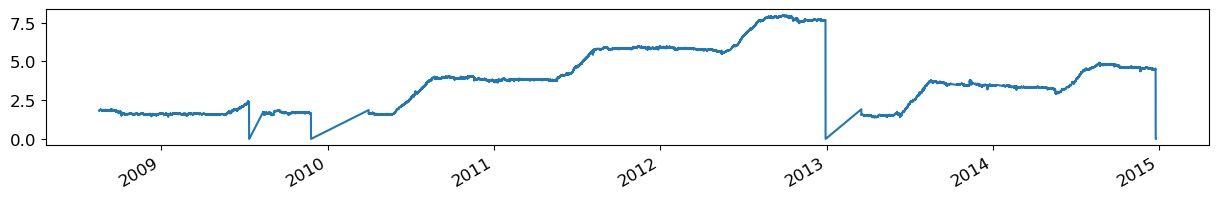

In [746]:
plt.figure(figsize=(15,2))
cosipy_merged["SR50_timeseries"].plot()

<Axes: >

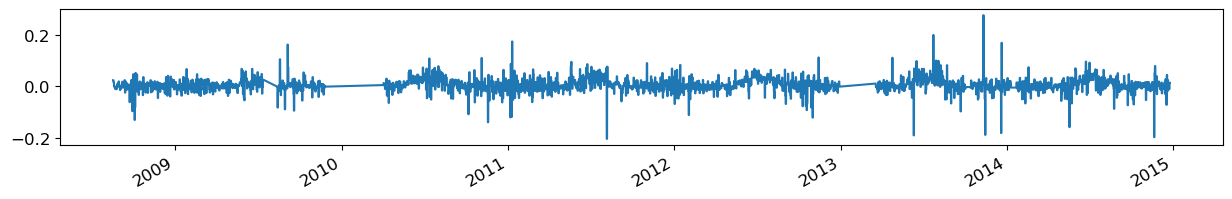

In [757]:
#cosipy_merged["SR50 diff"] = cosipy_merged["SR50_timeseries"].diff()
plt.figure(figsize=(15,2))
cosipy_merged["daily_SR50_diff"].plot()
#cosipy_merged["SR50 diff"].plot()

In [753]:
cosipy_merged["SR50 diff"].loc[np.abs(cosipy_merged["SR50 diff"]) > 0.15] = np.nan

In [756]:
#daily sums of the SR50 diff
cosipy_merged["daily_SR50_diff"] = cosipy_merged.groupby(pd.Grouper(freq='D'))['SR50 diff'].transform('sum')
#daily_sums_SWin = jjmc.groupby(pd.Grouper(freq='D'))['CM3 up Cal'].transform('sum')

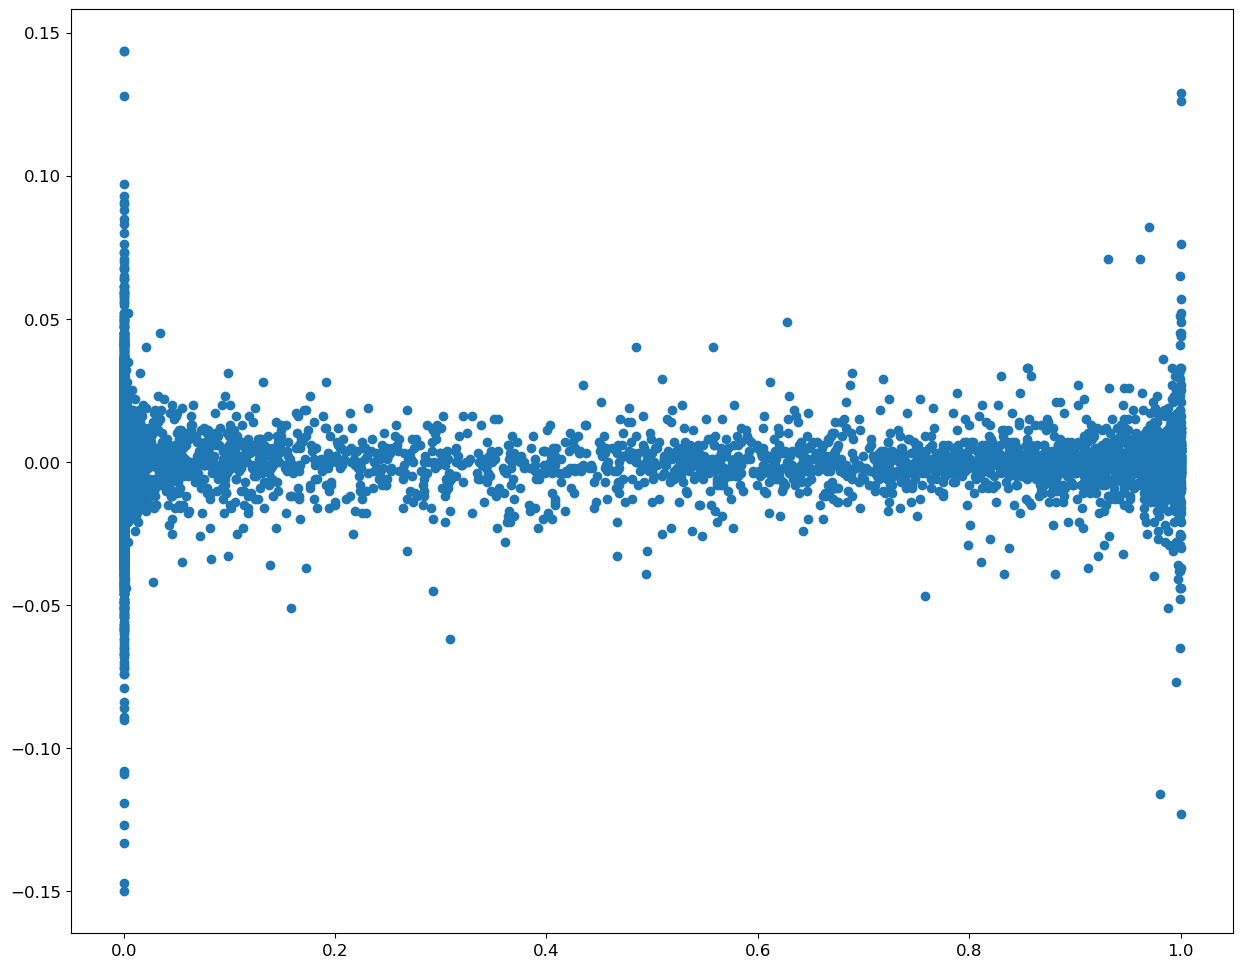

In [764]:
#relation foehn and Snow scour
fig, ax = plt.subplots(figsize=(15,12))

ax.scatter(cosipy_merged["foehn_prob_combined"], cosipy_merged["SR50 diff"])

In [679]:
import pandas as pd
import numpy as np

# Example DataFrame
data = {'A': [1, 2, np.nan, 4],
        'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)

# Drop rows where column "A" contains np.nan
df_cleaned = df.dropna(subset=['A'])

print(df_cleaned)


     A  B
0  1.0  5
1  2.0  6
3  4.0  8


In [663]:
import numpy as np
import pandas as pd

# Beispiel DataFrame
data = {'A': [1.0, np.nan, 3.0],
        'B': [4.0, 5.0, np.nan],
        'C': [np.nan, 7.0, 8.0],
        'D': [10.0, 11.0, 12.0]}
df = pd.DataFrame(data)

# Setze den Wert von 'D' auf np.nan, wenn 'A', 'B' oder 'C' in derselben Zeile np.nan haben
df.loc[df[['A', 'B', 'C']].isnull().any(axis=1), 'D'] = np.nan

print(df)


     A    B    C   D
0  1.0  4.0  NaN NaN
1  NaN  5.0  7.0 NaN
2  3.0  NaN  8.0 NaN


In [666]:
foehn_data.loc[foehn_data["foehn_prob_combined"].isnull()]

,Year,Day,Time,3m_T_ahab,1m_T_ahab,pressure_ahab,2m_T_jjmc,2m_RH_jjmc,3m_Windspeed_jjmc,3m_Winddir_jjmc,...,tdiff_mccall800_crest800,tdiff_mccall800_crest750,prob_era5_only,prob_era5_filter1,prob_era5_filter2,prob_jjmc_filter1,prob_jjmc_filter2,prob_jjmc_era5only,foehn_prob_combined,foehn_flag
utc_time,,,,,,,,,,,,,,,,,,,,,
2008-08-17 12:00:00,2008,230,400,-2.886,-2.902,755.0,-0.196,NaN,1.027,205.10,...,-0.071991,2.776703,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0
2008-08-17 13:00:00,2008,230,500,-3.716,-3.853,754.0,-0.073,NaN,1.719,185.70,...,-0.143311,2.751648,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0
2008-08-17 23:00:00,2008,230,1500,NaN,0.000,NaN,1.068,91.8,0.083,358.30,...,-1.861450,2.005280,0.001711,NaN,NaN,NaN,NaN,NaN,NaN,0
2008-08-18 02:00:00,2008,230,1800,1.368,-0.620,752.0,NaN,NaN,0.534,136.30,...,-1.334198,1.741943,0.002373,0.063799,0.065166,NaN,NaN,NaN,NaN,0
2008-08-22 14:00:00,2008,235,600,-5.282,-5.469,751.0,-1.532,NaN,0.682,197.39,...,-0.527863,1.938049,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,365,1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.086273,0.366150,0.039079,NaN,NaN,NaN,NaN,NaN,NaN,0
2014-12-31 20:00:00,2014,365,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.140350,0.425232,0.095663,NaN,NaN,NaN,NaN,NaN,NaN,0
2014-12-31 21:00:00,2014,365,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.216614,0.518951,0.196091,NaN,NaN,NaN,NaN,NaN,NaN,0


In [662]:
foehn_datafoehn_data[["2m_T_jjmc", "3m_Windspeed_jjmc", "2m_RH_jjmc"]].isnull())

55871

In [ ]:
foehn_count = foehn_data[foehn_data

In [557]:
foehn_data["foehn_flag"] = np.where(foehn_data["prob_jjmc_filter1"] >= 0.5, 1, 0)

#mean monthly foehn occurance
monthly_sumfoehn = foehn_data["foehn_flag"].groupby(foehn_data.index.month).sum()
ndays_month = []
for n in np.arange(1,13):
    monlen = len(foehn_data[foehn_data.index.month == n])
    ndays_month.append(monlen)

                                
monthly_percent = monthly_sumfoehn / ndays_month
monthly_percent

utc_time
1     0.045475
2     0.028353
3     0.019041
4     0.044444
5     0.062500
6     0.035880
7     0.026658
8     0.028613
9     0.049603
10    0.035714
11    0.040873
12    0.051843
Name: foehn_flag, dtype: float64

In [568]:
foehn_data["foehn_flag"] = np.where(foehn_data["foehn_prob_combined"] >= 0.5, 1, 0)

#mean monthly foehn occurance
monthly_sumfoehn = foehn_data["foehn_flag"].groupby(foehn_data.index.month).sum()
ndays_month = []
for n in np.arange(1,13):
    monlen = len(foehn_data[foehn_data.index.month == n])
    ndays_month.append(monlen)

                                
monthly_percent = monthly_sumfoehn / ndays_month
monthly_percent

utc_time
1     0.048835
2     0.034763
3     0.021057
4     0.054398
5     0.067876
6     0.040046
7     0.028674
8     0.032345
9     0.064087
10    0.044739
11    0.051190
12    0.057796
Name: foehn_flag, dtype: float64

In [552]:
foehn_data["foehn_flag"].groupby(foehn_data.index.month)[0]

KeyError: 'Column not found: 0'

### turbulent heat flux and surface T differences

do scatter plots of the surface temperature differences between the original cosipy setup and the forced setup with outgoing longwave radiation and the differences between the sensible and ground heat fluxes to explore if the sometimes large differences between the fluxes appear just under specific conditions/temperature profiles.

In [138]:
TS_diff = cosipy["TS"] - cosipy_LWout["TS"]
B_diff = cosipy_LWout["B"] - cosipy["B"]
H_diff = cosipy_LWout["H"] - cosipy["H"]

In [142]:
#scatter plot ground heat flux
plt.scatter(TS_diff, B_diff, s = 1, color = "black")
plt.title("Difference Ground Heat Flux vs. difference T_surface", fontsize = 12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("TS_cosipy - TS_observed [T °C]", fontsize = 10)
plt.ylabel(r"B_LWout_forced - B_original_cosipy [$\frac{W}{m^2}$]", fontsize = 10)
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\cosipy_evaluation\energy_fluxes\B_cosipy_LWforced.png",  bbox_inches="tight")
plt.close()

In [143]:
#scatter plot ground heat flux
plt.scatter(TS_diff, H_diff, s = 1, color = "black")
plt.title("Difference Sensible Heat Flux vs. difference T_surface", fontsize = 12)
plt.xlabel("TS_cosipy - TS_observed [T °C]", fontsize = 10)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel(r"H_LWout_forced - H_original_cosipy [$\frac{W}{m^2}$]", fontsize = 10)
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\cosipy_evaluation\energy_fluxes\H_cosipy_LWforced.png",  bbox_inches="tight")
plt.close()

In [144]:
#scatter plot 2m temperature, air temperature
plt.scatter(cosipy["T2"] - 273.15, TS_diff, s = 1, color = "black")
plt.xlabel("T2m JJMC [T °C]", fontsize = 10); plt.ylabel("TS_cosipy - TS_observed [T °C]", fontsize = 10)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.title("TS_diff vs. 2m T at JJMC")
plt.savefig(r"C:\Users\leopo\Master\Thesis\images\cosipy_evaluation\energy_fluxes\T2m_Tdiff.pdf",  bbox_inches="tight")
plt.close()

### evaluate cosipy albedo

In [174]:
jjmc["albedo"] = jjmc['CM3 Down Cal'] / jjmc['CM3 up Cal']
jjmc["albedo"].loc[(jjmc["albedo"] < 0.1) | (jjmc["albedo"] > 1)] = np.nan

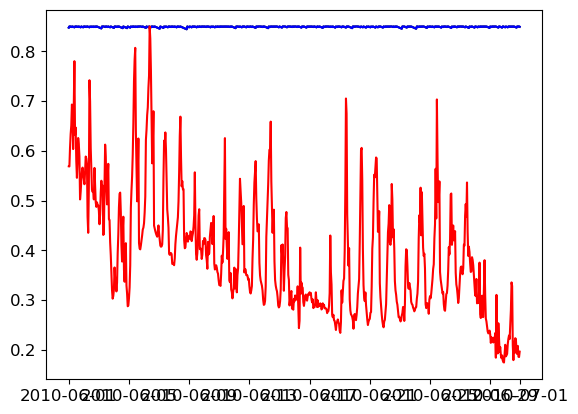

In [182]:
plt.plot(cosipy.loc["2010-06"].index, cosipy.loc["2010-06"]["ALBEDO"], color = "k", label = "cosipy orig")
plt.plot(cosipy.loc["2010-06"].index, cosipy_LWout.loc["2010-06"]["ALBEDO"], color = "b", label = "cosipy LWforced")
plt.plot(cosipy.loc["2010-06"].index, jjmc.loc["2010-06"]['albedo'], color = "r", label = "observed")

In [148]:
jjmc.columns

Index(['AT 2m', 'RH 2m', 'pressure (mb)', 'pressure cos', '3m Wind (m/s)',
       '3m Wind dir', '3m Wind Max (m/s)', 'total precip', 'snowfall',
       'SR50 cor', 'dist_to_snow_change', 'CM3 up Cal', 'CM3 Down Cal',
       'CG3 up cal', 'CG3 down cal', 'SW_net'],
      dtype='object')

In [127]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Beispiel Daten
y = B_diff.values
x = TS_diff.values - 273.15

# Grade der Polynome, die du ausprobieren möchtest
degrees = np.arange(1,20)

# Durchlaufe die verschiedenen Grade der Polynome
for degree in degrees:
    # Erzeuge die Polynommerkmale für den aktuellen Grad
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    
    # Trainiere ein lineares Regressionsmodell mit den Polynommerkmalen
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Mache Vorhersagen
    y_pred = model.predict(X_poly)
    
    # Bewertung der Leistung des Modells (zum Beispiel mit dem mittleren quadratischen Fehler)
    mse = mean_squared_error(y, y_pred)
    
    # Drucke die Ergebnisse
    print(f"Polynomgrad {degree}: Mittlerer quadratischer Fehler = {mse}")



Polynomgrad 1: Mittlerer quadratischer Fehler = 39.35785894136625
Polynomgrad 2: Mittlerer quadratischer Fehler = 32.505639280456066
Polynomgrad 3: Mittlerer quadratischer Fehler = 32.450724427274764
Polynomgrad 4: Mittlerer quadratischer Fehler = 30.79818568261118
Polynomgrad 5: Mittlerer quadratischer Fehler = 30.769356393570877
Polynomgrad 6: Mittlerer quadratischer Fehler = 30.745977072330376
Polynomgrad 7: Mittlerer quadratischer Fehler = 30.72870301095964
Polynomgrad 8: Mittlerer quadratischer Fehler = 30.718114666520183
Polynomgrad 9: Mittlerer quadratischer Fehler = 30.71468820401229
Polynomgrad 10: Mittlerer quadratischer Fehler = 30.71876072349461
Polynomgrad 11: Mittlerer quadratischer Fehler = 30.730490710701805
Polynomgrad 12: Mittlerer quadratischer Fehler = 30.749815572144282
Polynomgrad 13: Mittlerer quadratischer Fehler = 30.776409572362226
Polynomgrad 14: Mittlerer quadratischer Fehler = 30.809647132013442
Polynomgrad 15: Mittlerer quadratischer Fehler = 30.8485779473